In [1]:
 #load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
#setprecision(128)
setprecision(2048)

2048

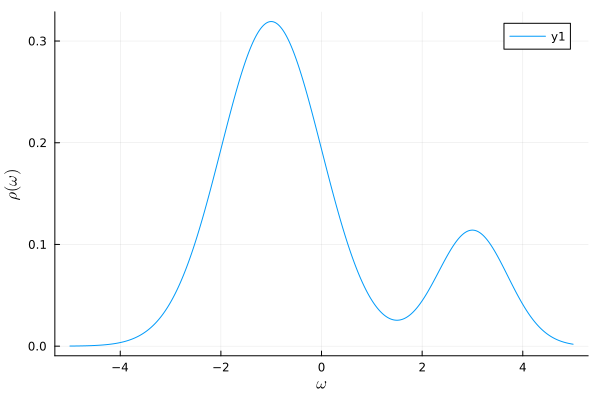

In [3]:
 #define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.0) + 0.2*gaussian(omega, 3, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 1000. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.0001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
moments = Complex{T}.([1., -0.2, 3.498, 3.082, 29.6361, 56.4209, 345.471, 895.443, 4830.75, 14800.3, 76894., 262127., 1.35768*10^6, 4.99111*10^6])
moments1   = Complex{T}.([1])
moments3   = Complex{T}.([1., -0.2, 3.498])
moments5   = Complex{T}.([1., -0.2, 3.498, 3.082, 29.6361])
moments7   = Complex{T}.([1., -0.2, 3.498, 3.082, 29.6361, 56.4209, 345.471])
moments9   = Complex{T}.([1., -0.2, 3.498, 3.082, 29.6361, 56.4209, 345.471, 895.443, 4830.75])
moments11 = Complex{T}.([1., -0.2, 3.498, 3.082, 29.6361, 56.4209, 345.471, 895.443, 4830.75, 14800.3, 76894.])
moments13 = Complex{T}.([1., -0.2, 3.498, 3.082, 29.6361, 56.4209, 345.471, 895.443, 4830.75, 14800.3, 76894., 262127., 1.35768*10^6])

13-element Vector{Complex{BigFloat}}:
                                                       1.0 + 0.0im
 -0.200000000000000011102230246251565404236316680908203125 + 0.0im
      3.49800000000000022026824808563105762004852294921875 + 0.0im
      3.08199999999999985078602549037896096706390380859375 + 0.0im
           29.63609999999999899955582804977893829345703125 + 0.0im
         56.4209000000000031604940886609256267547607421875 + 0.0im
             345.47100000000000363797880709171295166015625 + 0.0im
            895.442999999999983629095368087291717529296875 + 0.0im
                                                   4830.75 + 0.0im
              14800.29999999999927240423858165740966796875 + 0.0im
                                                   76894.0 + 0.0im
                                                  262127.0 + 0.0im
                                               1.35768e+06 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments1, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
wo_ham_nev_sol1 = Nevanlinna.HamburgerNevanlinnaSolver(moments1, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
wo_ham_nev_sol3 = Nevanlinna.HamburgerNevanlinnaSolver(moments3, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
wo_ham_nev_sol5 = Nevanlinna.HamburgerNevanlinnaSolver(moments5, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
wo_ham_nev_sol7 = Nevanlinna.HamburgerNevanlinnaSolver(moments7, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
wo_ham_nev_sol9 = Nevanlinna.HamburgerNevanlinnaSolver(moments9, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
wo_ham_nev_sol11 = Nevanlinna.HamburgerNevanlinnaSolver(moments11, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
wo_ham_nev_sol13 = Nevanlinna.HamburgerNevanlinnaSolver(moments13, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:1
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 48
Rank of Hankel matrix:1
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 48
Rank of Hankel matrix:2
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 47
Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 47
Rank of Hankel matrix:4
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 39
Rank of Hankel matrix:5
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 39
Rank of Hankel matrix:6
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 36
Rank of Hankel matrix:7
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 36


In [9]:
ham_nev_sol = HamburgerNevanlinnaSolver(moments7, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

Rank of Hankel matrix:4
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 39
H=1
Iter     Function value   Gradient norm 
     0     1.401442e+00     1.372821e+01
 * time: 0.014947175979614258
     1     9.475108e-01     4.005803e+00
 * time: 3.4958181381225586
     2     4.346078e-01     2.288418e+00
 * time: 5.120662212371826
     3     1.863305e-01     9.152695e-01
 * time: 6.292358160018921
     4     1.825324e-01     3.268558e-01
 * time: 7.554269075393677
     5     1.822385e-01     7.162325e-02
 * time: 8.393002986907959
     6     1.821823e-01     1.674364e-02
 * time: 9.238142013549805
     7     1.821792e-01     1.000970e-02
 * time: 10.48504114151001
     8     1.821789e-01     2.780516e-03
 * time: 11.405411005020142
     9     1.821788e-01     1.143892e-03
 * time: 12.224809169769287
    10     1.821788e-01     4.626440e-04
 * time: 13.064793109893799
    11     1.821788e-01     1.166301e-04
 * time: 13.84669804573059
    12    

In [10]:
solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     1.821788e-01     9.445725e-09
 * time: 0.0001690387725830078
max_theta=0.13825671515266754729427409697810385917014510846643604414312197481918197509114810496192229010266490294400033885521046950029313186084276437420943073547485316724789219339813514080620230422142405207983039536454668779199462704107647066491394779535986226029292436848842879149315307853874652596211236089552116335936505861510179053744502484337204083105423265973057779519079456020868949255901636477779018665959853320656318293930197640635484500112161541112837009411637770752640726372445164411522331374772371996675996868402357488464713411212329613685385906700604884698157756504638740631843752190846876857128747071086106015327574
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.821788e-01     1.498369e+00
 * time: 0.0002079010009765625
     1     1.783910e-01     1.264501e+00
 * time: 1.1053059101104736
     2     1.675549e-01     1.62690

    26     9.225141e-03     1.446153e-04
 * time: 24.346351146697998
    27     9.225140e-03     8.759841e-05
 * time: 25.5397469997406
    28     9.225140e-03     5.184165e-05
 * time: 26.33934712409973
    29     9.225140e-03     3.021321e-05
 * time: 27.12964701652527
    30     9.225140e-03     1.428292e-05
 * time: 27.911631107330322
    31     9.225140e-03     7.987963e-06
 * time: 28.714945077896118
    32     9.225140e-03     3.957316e-06
 * time: 29.532022953033447
    33     9.225140e-03     2.173592e-06
 * time: 30.368834018707275
    34     9.225140e-03     1.083890e-06
 * time: 31.171565055847168
    35     9.225140e-03     6.393478e-07
 * time: 31.98562216758728
    36     9.225140e-03     3.357895e-07
 * time: 32.77944016456604
    37     9.225140e-03     1.846855e-07
 * time: 33.563889026641846
    38     9.225140e-03     9.336575e-08
 * time: 34.38406014442444
    39     9.225140e-03     5.446450e-08
 * time: 35.19677996635437
    40     9.225140e-03     2.601447e-08
 

    33     2.513105e-03     4.494865e-02
 * time: 38.468417167663574
    34     2.498441e-03     3.956168e-02
 * time: 39.923885107040405
    35     2.474861e-03     2.529927e-02
 * time: 41.420238971710205
    36     2.465494e-03     9.359780e-03
 * time: 42.918296098709106
    37     2.464848e-03     5.040009e-03
 * time: 43.91626000404358
    38     2.464501e-03     1.589510e-03
 * time: 44.845848083496094
    39     2.464446e-03     5.545500e-04
 * time: 45.843974113464355
    40     2.464441e-03     3.915769e-04
 * time: 47.310713052749634
    41     2.464440e-03     1.555389e-04
 * time: 48.74842810630798
    42     2.464440e-03     1.293842e-04
 * time: 49.77912211418152
    43     2.464440e-03     5.037190e-05
 * time: 50.724863052368164
    44     2.464440e-03     3.159980e-05
 * time: 51.775145053863525
    45     2.464440e-03     2.135382e-05
 * time: 52.700932025909424
    46     2.464440e-03     1.397422e-05
 * time: 53.71511507034302
    47     2.464440e-03     7.684701e-

     3     1.148970e-03     1.564516e-02
 * time: 2.6654210090637207
     4     1.146458e-03     1.774497e-02
 * time: 3.5466549396514893
     5     1.140909e-03     1.472617e-02
 * time: 4.475212812423706
     6     1.133820e-03     2.129478e-02
 * time: 5.36430287361145
     7     1.122793e-03     2.057994e-02
 * time: 6.241228818893433
     8     1.101017e-03     4.220407e-02
 * time: 7.137814998626709
     9     1.076113e-03     2.477665e-02
 * time: 8.033198833465576
    10     1.063850e-03     2.851899e-02
 * time: 8.923524856567383
    11     1.050145e-03     2.755382e-02
 * time: 9.83933687210083
    12     1.038189e-03     4.125362e-02
 * time: 10.732333898544312
    13     1.002502e-03     3.053620e-02
 * time: 11.619171857833862
    14     9.771533e-04     1.293146e-02
 * time: 12.513795852661133
    15     9.408873e-04     3.355856e-02
 * time: 13.916682958602905
    16     9.144533e-04     1.950269e-02
 * time: 15.240814924240112
    17     9.081701e-04     1.076310e-02
 *

    27     4.345707e-04     2.551077e-02
 * time: 31.633509874343872
    28     4.312153e-04     1.893755e-02
 * time: 32.600690841674805
    29     4.256079e-04     2.644803e-02
 * time: 34.024311780929565
    30     4.201055e-04     2.241769e-02
 * time: 35.48154377937317
    31     4.103896e-04     2.081146e-02
 * time: 36.9418888092041
    32     4.026743e-04     1.499604e-02
 * time: 38.35856485366821
    33     4.010756e-04     6.735649e-03
 * time: 39.29343390464783
    34     3.989599e-04     8.708185e-03
 * time: 40.763757944107056
    35     3.974814e-04     1.280368e-02
 * time: 42.22265386581421
    36     3.939579e-04     1.643137e-02
 * time: 43.68885779380798
    37     3.906029e-04     1.811375e-02
 * time: 45.10144376754761
    38     3.862582e-04     2.212718e-02
 * time: 46.53576183319092
    39     3.824288e-04     2.043333e-02
 * time: 47.97408580780029
    40     3.771756e-04     1.963204e-02
 * time: 49.45821499824524
    41     3.698282e-04     1.149891e-02
 * t

    26     2.458037e-04     1.295519e-02
 * time: 30.99072790145874
    27     2.441953e-04     1.526945e-02
 * time: 32.57583689689636
    28     2.427350e-04     1.430122e-02
 * time: 34.15631985664368
    29     2.405116e-04     1.596372e-02
 * time: 35.812795877456665
    30     2.377491e-04     1.584689e-02
 * time: 37.42722797393799
    31     2.345354e-04     1.559045e-02
 * time: 38.96741604804993
    32     2.324339e-04     9.681470e-03
 * time: 40.02692890167236
    33     2.306019e-04     1.036472e-02
 * time: 41.096282958984375
    34     2.294285e-04     7.112693e-03
 * time: 42.18159604072571
    35     2.283759e-04     7.550133e-03
 * time: 43.304945945739746
    36     2.276413e-04     7.624357e-03
 * time: 44.43632698059082
    37     2.269514e-04     7.664963e-03
 * time: 46.10239386558533
    38     2.264123e-04     8.337245e-03
 * time: 47.20609402656555
    39     2.257626e-04     8.931518e-03
 * time: 48.8562798500061
    40     2.252035e-04     9.715418e-03
 * ti

   146     1.633752e-04     1.121366e-02
 * time: 186.1820478439331
   147     1.623239e-04     1.058815e-02
 * time: 187.30519890785217
   148     1.616859e-04     7.078688e-03
 * time: 188.45084404945374
   149     1.612364e-04     6.590859e-03
 * time: 189.57207083702087
   150     1.609231e-04     5.594469e-03
 * time: 190.68586492538452
   151     1.606730e-04     4.516027e-03
 * time: 191.9089229106903
   152     1.604915e-04     4.331501e-03
 * time: 193.1087930202484
   153     1.603656e-04     3.326840e-03
 * time: 194.23225593566895
   154     1.602924e-04     2.867846e-03
 * time: 195.387845993042
   155     1.602482e-04     2.175032e-03
 * time: 196.55876684188843
   156     1.602222e-04     1.812479e-03
 * time: 197.6449658870697
   157     1.602026e-04     1.387660e-03
 * time: 198.80569100379944
   158     1.601895e-04     1.032392e-03
 * time: 199.9798548221588
   159     1.601809e-04     7.476723e-04
 * time: 201.162526845932
   160     1.601763e-04     4.915646e-04
 *

    63     1.236910e-04     9.151146e-03
 * time: 84.93847179412842
    64     1.233996e-04     9.404423e-03
 * time: 86.03213286399841
    65     1.231493e-04     8.834351e-03
 * time: 87.08838295936584
    66     1.228632e-04     9.019133e-03
 * time: 88.1202609539032
    67     1.226166e-04     8.089798e-03
 * time: 89.17837500572205
    68     1.223354e-04     8.560065e-03
 * time: 90.2269139289856
    69     1.220908e-04     7.392772e-03
 * time: 91.26634502410889
    70     1.218081e-04     8.137504e-03
 * time: 92.33955192565918
    71     1.215596e-04     7.778184e-03
 * time: 93.39162302017212
    72     1.212650e-04     8.446571e-03
 * time: 94.49780988693237
    73     1.210030e-04     8.763981e-03
 * time: 95.75230693817139
    74     1.206803e-04     9.295605e-03
 * time: 97.43055295944214
    75     1.203887e-04     9.879223e-03
 * time: 98.51589584350586
    76     1.200146e-04     1.054812e-02
 * time: 100.17437291145325
    77     1.196716e-04     1.120139e-02
 * time:

   183     1.006775e-04     1.686714e-03
 * time: 222.6432979106903
   184     1.006729e-04     1.866089e-03
 * time: 223.74659180641174
   185     1.006681e-04     1.950819e-03
 * time: 224.8053319454193
   186     1.006624e-04     2.145538e-03
 * time: 225.932452917099
   187     1.006566e-04     2.242866e-03
 * time: 227.0567548274994
   188     1.006498e-04     2.453310e-03
 * time: 228.16211986541748
   189     1.006429e-04     2.565936e-03
 * time: 229.22491693496704
   190     1.006348e-04     2.791982e-03
 * time: 230.25553488731384
   191     1.006265e-04     2.921040e-03
 * time: 231.33640480041504
   192     1.006169e-04     3.162352e-03
 * time: 232.5516529083252
   193     1.006072e-04     3.308033e-03
 * time: 234.2332558631897
   194     1.005959e-04     3.564878e-03
 * time: 235.47455382347107
   195     1.005844e-04     3.727206e-03
 * time: 236.5283808708191
   196     1.005710e-04     4.000512e-03
 * time: 237.54506087303162
   197     1.005573e-04     4.179107e-03
 

    11     8.599455e-05     3.278988e-03
 * time: 12.682555198669434
    12     8.583749e-05     4.301031e-03
 * time: 13.784371137619019
    13     8.564459e-05     2.897868e-03
 * time: 14.895963191986084
    14     8.502696e-05     4.160565e-03
 * time: 16.017611026763916
    15     8.472902e-05     3.209221e-03
 * time: 17.072142124176025
    16     8.432354e-05     3.726948e-03
 * time: 18.118475198745728
    17     8.370812e-05     2.532382e-03
 * time: 19.18682599067688
    18     8.311759e-05     2.700920e-03
 * time: 21.426218032836914
    19     8.261581e-05     3.475854e-03
 * time: 22.558982133865356
    20     8.217366e-05     2.843157e-03
 * time: 23.718062162399292
    21     8.173237e-05     4.350309e-03
 * time: 25.407045125961304
    22     8.089388e-05     4.560891e-03
 * time: 27.072041988372803
    23     8.045566e-05     1.979485e-03
 * time: 28.665914058685303
    24     8.017044e-05     2.748240e-03
 * time: 30.248148202896118
    25     7.922929e-05     5.35033

   131     6.747570e-05     4.256134e-03
 * time: 175.22232007980347
   132     6.742288e-05     3.936944e-03
 * time: 176.4348361492157
   133     6.736823e-05     4.509148e-03
 * time: 177.73428106307983
   134     6.731311e-05     4.259522e-03
 * time: 178.89284014701843
   135     6.725796e-05     4.753996e-03
 * time: 180.0107560157776
   136     6.720363e-05     4.689575e-03
 * time: 181.25338315963745
   137     6.714910e-05     5.058305e-03
 * time: 182.41392517089844
   138     6.709381e-05     5.124019e-03
 * time: 183.5955891609192
   139     6.703569e-05     5.474999e-03
 * time: 184.91464614868164
   140     6.697455e-05     5.590663e-03
 * time: 186.120667219162
   141     6.690943e-05     5.965572e-03
 * time: 187.31910109519958
   142     6.684212e-05     6.066716e-03
 * time: 188.57840609550476
   143     6.677306e-05     6.446581e-03
 * time: 189.71455121040344
   144     6.670478e-05     6.515320e-03
 * time: 190.87256717681885
   145     6.663691e-05     6.926501e-0

   251     6.038629e-05     1.196702e-03
 * time: 325.62958908081055
   252     6.038511e-05     1.232779e-03
 * time: 326.830628156662
   253     6.038386e-05     1.279598e-03
 * time: 328.10011315345764
   254     6.038257e-05     1.319595e-03
 * time: 329.37317514419556
   255     6.038122e-05     1.366605e-03
 * time: 330.5065450668335
   256     6.037984e-05     1.409527e-03
 * time: 331.6951081752777
   257     6.037838e-05     1.459181e-03
 * time: 332.9327940940857
   258     6.037688e-05     1.503135e-03
 * time: 334.1130061149597
   259     6.037530e-05     1.556123e-03
 * time: 335.35170912742615
   260     6.037368e-05     1.600996e-03
 * time: 336.6926472187042
   261     6.037197e-05     1.657122e-03
 * time: 337.90583205223083
   262     6.037020e-05     1.703625e-03
 * time: 339.1232821941376
   263     6.036835e-05     1.762595e-03
 * time: 340.3892722129822
   264     6.036643e-05     1.811498e-03
 * time: 341.5546360015869
   265     6.036441e-05     1.873177e-03
 * 

   371     5.493138e-05     6.628257e-05
 * time: 481.0189230442047
   372     5.493135e-05     6.529141e-05
 * time: 482.4140660762787
   373     5.493132e-05     5.672141e-05
 * time: 483.64571619033813
   374     5.493129e-05     5.691909e-05
 * time: 484.8804202079773
   375     5.493127e-05     4.637798e-05
 * time: 486.24726009368896
   376     5.493125e-05     4.714783e-05
 * time: 487.48579812049866
   377     5.493124e-05     3.867610e-05
 * time: 488.7264142036438
   378     5.493122e-05     3.687526e-05
 * time: 490.17192912101746
   379     5.493121e-05     3.058693e-05
 * time: 491.42522716522217
   380     5.493121e-05     2.694073e-05
 * time: 492.65021109580994
   381     5.493120e-05     2.274247e-05
 * time: 493.91989612579346
   382     5.493120e-05     1.881895e-05
 * time: 495.25556921958923
   383     5.493120e-05     1.598844e-05
 * time: 496.4575471878052
   384     5.493119e-05     1.255060e-05
 * time: 497.72751903533936
   385     5.493119e-05     1.058572e-0

    63     4.873017e-05     1.801349e-03
 * time: 87.97840714454651
    64     4.869822e-05     1.263253e-03
 * time: 89.15680313110352
    65     4.867455e-05     1.872222e-03
 * time: 90.43834614753723
    66     4.864731e-05     1.423926e-03
 * time: 91.6125910282135
    67     4.861803e-05     2.432523e-03
 * time: 92.88422417640686
    68     4.858443e-05     1.770457e-03
 * time: 94.06609916687012
    69     4.855124e-05     2.326568e-03
 * time: 95.25463008880615
    70     4.851824e-05     1.842243e-03
 * time: 96.51848816871643
    71     4.849029e-05     1.934765e-03
 * time: 97.68599319458008
    72     4.846512e-05     1.847231e-03
 * time: 98.95986104011536
    73     4.844460e-05     1.772890e-03
 * time: 100.17039704322815
    74     4.842551e-05     1.710979e-03
 * time: 101.37222504615784
    75     4.840884e-05     1.631252e-03
 * time: 102.64484405517578
    76     4.839267e-05     1.408623e-03
 * time: 103.89234519004822
    77     4.837837e-05     1.383763e-03
 * t

   183     4.574814e-05     2.315152e-03
 * time: 229.07112407684326
   184     4.572664e-05     3.186924e-03
 * time: 230.173495054245
   185     4.570519e-05     2.716644e-03
 * time: 231.61683201789856
   186     4.568113e-05     3.464388e-03
 * time: 232.79333019256592
   187     4.565719e-05     2.977192e-03
 * time: 233.88373112678528
   188     4.563034e-05     3.615848e-03
 * time: 235.06834411621094
   189     4.560376e-05     3.061610e-03
 * time: 236.1897041797638
   190     4.557437e-05     3.596376e-03
 * time: 237.2858099937439
   191     4.554550e-05     2.979516e-03
 * time: 238.41954803466797
   192     4.551452e-05     3.398740e-03
 * time: 239.59592413902283
   193     4.548461e-05     2.752594e-03
 * time: 240.71095609664917
   194     4.545385e-05     3.044416e-03
 * time: 241.83383703231812
   195     4.542509e-05     2.405992e-03
 * time: 243.4428210258484
   196     4.539698e-05     2.575251e-03
 * time: 244.45779013633728
   197     4.537185e-05     1.973536e-0

   303     4.021996e-05     9.636873e-04
 * time: 359.992299079895
   304     4.021613e-05     7.359381e-04
 * time: 360.98246216773987
   305     4.021192e-05     8.977906e-04
 * time: 361.9852249622345
   306     4.020748e-05     6.162989e-04
 * time: 362.99878096580505
   307     4.020251e-05     8.430785e-04
 * time: 364.020161151886
   308     4.019728e-05     5.022890e-04
 * time: 365.02471113204956
   309     4.019182e-05     7.458127e-04
 * time: 366.58948516845703
   310     4.018643e-05     5.058427e-04
 * time: 367.5811450481415
   311     4.018125e-05     6.372458e-04
 * time: 368.58422112464905
   312     4.017649e-05     5.242180e-04
 * time: 369.6339771747589
   313     4.017222e-05     5.626678e-04
 * time: 370.6786050796509
   314     4.016854e-05     5.095884e-04
 * time: 371.6640660762787
   315     4.016541e-05     5.063048e-04
 * time: 372.6458671092987
   316     4.016284e-05     4.606166e-04
 * time: 373.63114309310913
   317     4.016074e-05     4.520442e-04
 * 

   423     4.014534e-05     5.656286e-04
 * time: 486.32257318496704
   424     4.014519e-05     5.734729e-04
 * time: 487.3339660167694
   425     4.014504e-05     5.880893e-04
 * time: 488.321506023407
   426     4.014490e-05     5.955466e-04
 * time: 489.3059661388397
   427     4.014474e-05     6.105825e-04
 * time: 490.29729318618774
   428     4.014459e-05     6.176104e-04
 * time: 491.28811502456665
   429     4.014443e-05     6.330230e-04
 * time: 492.3253309726715
   430     4.014427e-05     6.396124e-04
 * time: 493.3529419898987
   431     4.014410e-05     6.553167e-04
 * time: 494.8870840072632
   432     4.014393e-05     6.614909e-04
 * time: 495.859904050827
   433     4.014376e-05     6.773573e-04
 * time: 496.85622000694275
   434     4.014359e-05     6.831695e-04
 * time: 497.85026502609253
   435     4.014341e-05     6.990309e-04
 * time: 498.8194410800934
   436     4.014322e-05     7.045604e-04
 * time: 499.81990003585815
   437     4.014304e-05     7.202269e-04
 * 

   544     4.010154e-05     2.073441e-03
 * time: 612.0696799755096
   545     4.010083e-05     2.089113e-03
 * time: 613.0416831970215
   546     4.010011e-05     2.106745e-03
 * time: 614.0380120277405
   547     4.009938e-05     2.122636e-03
 * time: 615.0540430545807
   548     4.009865e-05     2.140919e-03
 * time: 616.0487430095673
   549     4.009790e-05     2.157102e-03
 * time: 617.0411441326141
   550     4.009714e-05     2.175980e-03
 * time: 618.0247690677643
   551     4.009637e-05     2.192525e-03
 * time: 619.0379881858826
   552     4.009560e-05     2.211934e-03
 * time: 620.0535111427307
   553     4.009481e-05     2.228900e-03
 * time: 621.0264279842377
   554     4.009402e-05     2.248773e-03
 * time: 622.0572609901428
   555     4.009321e-05     2.266208e-03
 * time: 623.0516970157623
   556     4.009240e-05     2.286478e-03
 * time: 624.1024689674377
   557     4.009157e-05     2.304413e-03
 * time: 625.0994231700897
   558     4.009073e-05     2.325020e-03
 * time

   665     3.985278e-05     4.858274e-03
 * time: 734.4906251430511
   666     3.984416e-05     4.885395e-03
 * time: 735.5246801376343
   667     3.983408e-05     4.880721e-03
 * time: 736.5660381317139
   668     3.982279e-05     4.897113e-03
 * time: 737.7291049957275
   669     3.980873e-05     4.884057e-03
 * time: 739.2799370288849
   670     3.979174e-05     4.865546e-03
 * time: 740.872896194458
   671     3.976778e-05     4.872785e-03
 * time: 742.4970710277557
   672     3.973387e-05     4.803014e-03
 * time: 744.0665490627289
   673     3.967510e-05     5.043749e-03
 * time: 746.0324401855469
   674     3.959044e-05     5.115410e-03
 * time: 747.490453004837
   675     3.947683e-05     5.738482e-03
 * time: 748.4689559936523
   676     3.934506e-05     5.153336e-03
 * time: 749.4227311611176
   677     3.920237e-05     5.872741e-03
 * time: 750.3613710403442
   678     3.906321e-05     4.898345e-03
 * time: 751.3323991298676
   679     3.893182e-05     5.890465e-03
 * time: 

   786     3.694877e-05     2.609614e-07
 * time: 860.0981740951538
   787     3.694877e-05     2.370191e-07
 * time: 861.0523760318756
   788     3.694877e-05     1.910335e-07
 * time: 862.0048441886902
   789     3.694877e-05     1.982352e-07
 * time: 862.9699189662933
   790     3.694877e-05     1.301528e-07
 * time: 863.9390580654144
   791     3.694877e-05     1.530883e-07
 * time: 864.9069349765778
   792     3.694877e-05     9.554562e-08
 * time: 865.8543961048126
   793     3.694877e-05     1.188733e-07
 * time: 866.7978451251984
   794     3.694877e-05     8.127503e-08
 * time: 867.7548761367798
   795     3.694877e-05     9.526037e-08
 * time: 868.7157649993896
   796     3.694877e-05     7.097487e-08
 * time: 869.6670620441437
   797     3.694877e-05     7.840444e-08
 * time: 870.6297810077667
   798     3.694877e-05     6.041236e-08
 * time: 871.6002221107483
   799     3.694877e-05     6.510991e-08
 * time: 872.5299341678619
   800     3.694877e-05     4.951984e-08
 * time

    79     3.426503e-05     1.136960e-03
 * time: 92.98803615570068
    80     3.425508e-05     7.276202e-04
 * time: 93.9886360168457
    81     3.424511e-05     9.630730e-04
 * time: 95.03151106834412
    82     3.423707e-05     6.527157e-04
 * time: 96.04578709602356
    83     3.422979e-05     7.444629e-04
 * time: 97.06743502616882
    84     3.422449e-05     5.437213e-04
 * time: 98.09046006202698
    85     3.421999e-05     5.534594e-04
 * time: 99.11418509483337
    86     3.421679e-05     4.644982e-04
 * time: 100.14706707000732
    87     3.421374e-05     4.769798e-04
 * time: 101.17222118377686
    88     3.421136e-05     4.156217e-04
 * time: 102.18502116203308
    89     3.420884e-05     4.746677e-04
 * time: 103.2058961391449
    90     3.420679e-05     3.655807e-04
 * time: 104.24543905258179
    91     3.420458e-05     5.254782e-04
 * time: 105.24536299705505
    92     3.420269e-05     4.030323e-04
 * time: 106.2671000957489
    93     3.420033e-05     6.005069e-04
 * 

   199     3.310760e-05     1.389538e-03
 * time: 236.55895614624023
   200     3.309682e-05     1.511376e-03
 * time: 237.66184306144714
   201     3.308585e-05     1.288336e-03
 * time: 238.85086297988892
   202     3.307677e-05     1.318495e-03
 * time: 239.93762302398682
   203     3.306843e-05     1.167588e-03
 * time: 241.13763403892517
   204     3.306196e-05     1.117549e-03
 * time: 242.25105905532837
   205     3.305616e-05     1.071878e-03
 * time: 243.35008311271667
   206     3.305163e-05     9.492869e-04
 * time: 244.54303312301636
   207     3.304714e-05     1.025609e-03
 * time: 245.63503217697144
   208     3.304332e-05     7.994922e-04
 * time: 246.83221411705017
   209     3.303910e-05     1.001853e-03
 * time: 247.9401559829712
   210     3.303534e-05     6.785319e-04
 * time: 249.03912210464478
   211     3.303125e-05     9.551695e-04
 * time: 250.23497104644775
   212     3.302777e-05     6.098477e-04
 * time: 251.32160902023315
   213     3.302432e-05     8.67135

   319     3.275973e-05     1.292402e-03
 * time: 370.6266679763794
   320     3.275766e-05     1.412354e-03
 * time: 371.70219707489014
   321     3.275552e-05     1.346112e-03
 * time: 372.88049697875977
   322     3.275342e-05     1.463488e-03
 * time: 373.9759759902954
   323     3.275124e-05     1.401260e-03
 * time: 375.1545670032501
   324     3.274911e-05     1.516005e-03
 * time: 376.26051115989685
   325     3.274689e-05     1.457693e-03
 * time: 377.44261598587036
   326     3.274472e-05     1.570433e-03
 * time: 378.5308589935303
   327     3.274246e-05     1.515187e-03
 * time: 379.71317315101624
   328     3.274025e-05     1.631107e-03
 * time: 380.82640314102173
   329     3.273795e-05     1.573431e-03
 * time: 381.9322621822357
   330     3.273570e-05     1.691717e-03
 * time: 383.10329818725586
   331     3.273336e-05     1.632015e-03
 * time: 384.18963098526
   332     3.273107e-05     1.751529e-03
 * time: 385.37777519226074
   333     3.272869e-05     1.690422e-03
 

   439     3.071389e-05     2.783470e-03
 * time: 509.193745136261
   440     3.068363e-05     2.797797e-03
 * time: 510.1932940483093
   441     3.065433e-05     2.485662e-03
 * time: 511.23148918151855
   442     3.062713e-05     2.488489e-03
 * time: 512.2984051704407
   443     3.060091e-05     2.185983e-03
 * time: 513.3607549667358
   444     3.057683e-05     2.155815e-03
 * time: 514.4340221881866
   445     3.055406e-05     1.892337e-03
 * time: 515.4458100795746
   446     3.053370e-05     1.812898e-03
 * time: 516.5318720340729
   447     3.051515e-05     1.594522e-03
 * time: 517.6235270500183
   448     3.049928e-05     1.478393e-03
 * time: 518.70006108284
   449     3.048562e-05     1.305969e-03
 * time: 519.8245329856873
   450     3.047466e-05     1.173102e-03
 * time: 520.9277460575104
   451     3.046591e-05     1.049535e-03
 * time: 521.9737529754639
   452     3.045943e-05     9.158155e-04
 * time: 523.0726051330566
   453     3.045463e-05     8.245234e-04
 * time: 

   560     3.043474e-05     5.430940e-05
 * time: 645.5051620006561
   561     3.043473e-05     5.615192e-05
 * time: 646.6028501987457
   562     3.043473e-05     5.665906e-05
 * time: 647.8227021694183
   563     3.043472e-05     5.854807e-05
 * time: 648.9257671833038
   564     3.043472e-05     5.904684e-05
 * time: 650.0599160194397
   565     3.043471e-05     6.100074e-05
 * time: 651.2715890407562
   566     3.043471e-05     6.157193e-05
 * time: 652.3689250946045
   567     3.043470e-05     6.348758e-05
 * time: 653.5245430469513
   568     3.043470e-05     6.416863e-05
 * time: 654.707808971405
   569     3.043469e-05     6.600698e-05
 * time: 655.8218200206757
   570     3.043468e-05     6.672666e-05
 * time: 657.0416669845581
   571     3.043468e-05     6.854422e-05
 * time: 658.1985011100769
   572     3.043467e-05     6.920640e-05
 * time: 659.2980091571808
   573     3.043467e-05     7.096991e-05
 * time: 660.9362080097198
   574     3.043466e-05     7.157256e-05
 * time:

   681     3.043386e-05     1.952197e-04
 * time: 775.5467121601105
   682     3.043385e-05     1.957624e-04
 * time: 776.5512239933014
   683     3.043384e-05     1.978832e-04
 * time: 777.5616099834442
   684     3.043383e-05     1.984605e-04
 * time: 778.5709459781647
   685     3.043382e-05     2.006014e-04
 * time: 779.577691078186
   686     3.043381e-05     2.012150e-04
 * time: 780.5837152004242
   687     3.043380e-05     2.033756e-04
 * time: 781.5961141586304
   688     3.043379e-05     2.040245e-04
 * time: 782.6146011352539
   689     3.043378e-05     2.062047e-04
 * time: 783.6175529956818
   690     3.043377e-05     2.068857e-04
 * time: 784.6388101577759
   691     3.043376e-05     2.090855e-04
 * time: 785.6496410369873
   692     3.043375e-05     2.097941e-04
 * time: 786.6568191051483
   693     3.043374e-05     2.120135e-04
 * time: 787.6773619651794
   694     3.043373e-05     2.127441e-04
 * time: 788.6990821361542
   695     3.043372e-05     2.149829e-04
 * time:

   802     3.043213e-05     3.970037e-04
 * time: 909.4184989929199
   803     3.043211e-05     3.999582e-04
 * time: 910.5452010631561
   804     3.043209e-05     4.009973e-04
 * time: 911.659157037735
   805     3.043207e-05     4.039658e-04
 * time: 912.8744671344757
   806     3.043205e-05     4.050113e-04
 * time: 913.9711790084839
   807     3.043203e-05     4.079936e-04
 * time: 915.1347031593323
   808     3.043201e-05     4.090464e-04
 * time: 916.3305411338806
   809     3.043199e-05     4.120426e-04
 * time: 917.4555130004883
   810     3.043197e-05     4.131033e-04
 * time: 918.6816210746765
   811     3.043194e-05     4.161139e-04
 * time: 919.8219091892242
   812     3.043192e-05     4.171830e-04
 * time: 920.9416270256042
   813     3.043190e-05     4.202086e-04
 * time: 922.1506071090698
   814     3.043188e-05     4.212864e-04
 * time: 923.2503759860992
   815     3.043186e-05     4.243280e-04
 * time: 924.4087150096893
   816     3.043184e-05     4.254143e-04
 * time:

   923     3.042849e-05     6.952899e-04
 * time: 1041.6655721664429
   924     3.042845e-05     6.967887e-04
 * time: 1042.7859649658203
   925     3.042840e-05     7.013392e-04
 * time: 1043.9581589698792
   926     3.042836e-05     7.028474e-04
 * time: 1045.0503151416779
   927     3.042831e-05     7.074320e-04
 * time: 1046.2475850582123
   928     3.042827e-05     7.089494e-04
 * time: 1047.3331520557404
   929     3.042823e-05     7.135683e-04
 * time: 1048.4665670394897
   930     3.042818e-05     7.150946e-04
 * time: 1049.6411499977112
   931     3.042813e-05     7.197481e-04
 * time: 1050.7376849651337
   932     3.042809e-05     7.212829e-04
 * time: 1051.931713104248
   933     3.042804e-05     7.259715e-04
 * time: 1053.018562078476
   934     3.042800e-05     7.275144e-04
 * time: 1054.1585609912872
   935     3.042795e-05     7.322387e-04
 * time: 1055.3261001110077
   936     3.042790e-05     7.337893e-04
 * time: 1056.4200201034546
   937     3.042785e-05     7.385498

In [11]:
wo_sol = NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 49


In [12]:
sol = NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)

N_imag is setted as 49
H=1
Iter     Function value   Gradient norm 
     0     1.757657e+03     2.328643e+03
 * time: 0.00016498565673828125
     1     1.712812e+03     5.081976e-01
 * time: 1.6817140579223633
     2     1.674381e+03     9.457139e-01
 * time: 2.6428420543670654
     3     1.630867e+03     1.615345e+00
 * time: 3.270642042160034
     4     1.502816e+03     1.036004e+01
 * time: 4.628484010696411
     5     1.375351e+03     3.791662e+00
 * time: 11.31485891342163
     6     1.374097e+03     3.173732e+00
 * time: 14.903540849685669
     7     1.372855e+03     2.004321e+00
 * time: 16.84978985786438
     8     1.372459e+03     2.665025e+00
 * time: 17.16129994392395
     9     1.371926e+03     1.463376e+00
 * time: 18.15184187889099
    10     1.371781e+03     1.050516e+00
 * time: 18.475772857666016
    11     1.371731e+03     8.170413e-01
 * time: 18.838846921920776
    12     1.371678e+03     3.130809e-01
 * time: 19.15181803703308
    13     1.371583e+03     7.671945e-

    28     1.292411e+03     8.584512e+00
 * time: 20.623186111450195
    29     1.292160e+03     7.459070e+00
 * time: 21.367001056671143
    30     1.291127e+03     7.524488e+00
 * time: 21.70547604560852
    31     1.289327e+03     5.691064e+00
 * time: 22.23897099494934
    32     1.284813e+03     3.839156e+00
 * time: 22.78350305557251
    33     1.263608e+03     1.040696e+02
 * time: 23.162089109420776
    34     1.261972e+03     6.521622e+00
 * time: 25.685901165008545
    35     1.256927e+03     1.750919e+02
 * time: 27.677637100219727
    36     1.255783e+03     7.477007e+00
 * time: 30.723788022994995
    37     1.255141e+03     8.773495e+01
 * time: 32.519036054611206
    38     1.254917e+03     2.260923e+01
 * time: 34.86040711402893
    39     1.254777e+03     5.529831e+01
 * time: 36.653903007507324
    40     1.254639e+03     4.348614e+01
 * time: 40.59632110595703
    41     1.254571e+03     3.740815e+01
 * time: 42.251129150390625
    42     1.254473e+03     2.133718e+0

   148     6.584343e+02     6.587857e+02
 * time: 248.8752100467682
   149     6.584342e+02     6.596555e+02
 * time: 249.94246816635132
   150     6.584339e+02     6.588617e+02
 * time: 250.53475904464722
   151     6.584337e+02     6.594553e+02
 * time: 251.22630310058594
   152     6.584317e+02     6.610819e+02
 * time: 251.7789270877838
   153     6.584315e+02     6.600860e+02
 * time: 252.3611900806427
   154     6.584185e+02     6.687076e+02
 * time: 253.04713106155396
   155     6.584061e+02     6.632664e+02
 * time: 253.77545404434204
   156     6.583902e+02     6.562622e+02
 * time: 254.2989912033081
   157     6.583720e+02     6.665562e+02
 * time: 255.41717314720154
   158     6.583496e+02     6.508547e+02
 * time: 255.75437808036804
   159     6.583055e+02     6.676905e+02
 * time: 256.83988904953003
   160     6.581446e+02     6.407056e+02
 * time: 257.3949761390686
   161     6.580024e+02     6.694752e+02
 * time: 258.3798940181732
   162     6.574052e+02     6.088225e+02

   268     4.232970e+02     1.405635e+02
 * time: 316.1404252052307
   269     4.207539e+02     2.313321e+03
 * time: 316.8726019859314
   270     4.195469e+02     1.586817e+03
 * time: 317.9475700855255
   271     4.171738e+02     2.202391e+02
 * time: 318.48733019828796
   272     4.170668e+02     2.308412e+02
 * time: 318.8535351753235
   273     4.169702e+02     2.529991e+02
 * time: 319.2750999927521
   274     4.169083e+02     1.664498e+02
 * time: 319.6318211555481
   275     4.168344e+02     2.253248e+02
 * time: 320.0235130786896
   276     4.167692e+02     1.347951e+02
 * time: 320.3556339740753
   277     4.167135e+02     1.244543e+02
 * time: 320.70353603363037
   278     4.166682e+02     1.609688e+02
 * time: 321.0940651893616
   279     4.166207e+02     1.351210e+02
 * time: 321.43212699890137
   280     4.165756e+02     1.685949e+02
 * time: 321.8129081726074
   281     4.165209e+02     1.664666e+02
 * time: 322.155531167984
   282     4.164696e+02     1.325050e+02
 * ti

   388     4.051990e+02     2.202949e+02
 * time: 368.05212211608887
   389     4.051755e+02     1.299200e+02
 * time: 368.4059100151062
   390     4.051532e+02     1.711362e+02
 * time: 368.78756308555603
   391     4.051345e+02     1.385342e+02
 * time: 369.1222519874573
   392     4.051115e+02     2.088247e+02
 * time: 369.5078341960907
   393     4.050890e+02     1.217041e+02
 * time: 369.8593580722809
   394     4.050575e+02     2.921742e+02
 * time: 370.2430901527405
   395     4.050275e+02     1.182616e+02
 * time: 370.5740120410919
   396     4.049717e+02     4.161976e+02
 * time: 371.1166729927063
   397     4.049236e+02     1.352097e+02
 * time: 371.4675691127777
   398     4.041744e+02     1.160219e+03
 * time: 372.18082213401794
   399     4.040398e+02     6.310882e+02
 * time: 372.92388820648193
   400     4.036356e+02     3.425962e+02
 * time: 373.4531991481781
   401     4.035535e+02     2.216887e+02
 * time: 373.9840099811554
   402     4.035334e+02     3.014277e+02
 * 

     0     1.757657e+03     2.328643e+03
 * time: 0.00018787384033203125
     1     1.739906e+03     1.007096e+00
 * time: 1.9692680835723877
     2     1.706655e+03     9.720012e-01
 * time: 2.7617580890655518
     3     1.571135e+03     7.932296e+00
 * time: 3.967495918273926
     4     1.509570e+03     7.080668e+00
 * time: 8.332617044448853
     5     1.497740e+03     5.824618e+00
 * time: 12.508002996444702
     6     1.491939e+03     5.068302e+00
 * time: 15.670476913452148
     7     1.472948e+03     6.032973e+00
 * time: 19.246420860290527
     8     1.471817e+03     3.349596e+00
 * time: 23.397067070007324
     9     1.470292e+03     1.872858e+00
 * time: 23.981592893600464
    10     1.469770e+03     1.098910e+00
 * time: 24.394016981124878
    11     1.467030e+03     2.173000e+00
 * time: 25.20737385749817
    12     1.466335e+03     2.357297e+00
 * time: 26.054167985916138
    13     1.465600e+03     1.748628e+00
 * time: 27.2304048538208
    14     1.464994e+03     1.57518

   120     1.355259e+03     5.414536e-01
 * time: 145.51227402687073
   121     1.355229e+03     4.860844e-01
 * time: 146.31019687652588
   122     1.355183e+03     5.264405e-01
 * time: 147.11011004447937
   123     1.355177e+03     9.122931e-01
 * time: 148.36510801315308
   124     1.355155e+03     6.982995e-01
 * time: 149.16302800178528
   125     1.355151e+03     6.401834e-01
 * time: 149.57377099990845
   126     1.355123e+03     6.407404e-01
 * time: 149.9579610824585
   127     1.355109e+03     1.057989e+00
 * time: 151.16355991363525
   128     1.355079e+03     5.773941e-01
 * time: 152.3364679813385
   129     1.355075e+03     5.380996e-01
 * time: 152.74457097053528
   130     1.355055e+03     7.059726e-01
 * time: 153.75144505500793
   131     1.355051e+03     6.420635e-01
 * time: 154.5477168560028
   132     1.355042e+03     4.947031e-01
 * time: 155.12120008468628
   133     1.355032e+03     5.594049e-01
 * time: 155.70302486419678
   134     1.355022e+03     8.173744e

   240     1.346343e+03     1.359177e+01
 * time: 278.6009769439697
   241     1.346325e+03     1.413795e+01
 * time: 279.8287229537964
   242     1.346316e+03     1.551777e+01
 * time: 281.20055985450745
   243     1.346269e+03     1.561878e+01
 * time: 284.5755829811096
   244     1.345905e+03     2.980162e+01
 * time: 286.1737608909607
   245     1.345902e+03     2.892721e+01
 * time: 288.553915977478
   246     1.345644e+03     4.087669e+01
 * time: 289.3582558631897
   247     1.345428e+03     2.310588e+01
 * time: 292.7433180809021
   248     1.345374e+03     2.867896e+01
 * time: 293.11015701293945
   249     1.345098e+03     2.119235e+01
 * time: 293.53149008750916
   250     1.344609e+03     1.335859e+01
 * time: 293.89705896377563
   251     1.344523e+03     1.823039e+01
 * time: 294.3152348995209
   252     1.344393e+03     6.996508e+00
 * time: 294.68579387664795
   253     1.344375e+03     3.224343e+00
 * time: 295.2671630382538
   254     1.344365e+03     3.327863e+00
 * 

   360     1.335593e+03     1.124956e+02
 * time: 351.46756887435913
   361     1.335459e+03     9.244474e+01
 * time: 352.8468699455261
   362     1.335243e+03     9.707182e+01
 * time: 353.4645788669586
   363     1.335001e+03     6.833790e+01
 * time: 355.03832387924194
   364     1.334907e+03     1.064830e+02
 * time: 355.6189000606537
   365     1.334821e+03     5.749728e+01
 * time: 356.61869406700134
   366     1.334763e+03     6.337074e+01
 * time: 356.9947700500488
   367     1.334709e+03     5.692444e+01
 * time: 357.4071969985962
   368     1.334475e+03     1.748893e+02
 * time: 358.4102189540863
   369     1.334220e+03     6.698572e+01
 * time: 361.5900368690491
   370     1.333923e+03     2.131158e+02
 * time: 362.38400387763977
   371     1.333592e+03     1.054497e+02
 * time: 365.34358501434326
   372     1.331984e+03     5.406526e+02
 * time: 366.9167740345001
   373     1.331862e+03     5.568526e+02
 * time: 369.6965639591217
   374     1.330832e+03     4.530642e+02
 *

   480     1.118400e+03     3.888309e+02
 * time: 449.552218914032
   481     1.118090e+03     4.573451e+02
 * time: 449.9756278991699
   482     1.117463e+03     3.848930e+02
 * time: 450.36100602149963
   483     1.116967e+03     5.679736e+02
 * time: 450.76963996887207
   484     1.116681e+03     2.735452e+02
 * time: 451.1515100002289
   485     1.116362e+03     5.206637e+02
 * time: 451.5635199546814
   486     1.116088e+03     3.353804e+02
 * time: 451.9368190765381
   487     1.115561e+03     4.419390e+02
 * time: 452.35251092910767
   488     1.115315e+03     4.112644e+02
 * time: 452.727294921875
   489     1.114129e+03     5.214879e+02
 * time: 453.75961995124817
   490     1.113917e+03     7.393370e+02
 * time: 455.01387190818787
   491     1.113505e+03     6.094429e+02
 * time: 456.58083486557007
   492     1.112343e+03     1.500132e+03
 * time: 457.5467150211334
   493     1.111889e+03     1.292008e+03
 * time: 460.5598990917206
   494     1.111214e+03     9.772407e+02
 * 

    89     1.126050e+03     3.167489e+02
 * time: 102.45482897758484
    90     1.125586e+03     1.406898e+02
 * time: 102.83946299552917
    91     1.125303e+03     1.848477e+01
 * time: 103.2290461063385
    92     1.125220e+03     5.149130e+01
 * time: 103.815269947052
    93     1.125167e+03     1.602906e+01
 * time: 104.20437812805176
    94     1.125124e+03     1.515901e+01
 * time: 104.58272695541382
    95     1.125070e+03     9.464287e+00
 * time: 104.96341395378113
    96     1.125007e+03     1.487131e+01
 * time: 105.34252405166626
    97     1.124949e+03     1.541268e+00
 * time: 105.73266291618347
    98     1.124886e+03     1.083130e+01
 * time: 106.11241292953491
    99     1.124837e+03     7.254996e+00
 * time: 106.49046611785889
   100     1.124789e+03     1.722699e+01
 * time: 106.872731924057
   101     1.124752e+03     1.738992e+01
 * time: 107.25586795806885
   102     1.124722e+03     1.365402e+01
 * time: 107.65320992469788
   103     1.124698e+03     7.636203e-0

   209     1.044696e+03     1.575745e+03
 * time: 235.43927812576294
   210     1.044562e+03     1.420357e+03
 * time: 241.16848492622375
   211     1.044391e+03     1.431585e+03
 * time: 243.07270908355713
   212     1.040731e+03     7.914080e+02
 * time: 243.44839000701904
   213     1.040231e+03     5.143103e+02
 * time: 243.83717894554138
   214     1.028569e+03     1.511608e+03
 * time: 244.41924405097961
   215     1.027167e+03     1.629013e+03
 * time: 244.80734300613403
   216     9.342532e+02     1.020847e+04
 * time: 245.57065105438232
   217     8.454896e+02     3.091083e+03
 * time: 248.069167137146
   218     7.695992e+02     2.605935e+04
 * time: 249.39623713493347
   219     7.616037e+02     2.442366e+04
 * time: 250.53667998313904
   220     5.632114e+02     1.295341e+04
 * time: 251.11844205856323
   221     5.460804e+02     1.130589e+04
 * time: 252.27374291419983
   222     5.193839e+02     2.775241e+03
 * time: 252.66085004806519
   223     5.126366e+02     1.761769

   329     4.881243e+02     1.637147e+03
 * time: 318.9483370780945
   330     4.881218e+02     1.641791e+03
 * time: 319.71377992630005
   331     4.881080e+02     1.687116e+03
 * time: 320.2857220172882
   332     4.880981e+02     1.678158e+03
 * time: 321.43985509872437
   333     4.880619e+02     1.721626e+03
 * time: 322.2207860946655
   334     4.880371e+02     1.758226e+03
 * time: 323.5554790496826
   335     4.879680e+02     1.922514e+03
 * time: 324.13904905319214
   336     4.879621e+02     1.937847e+03
 * time: 324.71528697013855
   337     4.856710e+02     5.666290e+02
 * time: 325.2988021373749
   338     4.843130e+02     1.010418e+03
 * time: 325.8625569343567
   339     4.836836e+02     9.312359e+02
 * time: 326.24513506889343
   340     4.823359e+02     8.808255e+02
 * time: 326.8170940876007
   341     4.816330e+02     1.158611e+03
 * time: 327.19075202941895
   342     4.796706e+02     1.244759e+03
 * time: 327.7602050304413
   343     4.771056e+02     1.298169e+03
 

   449     2.993041e+02     5.367830e+03
 * time: 480.7279441356659
   450     2.965508e+02     5.979263e+03
 * time: 481.29674196243286
   451     2.809366e+02     4.383413e+03
 * time: 481.6806581020355
   452     2.693550e+02     4.658041e+03
 * time: 482.06273794174194
   453     2.529232e+02     1.299903e+03
 * time: 482.64863991737366
   454     2.502997e+02     6.702785e+02
 * time: 483.2259690761566
   455     2.456049e+02     1.460180e+03
 * time: 483.8049359321594
   456     2.437313e+02     1.759519e+03
 * time: 484.37566208839417
   457     2.391745e+02     1.779778e+03
 * time: 485.731076002121
   458     2.322410e+02     1.822595e+03
 * time: 487.2624831199646
   459     2.139376e+02     1.846709e+03
 * time: 487.8324921131134
   460     2.070855e+02     1.239511e+03
 * time: 488.4103569984436
   461     2.043798e+02     8.301316e+02
 * time: 488.7930819988251
   462     1.890367e+02     3.020867e+03
 * time: 490.5305860042572
   463     1.888612e+02     3.117208e+03
 * t

    58     1.340958e+03     7.931899e+00
 * time: 61.466059923172
    59     1.340926e+03     3.145043e+00
 * time: 62.3030059337616
    60     1.340854e+03     7.946376e-01
 * time: 62.91972208023071
    61     1.340727e+03     7.981885e-01
 * time: 63.553683042526245
    62     1.340664e+03     1.028835e+00
 * time: 63.967779874801636
    63     1.339052e+03     7.041686e+01
 * time: 65.21078491210938
    64     1.338794e+03     3.422250e+01
 * time: 68.9209258556366
    65     1.338719e+03     8.363930e+00
 * time: 70.5835599899292
    66     1.337893e+03     6.801099e+00
 * time: 71.19424700737
    67     1.337838e+03     3.162461e+01
 * time: 71.62751293182373
    68     1.337718e+03     1.428234e+01
 * time: 72.0381920337677
    69     1.337536e+03     5.613731e+00
 * time: 72.44682288169861
    70     1.337310e+03     2.184089e+01
 * time: 73.0526750087738
    71     1.337173e+03     2.271084e+01
 * time: 73.89801096916199
    72     1.337062e+03     1.529246e+01
 * time: 74.717

   178     1.324918e+03     4.821042e+00
 * time: 135.3324248790741
   179     1.324909e+03     7.087655e+00
 * time: 135.9502408504486
   180     1.324903e+03     3.118660e+00
 * time: 136.3567979335785
   181     1.324893e+03     8.169315e+00
 * time: 136.97227907180786
   182     1.324885e+03     5.788400e+00
 * time: 137.40447998046875
   183     1.324871e+03     1.067752e+01
 * time: 137.81656503677368
   184     1.324856e+03     1.055546e+01
 * time: 138.22861194610596
   185     1.324838e+03     1.198266e+01
 * time: 138.6393780708313
   186     1.324820e+03     1.099341e+01
 * time: 139.04302597045898
   187     1.324801e+03     1.393651e+01
 * time: 139.46189308166504
   188     1.324781e+03     8.858755e+00
 * time: 139.87540006637573
   189     1.324761e+03     1.651415e+01
 * time: 140.29146695137024
   190     1.324740e+03     7.223848e+00
 * time: 140.70502400398254
   191     1.324717e+03     1.737304e+01
 * time: 141.1121048927307
   192     1.324694e+03     8.282545e+0

   298     1.321665e+03     1.415607e+02
 * time: 189.57738590240479
   299     1.321595e+03     7.150473e+01
 * time: 190.3969280719757
   300     1.321571e+03     4.621010e+00
 * time: 190.7998058795929
   301     1.321478e+03     1.235059e+02
 * time: 191.42986488342285
   302     1.321427e+03     8.076947e+00
 * time: 192.05756998062134
   303     1.321314e+03     8.334856e+01
 * time: 192.6696400642395
   304     1.321291e+03     7.425597e+00
 * time: 193.07952499389648
   305     1.321189e+03     4.961140e+01
 * time: 193.6971080303192
   306     1.321176e+03     1.395868e+01
 * time: 194.11036205291748
   307     1.321127e+03     1.098821e+02
 * time: 194.52801394462585
   308     1.321086e+03     8.463648e+00
 * time: 194.93975591659546
   309     1.320992e+03     5.425725e+01
 * time: 195.56520295143127
   310     1.320984e+03     3.141922e+00
 * time: 195.96957087516785
   311     1.320920e+03     1.459080e+02
 * time: 196.3789689540863
   312     1.320863e+03     1.456300e+0

   418     1.131217e+03     1.684204e+02
 * time: 255.12611889839172
   419     1.130821e+03     6.001756e+02
 * time: 255.53383708000183
   420     1.130738e+03     1.990850e+02
 * time: 256.15034198760986
   421     1.130617e+03     3.807900e+02
 * time: 256.7599849700928
   422     1.130390e+03     6.949880e+02
 * time: 257.3882210254669
   423     1.130184e+03     5.752447e+02
 * time: 257.8069438934326
   424     1.129890e+03     9.302167e+02
 * time: 258.2267189025879
   425     1.129551e+03     7.588344e+02
 * time: 258.63790106773376
   426     1.129205e+03     6.278903e+02
 * time: 259.0434079170227
   427     1.128901e+03     1.126849e+03
 * time: 259.45008301734924
   428     1.128651e+03     4.314040e+02
 * time: 259.862370967865
   429     1.128401e+03     1.109461e+03
 * time: 260.29261589050293
   430     1.128151e+03     5.084891e+02
 * time: 260.70281505584717
   431     1.127872e+03     9.991079e+02
 * time: 261.1121039390564
   432     1.127619e+03     3.183585e+02
 

    27     1.343516e+03     8.146699e+00
 * time: 188.62752985954285
    28     1.343308e+03     3.336801e+01
 * time: 196.37108182907104
    29     1.343092e+03     7.988030e+00
 * time: 206.56566286087036
    30     1.342975e+03     2.635975e+01
 * time: 213.79468703269958
    31     1.342855e+03     7.349315e+00
 * time: 223.02650904655457
    32     1.342530e+03     4.927451e+01
 * time: 230.26885986328125
    33     1.342140e+03     7.057822e+00
 * time: 240.62251496315002
    34     1.342082e+03     1.630078e+01
 * time: 247.21969199180603
    35     1.342050e+03     6.590677e+00
 * time: 255.36374402046204
    36     1.341890e+03     2.740832e+01
 * time: 262.02740693092346
    37     1.341794e+03     6.242790e+00
 * time: 272.33310294151306
    38     1.341627e+03     3.429983e+01
 * time: 280.25283885002136
    39     1.341485e+03     6.851023e+00
 * time: 290.75378584861755
    40     1.341470e+03     1.274719e+01
 * time: 297.7748348712921
    41     1.341456e+03     9.30038

   148     1.339880e+03     2.431531e+00
 * time: 868.6975839138031
   149     1.339870e+03     1.553723e+01
 * time: 874.2542009353638
   150     1.339866e+03     1.233568e+01
 * time: 883.9185259342194
   151     1.339860e+03     2.338102e+00
 * time: 890.2923338413239
   152     1.339854e+03     1.288544e+01
 * time: 893.3577809333801
   153     1.339848e+03     2.309888e+00
 * time: 900.1686289310455
   154     1.339844e+03     5.208864e+00
 * time: 903.0111589431763
   155     1.339844e+03     2.219429e+00
 * time: 908.9631779193878
   156     1.339843e+03     5.222799e+00
 * time: 913.580237865448
   157     1.339842e+03     2.204132e+00
 * time: 919.5235269069672
   158     1.339841e+03     5.236031e+00
 * time: 924.1073110103607
   159     1.339841e+03     2.188994e+00
 * time: 930.0522429943085
   160     1.339840e+03     5.248792e+00
 * time: 934.7273669242859
   161     1.339839e+03     2.173972e+00
 * time: 940.6605968475342
   162     1.339839e+03     5.261273e+00
 * time:

   268     1.125570e+03     1.265299e+01
 * time: 1205.9323499202728
   269     1.125437e+03     1.863896e+01
 * time: 1206.3716089725494
   270     1.125381e+03     1.831983e+01
 * time: 1208.9955139160156
   271     1.125375e+03     1.778536e+01
 * time: 1209.4230148792267
   272     1.125354e+03     1.568187e+01
 * time: 1209.865250825882
   273     1.125324e+03     1.271514e+01
 * time: 1210.9700989723206
   274     1.125293e+03     9.437181e+00
 * time: 1212.5002789497375
   275     1.125272e+03     7.083397e+00
 * time: 1212.9371349811554
   276     1.125262e+03     5.067676e+00
 * time: 1213.5957939624786
   277     1.125260e+03     4.989710e+00
 * time: 1214.4739530086517
   278     1.125251e+03     4.422890e+00
 * time: 1215.7939698696136
   279     1.125242e+03     2.659657e+00
 * time: 1217.130646944046
   280     1.125232e+03     1.567608e+00
 * time: 1218.0076959133148
   281     1.125224e+03     3.622305e+00
 * time: 1219.092798948288
   282     1.125215e+03     3.088816e

   388     1.117424e+03     3.157995e+01
 * time: 1330.9456419944763
   389     1.117420e+03     3.787226e+01
 * time: 1331.8405978679657
   390     1.117420e+03     3.772394e+01
 * time: 1332.7136569023132
   391     1.117393e+03     9.770907e+00
 * time: 1333.3655729293823
   392     1.117392e+03     1.025982e+01
 * time: 1333.8177008628845
   393     1.117383e+03     1.441692e+01
 * time: 1334.2550048828125
   394     1.117382e+03     1.298523e+01
 * time: 1334.894292831421
   395     1.117381e+03     1.324313e+01
 * time: 1335.7728538513184
   396     1.117380e+03     1.417736e+01
 * time: 1336.446007013321
   397     1.117377e+03     1.488089e+01
 * time: 1337.1032810211182
   398     1.117376e+03     1.725212e+01
 * time: 1338.1977338790894
   399     1.117375e+03     1.654965e+01
 * time: 1339.2878289222717
   400     1.117374e+03     1.603958e+01
 * time: 1340.1600530147552
   401     1.117371e+03     1.819202e+01
 * time: 1341.2630259990692
   402     1.117366e+03     2.338406

     0     1.757657e+03     2.328643e+03
 * time: 0.0001850128173828125
     1     1.730943e+03     6.240714e-01
 * time: 2.360837936401367
     2     1.726587e+03     1.394519e+00
 * time: 3.77773380279541
     3     1.689381e+03     2.722467e+00
 * time: 5.19634485244751
     4     1.629536e+03     3.261510e+00
 * time: 7.298112869262695
     5     1.551310e+03     1.498212e+00
 * time: 10.363022804260254
     6     1.550991e+03     1.330664e+00
 * time: 11.292894840240479
     7     1.548286e+03     2.822049e+00
 * time: 11.752617835998535
     8     1.542396e+03     6.337800e+00
 * time: 13.408519983291626
     9     1.537560e+03     5.647396e+00
 * time: 17.174474954605103
    10     1.533487e+03     5.241845e+00
 * time: 18.825479984283447
    11     1.529072e+03     7.045166e+00
 * time: 21.646533012390137
    12     1.528828e+03     9.607228e+00
 * time: 22.329905033111572
    13     1.527326e+03     9.963116e+00
 * time: 27.58710289001465
    14     1.525717e+03     5.573262e+

   120     1.378099e+03     1.464385e+02
 * time: 1032.2426409721375
   121     1.378098e+03     4.181335e+02
 * time: 1040.2697169780731
   122     1.378096e+03     1.468434e+02
 * time: 1050.3716609477997
   123     1.378095e+03     4.197691e+02
 * time: 1058.3548738956451
   124     1.378094e+03     1.471332e+02
 * time: 1068.5294268131256
   125     1.378092e+03     4.209556e+02
 * time: 1076.5556998252869
   126     1.378091e+03     1.473649e+02
 * time: 1086.6577458381653
   127     1.378090e+03     2.141229e+02
 * time: 1093.9258608818054
   128     1.378076e+03     7.316187e+02
 * time: 1103.3524370193481
   129     1.378061e+03     2.035469e+02
 * time: 1116.5381319522858
   130     1.377692e+03     6.095601e+03
 * time: 1125.5655298233032
   131     1.377162e+03     2.048970e+02
 * time: 1137.0660219192505
   132     1.375744e+03     1.067491e+05
 * time: 1146.7293519973755
   133     1.369791e+03     2.229453e+02
 * time: 1163.925752878189
   134     1.369790e+03     1.75248

   240     1.366430e+03     2.635772e+02
 * time: 2231.6941528320312
   241     1.366430e+03     4.127491e+02
 * time: 2238.294739961624
   242     1.366430e+03     2.637026e+02
 * time: 2247.9404108524323
   243     1.366430e+03     4.164234e+02
 * time: 2254.7713198661804
   244     1.366430e+03     2.638136e+02
 * time: 2264.4304468631744
   245     1.366430e+03     4.198991e+02
 * time: 2271.071758031845
   246     1.366430e+03     2.639300e+02
 * time: 2280.7303369045258
   247     1.366430e+03     4.229553e+02
 * time: 2285.6830489635468
   248     1.366430e+03     2.640595e+02
 * time: 2295.417284011841
   249     1.366430e+03     4.265561e+02
 * time: 2301.746738910675
   250     1.366430e+03     2.641687e+02
 * time: 2311.403818845749
   251     1.366430e+03     4.301013e+02
 * time: 2317.9868998527527
   252     1.366430e+03     2.642791e+02
 * time: 2327.661670923233
   253     1.366430e+03     4.340457e+02
 * time: 2334.244129896164
   254     1.366430e+03     2.643754e+02


   360     1.366428e+03     1.964291e+03
 * time: 3143.843920946121
   361     1.366428e+03     1.570091e+02
 * time: 3151.9049859046936
   362     1.366428e+03     1.985674e+03
 * time: 3157.0659549236298
   363     1.366428e+03     1.560361e+02
 * time: 3165.5081708431244
   364     1.366428e+03     2.006662e+03
 * time: 3170.5037310123444
   365     1.366428e+03     3.466413e+02
 * time: 3177.8129370212555
   366     1.366428e+03     1.283499e+03
 * time: 3182.733733892441
   367     1.366427e+03     3.477351e+02
 * time: 3188.628660917282
   368     1.366427e+03     1.301900e+03
 * time: 3193.341064929962
   369     1.366427e+03     1.039779e+03
 * time: 3198.993983030319
   370     1.366427e+03     8.946993e+02
 * time: 3204.172474861145
   371     1.366427e+03     5.192159e+01
 * time: 3208.4618108272552
   372     1.366427e+03     1.111055e+03
 * time: 3211.7571818828583
   373     1.366427e+03     4.338814e+02
 * time: 3216.229686021805
   374     1.366427e+03     1.707715e+03


   480     1.244995e+03     1.039570e+05
 * time: 3812.188517808914
   481     1.244983e+03     1.020700e+04
 * time: 3823.764070034027
   482     1.244971e+03     1.049140e+05
 * time: 3828.208771944046
   483     1.244958e+03     1.020657e+04
 * time: 3839.7045860290527
   484     1.244945e+03     1.053994e+05
 * time: 3844.178421974182
   485     1.244933e+03     1.020518e+04
 * time: 3855.651718854904
   486     1.244920e+03     1.061309e+05
 * time: 3860.1036410331726
   487     1.244907e+03     1.020363e+04
 * time: 3871.6048979759216
   488     1.244894e+03     1.069131e+05
 * time: 3876.0465919971466
   489     1.244881e+03     1.020301e+04
 * time: 3887.8709709644318
   490     1.244868e+03     1.074728e+05
 * time: 3892.336637020111
   491     1.244855e+03     9.876471e+03
 * time: 3903.795783996582
   492     1.244715e+03     3.821902e+05
 * time: 3911.05953001976
   493     1.244572e+03     9.877940e+03
 * time: 3924.638123035431
   494     1.244399e+03     4.308322e+05
 * 

    89     1.153991e+03     5.431961e+00
 * time: 105.05779600143433
    90     1.153969e+03     4.340406e+00
 * time: 105.81103610992432
    91     1.153953e+03     4.279411e+00
 * time: 106.5676531791687
    92     1.153727e+03     1.922777e+00
 * time: 107.06120419502258
    93     1.153651e+03     3.808343e+00
 * time: 107.8095371723175
    94     1.153529e+03     3.194199e+00
 * time: 108.31064200401306
    95     1.153312e+03     5.186482e+00
 * time: 108.80902314186096
    96     1.153003e+03     2.354193e+00
 * time: 109.33145403862
    97     1.151240e+03     6.499599e+00
 * time: 110.58392214775085
    98     1.151106e+03     3.738822e+00
 * time: 111.31761312484741
    99     1.150753e+03     3.610105e+00
 * time: 113.32291722297668
   100     1.150663e+03     3.237682e+00
 * time: 113.84738302230835
   101     1.150482e+03     2.181925e+00
 * time: 114.84379601478577
   102     1.150336e+03     4.081505e+00
 * time: 115.6007730960846
   103     1.150012e+03     8.354348e+00

   209     1.121329e+03     2.492931e+00
 * time: 186.00997018814087
   210     1.121318e+03     1.102310e+00
 * time: 186.51235508918762
   211     1.121313e+03     1.357868e+00
 * time: 187.01828408241272
   212     1.121306e+03     9.716734e-01
 * time: 187.51798915863037
   213     1.121301e+03     4.649900e-01
 * time: 188.0144031047821
   214     1.121296e+03     1.263310e+00
 * time: 188.5169072151184
   215     1.121291e+03     4.885619e-01
 * time: 189.01366806030273
   216     1.121285e+03     1.470473e+00
 * time: 189.5501410961151
   217     1.121279e+03     3.012943e-01
 * time: 190.0833671092987
   218     1.121271e+03     1.527586e+00
 * time: 190.60828614234924
   219     1.121264e+03     4.879559e-01
 * time: 191.11485719680786
   220     1.121224e+03     2.220010e+00
 * time: 191.86361718177795
   221     1.121208e+03     2.267758e+00
 * time: 192.63818216323853
   222     1.121201e+03     2.563479e+00
 * time: 193.14778900146484
   223     1.121188e+03     9.236321e-

   329     1.119883e+03     8.417857e+00
 * time: 272.35621309280396
   330     1.119878e+03     6.827613e+00
 * time: 273.3703410625458
   331     1.119868e+03     1.108373e+01
 * time: 274.62598609924316
   332     1.119860e+03     8.295046e+00
 * time: 276.38121914863586
   333     1.119846e+03     1.033879e+01
 * time: 277.3853361606598
   334     1.119846e+03     9.329401e+00
 * time: 277.8762562274933
   335     1.119844e+03     1.042427e+01
 * time: 278.3990240097046
   336     1.119842e+03     9.408747e+00
 * time: 278.8960452079773
   337     1.119836e+03     1.080756e+01
 * time: 279.38999819755554
   338     1.119834e+03     8.827802e+00
 * time: 279.8909680843353
   339     1.119832e+03     9.313793e+00
 * time: 280.3995180130005
   340     1.119822e+03     1.040407e+01
 * time: 280.8976402282715
   341     1.119819e+03     8.602054e+00
 * time: 281.9018440246582
   342     1.119817e+03     8.801899e+00
 * time: 282.40475821495056
   343     1.119786e+03     7.358213e+00
 *

   449     1.116487e+03     9.186645e-01
 * time: 370.88419222831726
   450     1.116482e+03     2.067065e+00
 * time: 371.3987112045288
   451     1.116479e+03     1.041619e+00
 * time: 371.889111995697
   452     1.116472e+03     3.841869e+00
 * time: 372.6595311164856
   453     1.116469e+03     2.175174e+00
 * time: 373.1662302017212
   454     1.116461e+03     2.266495e+00
 * time: 373.9763820171356
   455     1.116459e+03     1.388853e+00
 * time: 374.48739218711853
   456     1.116456e+03     2.246420e+00
 * time: 374.9918920993805
   457     1.116453e+03     9.969723e-01
 * time: 375.48736810684204
   458     1.116449e+03     1.727659e+00
 * time: 375.9914810657501
   459     1.116447e+03     7.898346e-01
 * time: 376.50979018211365
   460     1.116444e+03     1.901799e+00
 * time: 376.9989011287689
   461     1.116441e+03     1.210654e+00
 * time: 377.50140619277954
   462     1.116438e+03     2.596921e+00
 * time: 378.0003411769867
   463     1.116435e+03     1.349383e+00
 * 

    58     1.188030e+03     2.485752e+01
 * time: 100.27802610397339
    59     1.165159e+03     4.641746e+01
 * time: 106.18697500228882
    60     1.164737e+03     3.296570e+01
 * time: 112.63393211364746
    61     1.162232e+03     3.021218e+01
 * time: 113.43965411186218
    62     1.152629e+03     3.528427e+01
 * time: 115.84784817695618
    63     1.147787e+03     3.008605e+01
 * time: 116.90370202064514
    64     1.144371e+03     1.228863e+01
 * time: 117.45762801170349
    65     1.140421e+03     1.069632e+01
 * time: 117.98687601089478
    66     1.135458e+03     9.336585e+00
 * time: 118.79401898384094
    67     1.126278e+03     2.944933e+01
 * time: 120.12621212005615
    68     1.125438e+03     2.214956e+01
 * time: 120.93271899223328
    69     1.124591e+03     2.379421e+01
 * time: 122.79919815063477
    70     1.119741e+03     7.460364e+00
 * time: 123.3547670841217
    71     1.117773e+03     5.482126e+00
 * time: 124.6944670677185
    72     1.117666e+03     5.007668

   178     1.049350e+03     1.161179e+00
 * time: 202.39257717132568
   179     1.049343e+03     7.903370e-01
 * time: 202.92260217666626
   180     1.049334e+03     5.694422e-01
 * time: 203.4814100265503
   181     1.049327e+03     9.278131e-01
 * time: 204.00560402870178
   182     1.049322e+03     7.206167e-01
 * time: 204.5357141494751
   183     1.049317e+03     7.069844e-01
 * time: 205.06869316101074
   184     1.049312e+03     7.512765e-01
 * time: 205.624027967453
   185     1.049304e+03     7.096320e-01
 * time: 206.14907598495483
   186     1.049296e+03     7.002382e-01
 * time: 206.68267011642456
   187     1.049288e+03     7.498298e-01
 * time: 207.21393609046936
   188     1.049280e+03     5.175615e-01
 * time: 207.76493906974792
   189     1.049273e+03     7.095123e-01
 * time: 208.29303812980652
   190     1.049267e+03     3.646976e-01
 * time: 208.82466912269592
   191     1.049260e+03     6.154318e-01
 * time: 209.3560860157013
   192     1.049253e+03     4.257477e-0

   298     1.048334e+03     2.397756e+00
 * time: 270.11541509628296
   299     1.048317e+03     1.389204e+00
 * time: 270.63901019096375
   300     1.048305e+03     5.798462e-01
 * time: 271.17514419555664
   301     1.048291e+03     1.959343e+00
 * time: 271.70325112342834
   302     1.048257e+03     3.557885e+00
 * time: 272.25906205177307
   303     1.048237e+03     2.325077e+00
 * time: 273.0508551597595
   304     1.048222e+03     2.038159e+00
 * time: 273.61790919303894
   305     1.048210e+03     2.122771e+00
 * time: 274.4270100593567
   306     1.047995e+03     1.502394e+00
 * time: 275.48236203193665
   307     1.047925e+03     2.371765e+00
 * time: 276.82330203056335
   308     1.047924e+03     2.322550e+00
 * time: 277.38172698020935
   309     1.047917e+03     2.895749e+00
 * time: 278.4426350593567
   310     1.047911e+03     2.255146e+00
 * time: 279.5244801044464
   311     1.047905e+03     2.949090e+00
 * time: 280.6079239845276
   312     1.047900e+03     2.447217e+0

   418     1.046743e+03     2.533996e+00
 * time: 350.36151218414307
   419     1.046708e+03     3.604587e+00
 * time: 350.89522218704224
   420     1.046695e+03     4.270097e+00
 * time: 351.4384911060333
   421     1.046683e+03     2.651600e+00
 * time: 351.96371698379517
   422     1.046660e+03     2.940644e+00
 * time: 352.77500009536743
   423     1.046651e+03     4.521453e+00
 * time: 353.3374111652374
   424     1.046637e+03     2.662790e+00
 * time: 353.8789780139923
   425     1.046608e+03     2.928126e+00
 * time: 354.69380402565
   426     1.046585e+03     1.923079e+00
 * time: 355.4934170246124
   427     1.046579e+03     1.712487e+00
 * time: 356.28747510910034
   428     1.046559e+03     2.878558e+00
 * time: 357.1018090248108
   429     1.046554e+03     2.636853e+00
 * time: 357.6487910747528
   430     1.046547e+03     1.901319e+00
 * time: 358.7210121154785
   431     1.046539e+03     1.381092e+00
 * time: 359.5303361415863
   432     1.046510e+03     4.973136e+00
 * t

    27     1.231170e+03     2.092879e+01
 * time: 78.88507103919983
    28     1.229994e+03     1.343745e+01
 * time: 80.61081981658936
    29     1.229888e+03     1.241936e+01
 * time: 81.47145390510559
    30     1.229822e+03     1.084924e+01
 * time: 83.76196694374084
    31     1.229475e+03     6.183042e+00
 * time: 85.19632196426392
    32     1.229448e+03     7.648513e+00
 * time: 86.92784094810486
    33     1.229412e+03     5.417786e+00
 * time: 88.66844892501831
    34     1.229376e+03     1.128270e+01
 * time: 89.25537300109863
    35     1.229182e+03     2.139038e+00
 * time: 93.55006289482117
    36     1.226599e+03     4.215464e+01
 * time: 94.41412687301636
    37     1.226534e+03     1.567667e+01
 * time: 97.29273295402527
    38     1.225603e+03     6.005743e+00
 * time: 97.85834097862244
    39     1.225571e+03     1.247632e+01
 * time: 98.43292903900146
    40     1.225374e+03     5.855123e+01
 * time: 99.85537481307983
    41     1.225139e+03     2.005700e+01
 * time

   147     1.117368e+03     1.964877e+02
 * time: 214.8653450012207
   148     1.110714e+03     2.073466e+02
 * time: 222.61437487602234
   149     1.108156e+03     2.145591e+02
 * time: 231.256187915802
   150     1.107826e+03     2.081148e+02
 * time: 237.61066794395447
   151     1.107709e+03     2.026033e+02
 * time: 246.29248094558716
   152     1.107647e+03     2.026518e+02
 * time: 250.61506485939026
   153     1.107491e+03     1.997363e+02
 * time: 257.520663022995
   154     1.107431e+03     1.954001e+02
 * time: 265.58184599876404
   155     1.107417e+03     1.956695e+02
 * time: 271.05083894729614
   156     1.107378e+03     1.967779e+02
 * time: 275.9436628818512
   157     1.107340e+03     1.947372e+02
 * time: 282.54723286628723
   158     1.107318e+03     1.956870e+02
 * time: 287.45392298698425
   159     1.107300e+03     1.941407e+02
 * time: 295.801451921463
   160     1.107284e+03     1.949073e+02
 * time: 301.05685782432556
   161     1.107272e+03     1.936691e+02
 

   267     1.074785e+03     1.301931e+02
 * time: 448.7854700088501
   268     1.074776e+03     1.299802e+02
 * time: 451.10865592956543
   269     1.074756e+03     1.292554e+02
 * time: 452.5285789966583
   270     1.074735e+03     1.400549e+02
 * time: 453.68163990974426
   271     1.074724e+03     1.381954e+02
 * time: 455.12577199935913
   272     1.074714e+03     1.402325e+02
 * time: 456.2824938297272
   273     1.074557e+03     1.391119e+02
 * time: 457.41953682899475
   274     1.074518e+03     1.405682e+02
 * time: 458.2877700328827
   275     1.074471e+03     1.419765e+02
 * time: 459.7145998477936
   276     1.074406e+03     1.386591e+02
 * time: 461.43895983695984
   277     1.074323e+03     1.418259e+02
 * time: 462.59803795814514
   278     1.074310e+03     1.421886e+02
 * time: 463.457603931427
   279     1.074161e+03     1.434516e+02
 * time: 464.0250508785248
   280     1.074152e+03     1.425131e+02
 * time: 465.769562959671
   281     1.074129e+03     1.435910e+02
 * 

   388     1.071718e+03     6.473430e+01
 * time: 798.2029860019684
   389     1.071635e+03     5.566759e+02
 * time: 799.636204957962
   390     1.071550e+03     6.106182e+01
 * time: 801.0744459629059
   391     1.071356e+03     8.885656e+02
 * time: 802.2114288806915
   392     1.071143e+03     1.192125e+02
 * time: 804.5259168148041
   393     1.070779e+03     2.020166e+03
 * time: 805.6593978404999
   394     1.070396e+03     5.799932e+02
 * time: 808.8077249526978
   395     1.069788e+03     5.240940e+02
 * time: 809.6713500022888
   396     1.069475e+03     9.686747e+02
 * time: 814.5585658550262
   397     1.066771e+03     1.667448e+03
 * time: 817.147805929184
   398     1.066492e+03     5.809979e+02
 * time: 822.8958978652954
   399     1.066431e+03     3.190674e+02
 * time: 824.9116938114166
   400     1.066386e+03     1.499506e+03
 * time: 825.4805328845978
   401     1.066072e+03     8.741955e+02
 * time: 826.3454978466034
   402     1.065592e+03     1.278249e+02
 * time: 

     0     1.757657e+03     2.328643e+03
 * time: 0.0002219676971435547
     1     1.728991e+03     1.184174e+01
 * time: 3.662137031555176
     2     1.721275e+03     1.424386e+00
 * time: 4.266820907592773
     3     1.663349e+03     4.381773e+00
 * time: 6.736411094665527
     4     1.575492e+03     3.927269e+00
 * time: 7.952152967453003
     5     1.450102e+03     6.303189e+00
 * time: 9.483880043029785
     6     1.449310e+03     4.861367e+00
 * time: 11.337260961532593
     7     1.447866e+03     2.853309e+00
 * time: 11.945848941802979
     8     1.441933e+03     6.180849e+00
 * time: 12.862663984298706
     9     1.437578e+03     6.837881e+02
 * time: 13.483727931976318
    10     1.434606e+03     9.593926e+00
 * time: 20.30232810974121
    11     1.323152e+03     5.216621e+01
 * time: 22.460479021072388
    12     1.313181e+03     4.687240e+01
 * time: 27.04948401451111
    13     1.311052e+03     3.553004e+01
 * time: 30.092950105667114
    14     1.280896e+03     1.378619e+

   120     1.153875e+03     8.120139e+00
 * time: 128.14692091941833
   121     1.153800e+03     1.758748e+01
 * time: 129.0566999912262
   122     1.153653e+03     4.141039e+00
 * time: 130.27420711517334
   123     1.153510e+03     2.029766e+01
 * time: 130.89978003501892
   124     1.153092e+03     6.344425e+00
 * time: 131.50106501579285
   125     1.152376e+03     1.839951e+01
 * time: 132.42118406295776
   126     1.147077e+03     1.032940e+02
 * time: 133.0260660648346
   127     1.141593e+03     2.999049e+01
 * time: 133.65863394737244
   128     1.127998e+03     2.055005e+01
 * time: 134.86563396453857
   129     1.122072e+03     2.103978e+01
 * time: 135.4977240562439
   130     1.117299e+03     2.312734e+01
 * time: 137.40774011611938
   131     1.108451e+03     3.031544e+01
 * time: 140.45638489723206
   132     1.108044e+03     3.010734e+01
 * time: 145.99465608596802
   133     1.107525e+03     2.733737e+01
 * time: 146.90858006477356
   134     1.106368e+03     7.762605e

   240     1.084397e+03     1.517867e+01
 * time: 262.74513006210327
   241     1.084230e+03     8.163520e+00
 * time: 263.3756721019745
   242     1.084039e+03     2.179565e+01
 * time: 263.98037099838257
   243     1.083785e+03     1.262933e+01
 * time: 264.5819089412689
   244     1.083517e+03     2.377864e+01
 * time: 265.199294090271
   245     1.083062e+03     1.691811e+01
 * time: 265.8164749145508
   246     1.082898e+03     1.164645e+01
 * time: 266.4256200790405
   247     1.082607e+03     2.122096e+01
 * time: 267.04615902900696
   248     1.081020e+03     3.038768e+01
 * time: 268.26145100593567
   249     1.080561e+03     1.615410e+01
 * time: 270.38746404647827
   250     1.080408e+03     9.798504e+00
 * time: 271.32155299186707
   251     1.080211e+03     1.802509e+01
 * time: 271.93233609199524
   252     1.079674e+03     1.588538e+01
 * time: 272.553729057312
   253     1.075688e+03     6.031400e+01
 * time: 273.7803280353546
   254     1.074351e+03     8.924542e+00
 *

   360     1.032310e+03     1.991927e+01
 * time: 426.5225749015808
   361     1.032237e+03     2.510227e+01
 * time: 427.1493170261383
   362     1.031984e+03     2.303047e+01
 * time: 427.7514579296112
   363     1.031870e+03     1.138048e+01
 * time: 428.3526780605316
   364     1.031444e+03     2.744526e+01
 * time: 429.28108501434326
   365     1.031407e+03     2.338853e+01
 * time: 429.8998489379883
   366     1.031360e+03     1.926742e+01
 * time: 430.4950759410858
   367     1.031256e+03     1.035175e+01
 * time: 431.09913897514343
   368     1.031202e+03     9.591338e+00
 * time: 432.33097410202026
   369     1.031179e+03     6.912402e+00
 * time: 432.9298119544983
   370     1.031132e+03     1.109015e+01
 * time: 434.18779397010803
   371     1.031014e+03     1.233349e+01
 * time: 434.7986569404602
   372     1.030961e+03     2.182294e+01
 * time: 435.72502994537354
   373     1.030853e+03     3.445262e+01
 * time: 437.2642569541931
   374     1.030721e+03     3.195363e+01
 *

   480     1.022625e+03     9.753318e+00
 * time: 523.5589010715485
   481     1.022618e+03     1.137953e+01
 * time: 524.159754037857
   482     1.022611e+03     1.156102e+01
 * time: 524.8047020435333
   483     1.022606e+03     1.264181e+01
 * time: 525.4412999153137
   484     1.022601e+03     1.334480e+01
 * time: 526.0544369220734
   485     1.022588e+03     1.866062e+01
 * time: 526.9738590717316
   486     1.022585e+03     1.812169e+01
 * time: 527.8949570655823
   487     1.022513e+03     2.459283e+01
 * time: 528.8188591003418
   488     1.022486e+03     2.449573e+01
 * time: 530.358521938324
   489     1.022399e+03     1.448427e+01
 * time: 531.278116941452
   490     1.022379e+03     1.219837e+01
 * time: 531.8838601112366
   491     1.022343e+03     7.374227e+00
 * time: 532.4875750541687
   492     1.022257e+03     1.863029e+01
 * time: 533.40234208107
   493     1.022229e+03     1.866644e+01
 * time: 534.0413980484009
   494     1.022189e+03     1.413496e+01
 * time: 534

    88     1.043226e+03     7.226710e+00
 * time: 183.07929801940918
    89     1.042905e+03     6.931174e+00
 * time: 183.72479891777039
    90     1.042555e+03     5.549508e+00
 * time: 185.03881096839905
    91     1.042336e+03     5.913119e+00
 * time: 187.96141600608826
    92     1.042106e+03     6.249205e+00
 * time: 190.88418698310852
    93     1.042065e+03     4.367472e+00
 * time: 196.07547092437744
    94     1.041984e+03     5.816532e+00
 * time: 200.3132939338684
    95     1.041903e+03     1.178475e+01
 * time: 204.23117399215698
    96     1.041791e+03     7.703249e+00
 * time: 212.12775206565857
    97     1.041762e+03     8.115490e+00
 * time: 215.71675300598145
    98     1.041713e+03     5.592026e+00
 * time: 221.22666788101196
    99     1.041654e+03     1.473836e+01
 * time: 222.8740770816803
   100     1.041561e+03     5.039041e+00
 * time: 228.41020703315735
   101     1.041449e+03     7.140631e+00
 * time: 230.05828094482422
   102     1.041441e+03     5.701320

   208     1.041186e+03     8.091979e+00
 * time: 1047.5153169631958
   209     1.041186e+03     8.749197e+00
 * time: 1061.5247559547424
   210     1.041185e+03     7.514975e+00
 * time: 1063.1423149108887
   211     1.041185e+03     8.787665e+00
 * time: 1075.9169991016388
   212     1.041185e+03     7.621647e+00
 * time: 1077.5330429077148
   213     1.041185e+03     8.849588e+00
 * time: 1088.6284170150757
   214     1.041185e+03     7.791089e+00
 * time: 1089.6042730808258
   215     1.041185e+03     8.918617e+00
 * time: 1098.675509929657
   216     1.041185e+03     7.921125e+00
 * time: 1100.6159029006958
   217     1.041185e+03     9.032612e+00
 * time: 1109.422707080841
   218     1.041185e+03     8.876573e+00
 * time: 1112.0138220787048
   219     1.041185e+03     9.436845e+00
 * time: 1114.2913460731506
   220     1.041185e+03     8.867352e+00
 * time: 1120.1174590587616
   221     1.041185e+03     8.952429e+00
 * time: 1122.7456541061401
   222     1.041185e+03     8.684987

   328     1.041166e+03     9.028618e+00
 * time: 1983.3479340076447
   329     1.041166e+03     1.020573e+01
 * time: 2003.1890060901642
   330     1.041166e+03     9.026740e+00
 * time: 2011.6518790721893
   331     1.041166e+03     1.020644e+01
 * time: 2031.1481850147247
   332     1.041166e+03     9.010153e+00
 * time: 2039.5926010608673
   333     1.041166e+03     1.020669e+01
 * time: 2059.864723920822
   334     1.041166e+03     8.976437e+00
 * time: 2067.971333026886
   335     1.041166e+03     1.020115e+01
 * time: 2088.1099190711975
   336     1.041166e+03     9.068113e+00
 * time: 2096.260698080063
   337     1.041166e+03     1.020291e+01
 * time: 2115.807827949524
   338     1.041166e+03     9.097251e+00
 * time: 2123.927291870117
   339     1.041166e+03     1.020438e+01
 * time: 2144.057468891144
   340     1.041166e+03     9.148557e+00
 * time: 2152.551652908325
   341     1.041166e+03     1.020634e+01
 * time: 2172.6929199695587
   342     1.041165e+03     9.185868e+00


   448     1.041164e+03     9.675960e+00
 * time: 3614.1571938991547
   449     1.041164e+03     1.034443e+01
 * time: 3634.650656938553
   450     1.041164e+03     9.675999e+00
 * time: 3644.191638946533
   451     1.041164e+03     1.034435e+01
 * time: 3664.6903710365295
   452     1.041164e+03     9.664378e+00
 * time: 3674.129487991333
   453     1.041164e+03     1.034478e+01
 * time: 3694.5607500076294
   454     1.041164e+03     9.662995e+00
 * time: 3704.0579340457916
   455     1.041164e+03     1.034527e+01
 * time: 3723.8852519989014
   456     1.041164e+03     9.662708e+00
 * time: 3733.327470064163
   457     1.041164e+03     1.086776e+01
 * time: 3753.132281064987
   458     1.041164e+03     1.028173e+01
 * time: 3763.953931093216
   459     1.041164e+03     1.071778e+01
 * time: 3771.463756084442
   460     1.041164e+03     1.027442e+01
 * time: 3781.2146558761597
   461     1.041164e+03     1.041412e+01
 * time: 3788.3544030189514
   462     1.041164e+03     1.011968e+01


    57     1.208760e+03     2.493802e+00
 * time: 167.75234198570251
    58     1.208747e+03     5.314139e+00
 * time: 171.18805193901062
    59     1.208730e+03     2.635928e+00
 * time: 179.80027389526367
    60     1.208361e+03     1.085540e+01
 * time: 181.85185194015503
    61     1.208354e+03     2.470354e+00
 * time: 192.55543684959412
    62     1.208349e+03     8.497396e+00
 * time: 194.9538769721985
    63     1.208344e+03     2.533911e+00
 * time: 200.47190499305725
    64     1.208336e+03     1.080446e+01
 * time: 203.91304802894592
    65     1.208327e+03     2.503537e+00
 * time: 208.38934683799744
    66     1.208314e+03     1.395937e+01
 * time: 211.82739281654358
    67     1.208301e+03     2.406893e+00
 * time: 217.67740988731384
    68     1.208018e+03     3.188614e+01
 * time: 223.24434781074524
    69     1.170786e+03     3.301829e+01
 * time: 230.46540594100952
    70     1.168729e+03     3.278970e+01
 * time: 232.88340401649475
    71     1.158587e+03     2.08006

   177     1.130178e+03     4.148312e+00
 * time: 440.92144799232483
   178     1.130177e+03     4.083069e+00
 * time: 447.81128096580505
   179     1.130177e+03     4.185068e+00
 * time: 452.9659798145294
   180     1.130176e+03     4.204336e+00
 * time: 457.7697639465332
   181     1.130176e+03     4.274145e+00
 * time: 461.5695059299469
   182     1.130176e+03     4.250998e+00
 * time: 465.38258600234985
   183     1.130176e+03     4.241757e+00
 * time: 467.1130828857422
   184     1.130176e+03     4.292791e+00
 * time: 469.22111988067627
   185     1.130176e+03     4.267660e+00
 * time: 473.0032079219818
   186     1.130176e+03     4.259931e+00
 * time: 474.73378896713257
   187     1.130176e+03     4.266877e+00
 * time: 476.78516602516174
   188     1.130176e+03     4.315061e+00
 * time: 479.8794128894806
   189     1.130176e+03     4.309829e+00
 * time: 480.9054138660431
   190     1.130175e+03     4.394548e+00
 * time: 482.6319398880005
   191     1.130175e+03     4.381387e+00
 

   298     1.118392e+03     9.071233e+00
 * time: 830.8809478282928
   299     1.118235e+03     8.549164e+00
 * time: 831.5661039352417
   300     1.118029e+03     9.773160e+00
 * time: 832.2837219238281
   301     1.117805e+03     8.310757e+00
 * time: 832.9683759212494
   302     1.117626e+03     4.409491e+00
 * time: 833.6757748126984
   303     1.117253e+03     6.415888e+00
 * time: 834.402468919754
   304     1.117085e+03     1.233847e+01
 * time: 835.4795899391174
   305     1.116935e+03     4.998837e+00
 * time: 836.873673915863
   306     1.116538e+03     2.188977e+01
 * time: 837.9218389987946
   307     1.116323e+03     1.059039e+01
 * time: 840.0079638957977
   308     1.116240e+03     1.117641e+01
 * time: 840.7167508602142
   309     1.116141e+03     6.369197e+00
 * time: 841.3947739601135
   310     1.116033e+03     1.417375e+01
 * time: 842.0693469047546
   311     1.115957e+03     9.556816e+00
 * time: 842.7800779342651
   312     1.115803e+03     1.752415e+01
 * time: 

   419     1.081707e+03     1.702450e+01
 * time: 1059.7903130054474
   420     1.081355e+03     2.620338e+01
 * time: 1060.4668719768524
   421     1.080798e+03     2.813039e+01
 * time: 1061.1642758846283
   422     1.080692e+03     2.441693e+01
 * time: 1062.1856088638306
   423     1.080060e+03     2.521698e+01
 * time: 1062.8707928657532
   424     1.079625e+03     3.058389e+01
 * time: 1064.2484159469604
   425     1.079288e+03     1.458448e+01
 * time: 1064.9223799705505
   426     1.079002e+03     2.818047e+01
 * time: 1065.6311299800873
   427     1.078628e+03     1.957365e+01
 * time: 1066.304860830307
   428     1.078375e+03     2.469459e+01
 * time: 1067.334618806839
   429     1.078108e+03     3.119592e+01
 * time: 1068.0327599048615
   430     1.077718e+03     1.608135e+01
 * time: 1068.7080328464508
   431     1.076516e+03     6.498552e+01
 * time: 1069.3917260169983
   432     1.076155e+03     3.265013e+01
 * time: 1070.0923118591309
   433     1.075919e+03     2.191610

    27     1.304778e+03     7.703282e+00
 * time: 81.22808694839478
    28     1.292836e+03     9.904143e+00
 * time: 87.73325204849243
    29     1.292765e+03     9.851426e+00
 * time: 90.24999594688416
    30     1.290124e+03     8.410918e+00
 * time: 91.31920409202576
    31     1.286396e+03     1.134863e+01
 * time: 92.42116403579712
    32     1.269872e+03     1.531691e+01
 * time: 94.58666205406189
    33     1.269397e+03     1.744550e+01
 * time: 99.34245800971985
    34     1.269088e+03     1.513537e+01
 * time: 103.69767212867737
    35     1.265873e+03     7.695479e+00
 * time: 104.77776408195496
    36     1.263408e+03     4.493523e+00
 * time: 105.8680591583252
    37     1.258034e+03     1.363803e+01
 * time: 107.64871716499329
    38     1.257672e+03     1.295632e+01
 * time: 108.38071298599243
    39     1.256959e+03     1.193338e+01
 * time: 109.46107411384583
    40     1.255035e+03     7.937434e+00
 * time: 110.19122409820557
    41     1.254000e+03     6.527143e+00
 

   147     7.557575e+02     1.306903e+01
 * time: 319.7334671020508
   148     7.554937e+02     1.262712e+01
 * time: 320.4466061592102
   149     7.548971e+02     9.952332e+00
 * time: 322.2747530937195
   150     7.548616e+02     9.794988e+00
 * time: 324.43435406684875
   151     7.546061e+02     8.586312e+00
 * time: 325.13517713546753
   152     7.545109e+02     9.743750e+00
 * time: 325.87643694877625
   153     7.543871e+02     8.616613e+00
 * time: 326.95464611053467
   154     7.542752e+02     2.932149e+00
 * time: 327.6581959724426
   155     7.541960e+02     4.469208e+00
 * time: 328.38489603996277
   156     7.541246e+02     5.318615e+00
 * time: 329.0901050567627
   157     7.540712e+02     4.256233e+00
 * time: 329.83873200416565
   158     7.539294e+02     7.607376e+00
 * time: 330.9175579547882
   159     7.538070e+02     6.610779e+00
 * time: 331.62320494651794
   160     7.537913e+02     6.335823e+00
 * time: 332.3595471382141
   161     7.537048e+02     4.400310e+00


   267     7.458068e+02     1.689640e+00
 * time: 440.4246039390564
   268     7.457967e+02     1.317752e+00
 * time: 441.1614639759064
   269     7.457818e+02     2.212794e+00
 * time: 442.238361120224
   270     7.457681e+02     8.230429e-01
 * time: 442.9437780380249
   271     7.457426e+02     2.265160e+00
 * time: 444.0436100959778
   272     7.457118e+02     3.590337e+00
 * time: 444.76192593574524
   273     7.456737e+02     2.283272e+00
 * time: 445.46958899497986
   274     7.456387e+02     3.548365e+00
 * time: 446.20801997184753
   275     7.455938e+02     3.525513e+00
 * time: 446.9197750091553
   276     7.455533e+02     1.653359e+00
 * time: 447.6557960510254
   277     7.454960e+02     4.399247e+00
 * time: 448.3699071407318
   278     7.454449e+02     2.385804e+00
 * time: 449.0684030056
   279     7.453232e+02     5.271846e+00
 * time: 450.16314911842346
   280     7.452379e+02     2.816954e+00
 * time: 450.877779006958
   281     7.451784e+02     4.434526e+00
 * time:

   388     7.378780e+02     4.119462e+00
 * time: 640.826651096344
   389     7.378780e+02     4.180211e+00
 * time: 646.6374101638794
   390     7.378779e+02     4.121233e+00
 * time: 650.6710691452026
   391     7.378779e+02     4.179674e+00
 * time: 656.4556500911713
   392     7.378779e+02     4.123457e+00
 * time: 660.4508090019226
   393     7.378779e+02     4.190120e+00
 * time: 666.2153220176697
   394     7.378779e+02     4.072730e+00
 * time: 670.8981771469116
   395     7.378779e+02     4.193326e+00
 * time: 675.9476139545441
   396     7.378779e+02     4.079099e+00
 * time: 681.0066821575165
   397     7.378779e+02     4.221946e+00
 * time: 685.3562819957733
   398     7.378779e+02     4.190523e+00
 * time: 690.0383820533752
   399     7.378779e+02     4.072286e+00
 * time: 694.0080499649048
   400     7.378779e+02     4.190138e+00
 * time: 699.4204080104828
   401     7.378779e+02     4.071444e+00
 * time: 703.3747730255127
   402     7.378779e+02     4.180331e+00
 * time:

     0     1.757657e+03     2.328643e+03
 * time: 0.00018596649169921875
     1     1.751981e+03     8.351146e+00
 * time: 4.544426918029785
     2     1.747563e+03     7.069419e-01
 * time: 7.919661998748779
     3     1.701635e+03     1.805187e+00
 * time: 9.068173885345459
     4     1.615728e+03     1.171978e+00
 * time: 11.339866876602173
     5     1.611726e+03     5.143291e+00
 * time: 12.47684097290039
     6     1.610470e+03     1.883340e+00
 * time: 16.23669695854187
     7     1.610279e+03     7.610056e-01
 * time: 17.00919198989868
     8     1.607997e+03     7.251410e+00
 * time: 18.52326202392578
     9     1.606258e+03     1.635426e+00
 * time: 20.028053045272827
    10     1.604427e+03     5.965103e+00
 * time: 21.544273853302002
    11     1.603556e+03     4.673550e+00
 * time: 22.673183917999268
    12     1.603001e+03     2.145664e+00
 * time: 23.440002918243408
    13     1.601751e+03     5.343828e+00
 * time: 24.183578968048096
    14     1.600958e+03     1.905456e

   120     9.609137e+02     4.759065e+01
 * time: 330.8256928920746
   121     9.606199e+02     2.528459e+01
 * time: 331.5951008796692
   122     9.602735e+02     4.237923e+01
 * time: 332.7337989807129
   123     9.594622e+02     5.025048e+01
 * time: 333.8530640602112
   124     9.584990e+02     1.076356e+02
 * time: 334.58911204338074
   125     9.577449e+02     9.626949e+01
 * time: 339.1296648979187
   126     9.575045e+02     8.974122e+01
 * time: 340.2563228607178
   127     9.573511e+02     9.867745e+01
 * time: 341.7745988368988
   128     9.570812e+02     9.119079e+01
 * time: 343.285325050354
   129     9.554946e+02     8.950644e+01
 * time: 345.92849588394165
   130     9.547041e+02     6.984663e+01
 * time: 350.9294159412384
   131     9.537719e+02     8.074534e+01
 * time: 353.5689368247986
   132     9.532735e+02     6.082761e+01
 * time: 359.24060583114624
   133     9.492722e+02     1.570963e+02
 * time: 361.8750958442688
   134     9.487013e+02     5.061878e+01
 * ti

   240     9.442223e+02     8.599449e+01
 * time: 2183.7205798625946
   241     9.442211e+02     4.875538e+01
 * time: 2201.519196033478
   242     9.442195e+02     7.216097e+01
 * time: 2222.668805837631
   243     9.442189e+02     5.115857e+01
 * time: 2239.6322598457336
   244     9.442183e+02     7.352467e+01
 * time: 2262.3230378627777
   245     9.442176e+02     5.755634e+01
 * time: 2279.678097009659
   246     9.442175e+02     5.240534e+01
 * time: 2303.8022968769073
   247     9.442172e+02     4.862143e+01
 * time: 2325.701717853546
   248     9.442162e+02     8.488781e+01
 * time: 2341.5194249153137
   249     9.442151e+02     4.839511e+01
 * time: 2368.3136570453644
   250     9.442140e+02     8.754830e+01
 * time: 2384.1818199157715
   251     9.442128e+02     4.817708e+01
 * time: 2410.928812980652
   252     9.442115e+02     9.048459e+01
 * time: 2425.6602108478546
   253     9.442102e+02     4.813077e+01
 * time: 2453.2562658786774
   254     9.442088e+02     9.113711e+0

   360     9.295347e+02     1.703604e+02
 * time: 3375.9817810058594
   361     9.295330e+02     1.722098e+02
 * time: 3384.3151450157166
   362     9.295328e+02     1.719040e+02
 * time: 3386.94824385643
   363     9.295327e+02     1.714323e+02
 * time: 3388.456892967224
   364     9.295324e+02     1.718142e+02
 * time: 3389.9743690490723
   365     9.295322e+02     1.712592e+02
 * time: 3391.8265199661255
   366     9.295319e+02     1.716394e+02
 * time: 3393.7326929569244
   367     9.295318e+02     1.714838e+02
 * time: 3395.627991914749
   368     9.295313e+02     1.708810e+02
 * time: 3397.506360054016
   369     9.295310e+02     1.711995e+02
 * time: 3401.664321899414
   370     9.295293e+02     1.689873e+02
 * time: 3404.68790602684
   371     9.295280e+02     1.701641e+02
 * time: 3414.2296798229218
   372     9.295266e+02     1.682084e+02
 * time: 3417.223778963089
   373     9.295256e+02     1.694168e+02
 * time: 3425.532660007477
   374     9.295255e+02     1.692356e+02
 * 

   480     8.768695e+02     1.440392e+01
 * time: 3574.082219839096
   481     8.768283e+02     1.634557e+01
 * time: 3574.861314058304
   482     8.767874e+02     6.012126e+00
 * time: 3575.6071870326996
   483     8.767475e+02     7.491476e+00
 * time: 3576.382899045944
   484     8.767070e+02     1.825047e+01
 * time: 3577.1284668445587
   485     8.766674e+02     7.696403e+00
 * time: 3577.895313024521
   486     8.766256e+02     3.118829e+01
 * time: 3578.628523826599
   487     8.765869e+02     1.809016e+01
 * time: 3579.3717029094696
   488     8.765275e+02     5.348957e+01
 * time: 3580.148108959198
   489     8.764821e+02     3.379625e+01
 * time: 3581.2801740169525
   490     8.760970e+02     1.699645e+02
 * time: 3582.0201609134674
   491     8.760824e+02     1.451762e+02
 * time: 3582.788400888443
   492     8.760114e+02     1.170264e+02
 * time: 3583.5250539779663
   493     8.759229e+02     5.453243e+01
 * time: 3584.300598859787
   494     8.758593e+02     5.912028e+01
 

    89     1.709153e+03     1.494727e+01
 * time: 822.9075448513031
    90     1.709150e+03     4.635813e+00
 * time: 839.3254458904266
    91     1.709147e+03     1.603010e+01
 * time: 844.8239769935608
    92     1.709144e+03     4.778232e+00
 * time: 860.9633889198303
    93     1.709144e+03     3.617939e+00
 * time: 866.4575319290161
    94     1.709144e+03     6.229196e+00
 * time: 875.9241030216217
    95     1.709144e+03     4.062632e+00
 * time: 885.0497179031372
    96     1.709144e+03     4.576282e+00
 * time: 891.2512390613556
    97     1.709140e+03     3.193322e+01
 * time: 895.9915180206299
    98     1.709134e+03     4.621188e+00
 * time: 911.743558883667
    99     1.709132e+03     1.173449e+01
 * time: 915.3871059417725
   100     1.709131e+03     4.615642e+00
 * time: 931.538938999176
   101     1.709129e+03     9.063680e+00
 * time: 937.3844158649445
   102     1.709128e+03     4.629676e+00
 * time: 954.5587110519409
   103     1.709127e+03     7.525999e+00
 * time: 

   209     1.709071e+03     5.553078e+00
 * time: 2613.648913860321
   210     1.709071e+03     5.396005e+00
 * time: 2635.2511389255524
   211     1.709071e+03     4.283451e+00
 * time: 2656.7853269577026
   212     1.709071e+03     5.396477e+00
 * time: 2674.963686943054
   213     1.709071e+03     4.283605e+00
 * time: 2696.568489074707
   214     1.709071e+03     5.396897e+00
 * time: 2714.7775559425354
   215     1.709071e+03     4.283749e+00
 * time: 2736.38720703125
   216     1.709071e+03     5.397277e+00
 * time: 2754.593050956726
   217     1.709071e+03     4.283884e+00
 * time: 2776.167587995529
   218     1.709071e+03     5.397625e+00
 * time: 2794.4893460273743
   219     1.709071e+03     4.284013e+00
 * time: 2816.0764820575714
   220     1.709071e+03     5.397946e+00
 * time: 2834.4887280464172
   221     1.709071e+03     4.284133e+00
 * time: 2856.4698989391327
   222     1.709071e+03     5.398231e+00
 * time: 2874.772672891617
   223     1.709071e+03     5.155068e+00
 

    13     1.296164e+03     5.358830e+01
 * time: 63.939104080200195
    14     1.295628e+03     5.327653e+01
 * time: 67.80064415931702
    15     1.261013e+03     1.461588e+01
 * time: 68.93739008903503
    16     1.255984e+03     9.040961e+00
 * time: 70.10206818580627
    17     1.252818e+03     4.573555e+00
 * time: 70.85547304153442
    18     1.248842e+03     7.094447e+00
 * time: 72.02318501472473
    19     1.236571e+03     7.788372e+00
 * time: 74.30221605300903
    20     1.223845e+03     9.351639e+00
 * time: 77.02018117904663
    21     1.221979e+03     4.360700e+00
 * time: 79.71203517913818
    22     1.221886e+03     4.580214e+00
 * time: 80.86124420166016
    23     1.221362e+03     6.922043e+00
 * time: 82.79549312591553
    24     1.220956e+03     4.418837e+00
 * time: 90.11044216156006
    25     1.220938e+03     4.230055e+00
 * time: 92.41118907928467
    26     1.220882e+03     4.131597e+00
 * time: 94.33506107330322
    27     1.220829e+03     3.736299e+00
 * tim

   133     1.218148e+03     4.304427e+00
 * time: 983.7453031539917
   134     1.218148e+03     4.523129e+00
 * time: 993.379292011261
   135     1.218148e+03     4.198295e+00
 * time: 1005.659656047821
   136     1.218148e+03     4.521248e+00
 * time: 1019.1109671592712
   137     1.218148e+03     4.216471e+00
 * time: 1031.4450449943542
   138     1.218148e+03     5.110077e+00
 * time: 1045.6576662063599
   139     1.218148e+03     4.504855e+00
 * time: 1067.889492034912
   140     1.218148e+03     4.391166e+00
 * time: 1078.6309161186218
   141     1.218148e+03     4.491214e+00
 * time: 1091.3111591339111
   142     1.218148e+03     4.590871e+00
 * time: 1102.1082031726837
   143     1.218148e+03     4.491103e+00
 * time: 1116.2779121398926
   144     1.218148e+03     4.598011e+00
 * time: 1127.0045909881592
   145     1.218148e+03     4.490934e+00
 * time: 1141.200313091278
   146     1.218148e+03     4.606277e+00
 * time: 1151.951020002365
   147     1.218148e+03     4.490653e+00


     0     1.757657e+03     2.328643e+03
 * time: 0.00019097328186035156
     1     1.575111e+03     1.115022e+03
 * time: 7.248208999633789
     2     1.511592e+03     3.135424e+01
 * time: 13.686586856842041
     3     1.409463e+03     1.782267e+01
 * time: 16.101866960525513
     4     1.345939e+03     1.302123e+01
 * time: 18.911471843719482
     5     1.325171e+03     1.158092e+01
 * time: 20.91931390762329
     6     1.286081e+03     1.404888e+01
 * time: 24.95789885520935
     7     1.172467e+03     4.295633e+01
 * time: 28.587268829345703
     8     1.150301e+03     2.966529e+01
 * time: 32.98990488052368
     9     1.122739e+03     9.066206e+01
 * time: 37.029459953308105
    10     1.121414e+03     2.283083e+01
 * time: 44.6304988861084
    11     9.547337e+02     5.037131e+01
 * time: 47.053300857543945
    12     9.497683e+02     6.141490e+01
 * time: 51.14699578285217
    13     9.414542e+02     5.503388e+01
 * time: 56.013415813446045
    14     8.700500e+02     4.445757e

   120     6.662252e+02     4.731625e+01
 * time: 314.3187139034271
   121     6.662249e+02     4.707650e+01
 * time: 323.5846219062805
   122     6.662247e+02     4.696709e+01
 * time: 331.2446849346161
   123     6.662221e+02     4.727295e+01
 * time: 339.27679681777954
   124     6.662208e+02     4.734699e+01
 * time: 350.5231988430023
   125     6.662195e+02     4.726192e+01
 * time: 359.11921095848083
   126     6.662192e+02     4.762602e+01
 * time: 369.9432098865509
   127     6.662189e+02     4.726983e+01
 * time: 381.6214609146118
   128     6.662186e+02     4.764916e+01
 * time: 393.2977879047394
   129     6.662181e+02     4.736468e+01
 * time: 404.1662290096283
   130     6.662178e+02     4.773890e+01
 * time: 416.1998679637909
   131     6.662174e+02     4.741316e+01
 * time: 427.55351185798645
   132     6.662171e+02     4.786221e+01
 * time: 439.63093185424805
   133     6.662168e+02     4.749012e+01
 * time: 451.26605677604675
   134     6.662166e+02     4.787003e+01
 *

   240     6.661903e+02     5.369952e+01
 * time: 1616.467179775238
   241     6.661903e+02     5.367407e+01
 * time: 1626.4975819587708
   242     6.661903e+02     5.370471e+01
 * time: 1639.353875875473
   243     6.661903e+02     5.367991e+01
 * time: 1649.5013568401337
   244     6.661903e+02     5.370979e+01
 * time: 1662.3173768520355
   245     6.661903e+02     5.368563e+01
 * time: 1672.3753218650818
   246     6.661903e+02     5.371475e+01
 * time: 1685.205731868744
   247     6.661903e+02     5.369122e+01
 * time: 1695.2483048439026
   248     6.661903e+02     5.371958e+01
 * time: 1708.2025837898254
   249     6.661903e+02     5.369666e+01
 * time: 1718.2489268779755
   250     6.661903e+02     5.372429e+01
 * time: 1731.056872844696
   251     6.661903e+02     5.370197e+01
 * time: 1741.1558039188385
   252     6.661903e+02     5.372888e+01
 * time: 1753.9605269432068
   253     6.661903e+02     5.370714e+01
 * time: 1764.0301349163055
   254     6.661903e+02     5.373334e+

   360     6.661902e+02     5.384393e+01
 * time: 2947.543296813965
   361     6.661902e+02     5.383738e+01
 * time: 2959.1730358600616
   362     6.661902e+02     5.384462e+01
 * time: 2968.8827109336853
   363     6.661902e+02     5.383816e+01
 * time: 2980.5124599933624
   364     6.661902e+02     5.384531e+01
 * time: 2990.2175629138947
   365     6.661902e+02     5.383893e+01
 * time: 3001.873039007187
   366     6.661902e+02     5.384599e+01
 * time: 3011.5042169094086
   367     6.661902e+02     5.383968e+01
 * time: 3023.1733028888702
   368     6.661902e+02     5.384666e+01
 * time: 3032.813982963562
   369     6.661902e+02     5.384043e+01
 * time: 3044.444458961487
   370     6.661902e+02     5.384732e+01
 * time: 3054.186201810837
   371     6.661902e+02     5.384117e+01
 * time: 3065.840250968933
   372     6.661902e+02     5.384798e+01
 * time: 3075.491064786911
   373     6.661902e+02     5.384190e+01
 * time: 3087.157028913498
   374     6.661902e+02     5.384862e+01
 

   480     6.661902e+02     5.387326e+01
 * time: 4228.508328914642
   481     6.661902e+02     5.387017e+01
 * time: 4240.153716802597
   482     6.661902e+02     5.387359e+01
 * time: 4249.825774908066
   483     6.661902e+02     5.387053e+01
 * time: 4261.467243909836
   484     6.661902e+02     5.387391e+01
 * time: 4271.0837659835815
   485     6.661902e+02     5.387088e+01
 * time: 4282.847527980804
   486     6.661902e+02     5.387422e+01
 * time: 4292.4639048576355
   487     6.661902e+02     5.387124e+01
 * time: 4304.120843887329
   488     6.661902e+02     5.387454e+01
 * time: 4313.780712842941
   489     6.661902e+02     5.387158e+01
 * time: 4325.451518774033
   490     6.661902e+02     5.387484e+01
 * time: 4335.139972925186
   491     6.661902e+02     5.387193e+01
 * time: 4346.833196878433
   492     6.661902e+02     5.387515e+01
 * time: 4356.476767778397
   493     6.661902e+02     5.387227e+01
 * time: 4368.127777814865
   494     6.661902e+02     5.387545e+01
 * ti

    89     1.095928e+03     2.561762e+02
 * time: 313.46585297584534
    90     1.095901e+03     2.532765e+02
 * time: 318.40463399887085
    91     1.095884e+03     2.578223e+02
 * time: 323.85803413391113
    92     1.095861e+03     2.561430e+02
 * time: 329.62513613700867
    93     1.095840e+03     2.530367e+02
 * time: 333.7477021217346
    94     1.095818e+03     2.553153e+02
 * time: 336.17840600013733
    95     1.095789e+03     2.533262e+02
 * time: 339.4911251068115
    96     1.095778e+03     2.540833e+02
 * time: 343.1911971569061
    97     1.095676e+03     2.605617e+02
 * time: 348.5400071144104
    98     1.095531e+03     2.522463e+02
 * time: 360.8951449394226
    99     1.095488e+03     2.563654e+02
 * time: 365.0029499530792
   100     1.095441e+03     2.520592e+02
 * time: 373.2256009578705
   101     1.095311e+03     2.528722e+02
 * time: 377.7462921142578
   102     1.095303e+03     2.521244e+02
 * time: 388.1331329345703
   103     1.095284e+03     2.490459e+02
 *

   209     1.089078e+03     1.724528e+02
 * time: 1692.6498620510101
   210     1.089077e+03     1.726012e+02
 * time: 1697.5346059799194
   211     1.089075e+03     1.730250e+02
 * time: 1701.6172950267792
   212     1.089075e+03     1.729560e+02
 * time: 1706.0953741073608
   213     1.089071e+03     1.721111e+02
 * time: 1711.794888973236
   214     1.089069e+03     1.722977e+02
 * time: 1717.9002299308777
   215     1.089067e+03     1.726959e+02
 * time: 1723.5759179592133
   216     1.089064e+03     1.732606e+02
 * time: 1727.7235479354858
   217     1.089062e+03     1.726854e+02
 * time: 1733.4493570327759
   218     1.089062e+03     1.727942e+02
 * time: 1737.9248750209808
   219     1.089048e+03     1.783687e+02
 * time: 1742.0026080608368
   220     1.089035e+03     1.728237e+02
 * time: 1756.6478769779205
   221     1.089020e+03     1.789615e+02
 * time: 1761.5311210155487
   222     1.089005e+03     1.728585e+02
 * time: 1776.1906321048737
   223     1.088988e+03     1.79952

   329     1.088484e+03     1.743027e+02
 * time: 2864.909294128418
   330     1.088484e+03     1.742562e+02
 * time: 2877.9272270202637
   331     1.088484e+03     1.742806e+02
 * time: 2889.7787461280823
   332     1.088484e+03     1.742350e+02
 * time: 2902.047714948654
   333     1.088484e+03     1.742810e+02
 * time: 2915.921357154846
   334     1.088484e+03     1.742353e+02
 * time: 2928.2091200351715
   335     1.088484e+03     1.742813e+02
 * time: 2942.0815091133118
   336     1.088484e+03     1.742357e+02
 * time: 2954.3900530338287
   337     1.088484e+03     1.742816e+02
 * time: 2968.265044927597
   338     1.088484e+03     1.742361e+02
 * time: 2980.490173101425
   339     1.088484e+03     1.742820e+02
 * time: 2994.3433520793915
   340     1.088484e+03     1.742364e+02
 * time: 3006.551805973053
   341     1.088484e+03     1.742823e+02
 * time: 3020.5135719776154
   342     1.088484e+03     1.742368e+02
 * time: 3032.7415051460266
   343     1.088484e+03     1.742826e+02

   449     1.088480e+03     1.743261e+02
 * time: 4376.6622149944305
   450     1.088480e+03     1.743993e+02
 * time: 4386.847851991653
   451     1.088480e+03     1.743272e+02
 * time: 4401.919507980347
   452     1.088480e+03     1.744005e+02
 * time: 4412.1069140434265
   453     1.088480e+03     1.743283e+02
 * time: 4427.2445521354675
   454     1.088480e+03     1.744016e+02
 * time: 4437.413344144821
   455     1.088480e+03     1.743294e+02
 * time: 4452.431153059006
   456     1.088480e+03     1.744027e+02
 * time: 4462.634016990662
   457     1.088480e+03     1.743305e+02
 * time: 4477.69802904129
   458     1.088480e+03     1.744038e+02
 * time: 4487.959533929825
   459     1.088480e+03     1.743316e+02
 * time: 4503.082517147064
   460     1.088480e+03     1.744049e+02
 * time: 4513.240980148315
   461     1.088480e+03     1.743327e+02
 * time: 4528.334672927856
   462     1.088480e+03     1.744060e+02
 * time: 4538.488599061966
   463     1.088480e+03     1.743338e+02
 * ti

    58     1.306479e+03     1.124229e+02
 * time: 330.6064291000366
    59     1.304660e+03     1.106911e+02
 * time: 331.89990401268005
    60     1.302684e+03     6.469129e+01
 * time: 333.63517904281616
    61     1.301283e+03     5.559201e+01
 * time: 334.9941129684448
    62     1.299385e+03     4.347295e+01
 * time: 336.70416593551636
    63     1.297151e+03     1.694618e+02
 * time: 337.58486104011536
    64     1.296300e+03     1.159300e+02
 * time: 338.44966197013855
    65     1.248135e+03     4.878638e+02
 * time: 342.7035319805145
    66     1.248044e+03     4.901384e+02
 * time: 348.30330991744995
    67     1.244627e+03     3.005455e+02
 * time: 349.6373670101166
    68     1.242794e+03     1.136939e+02
 * time: 350.5028100013733
    69     1.242420e+03     1.353008e+02
 * time: 351.33925199508667
    70     1.242071e+03     1.343816e+02
 * time: 352.2246561050415
    71     1.240922e+03     4.202713e+01
 * time: 353.0887110233307
    72     1.237876e+03     1.377875e+01


   178     1.176384e+03     5.316655e+02
 * time: 1408.9209280014038
   179     1.176384e+03     8.658572e+02
 * time: 1414.9503989219666
   180     1.176384e+03     5.322006e+02
 * time: 1429.1725070476532
   181     1.176383e+03     9.664475e+02
 * time: 1434.3470029830933
   182     1.176383e+03     5.322316e+02
 * time: 1449.4708700180054
   183     1.176382e+03     9.756184e+02
 * time: 1454.6672759056091
   184     1.176381e+03     5.322641e+02
 * time: 1467.5786259174347
   185     1.176381e+03     9.853086e+02
 * time: 1472.7044169902802
   186     1.176380e+03     5.322955e+02
 * time: 1488.6574819087982
   187     1.176379e+03     9.941041e+02
 * time: 1493.818526983261
   188     1.176379e+03     5.323259e+02
 * time: 1509.3492050170898
   189     1.176378e+03     1.003858e+03
 * time: 1514.966304063797
   190     1.176377e+03     5.328364e+02
 * time: 1530.0011749267578
   191     1.176376e+03     1.185460e+03
 * time: 1536.056319952011
   192     1.176375e+03     5.330021e

   298     1.061753e+03     2.275904e+01
 * time: 2197.716605901718
   299     1.061752e+03     1.955547e+01
 * time: 2201.598027944565
   300     1.061616e+03     2.322182e+01
 * time: 2202.880156993866
   301     1.061598e+03     1.097487e+01
 * time: 2204.1508700847626
   302     1.061589e+03     1.447061e+02
 * time: 2205.0415399074554
   303     1.061546e+03     5.116476e+01
 * time: 2205.893809080124
   304     1.061515e+03     5.524183e+01
 * time: 2206.7290580272675
   305     1.061490e+03     5.728968e+01
 * time: 2207.621591091156
   306     1.061311e+03     9.646363e+01
 * time: 2208.484179019928
   307     1.061201e+03     4.719161e+01
 * time: 2209.7612268924713
   308     1.061069e+03     9.794395e+01
 * time: 2210.646306037903
   309     1.060972e+03     1.051960e+02
 * time: 2212.3251099586487
   310     1.060761e+03     1.270383e+02
 * time: 2213.647840976715
   311     1.060335e+03     2.206817e+02
 * time: 2214.9257049560547
   312     1.060040e+03     2.695576e+02
 

   418     1.049309e+03     1.339131e+01
 * time: 3283.6951189041138
   419     1.049085e+03     6.984245e+01
 * time: 3284.585163116455
   420     1.048987e+03     2.262391e+02
 * time: 3285.8742020130157
   421     1.048860e+03     8.473735e+01
 * time: 3287.17702794075
   422     1.048755e+03     3.799736e+02
 * time: 3288.464224100113
   423     1.048704e+03     1.023365e+02
 * time: 3289.7911229133606
   424     1.048663e+03     5.037257e+01
 * time: 3290.6829628944397
   425     1.048415e+03     5.652416e+01
 * time: 3291.543708086014
   426     1.047853e+03     1.165574e+02
 * time: 3292.3971240520477
   427     1.047674e+03     7.656422e+01
 * time: 3293.7052750587463
   428     1.046210e+03     2.018330e+02
 * time: 3296.33954000473
   429     1.045711e+03     3.965367e+02
 * time: 3298.0422599315643
   430     1.042876e+03     5.389976e+02
 * time: 3298.9210619926453
   431     1.042642e+03     5.278989e+02
 * time: 3301.941255092621
   432     1.042214e+03     6.870319e+02
 

    27     1.348119e+03     1.251457e+01
 * time: 114.871346950531
    28     1.348057e+03     1.274965e+01
 * time: 122.50319790840149
    29     1.348003e+03     1.291236e+01
 * time: 131.6003499031067
    30     1.347980e+03     1.271280e+01
 * time: 142.43185901641846
    31     1.347932e+03     1.307206e+01
 * time: 151.94506311416626
    32     1.347884e+03     1.270809e+01
 * time: 160.52359795570374
    33     1.347827e+03     1.300882e+01
 * time: 169.99291706085205
    34     1.347797e+03     1.284759e+01
 * time: 181.3072509765625
    35     1.347767e+03     1.310083e+01
 * time: 190.81675601005554
    36     1.347737e+03     1.285945e+01
 * time: 201.27335596084595
    37     1.347708e+03     1.313787e+01
 * time: 210.74952793121338
    38     1.347681e+03     1.285050e+01
 * time: 222.539391040802
    39     1.347648e+03     1.327989e+01
 * time: 231.97483205795288
    40     1.347618e+03     1.286409e+01
 * time: 243.29399800300598
    41     1.347591e+03     1.306255e+01

   148     1.098697e+03     1.849418e+02
 * time: 940.4427649974823
   149     1.097381e+03     4.494428e+02
 * time: 942.6984829902649
   150     1.097292e+03     4.925054e+02
 * time: 946.3061699867249
   151     1.095755e+03     8.881055e+02
 * time: 947.6683039665222
   152     1.094901e+03     1.232240e+03
 * time: 948.9979269504547
   153     1.094222e+03     6.182017e+02
 * time: 949.9149689674377
   154     1.093823e+03     4.663166e+02
 * time: 950.8177299499512
   155     1.093201e+03     2.251170e+03
 * time: 952.1466429233551
   156     1.092785e+03     1.894089e+02
 * time: 953.0695841312408
   157     1.091112e+03     8.005590e+02
 * time: 954.3903040885925
   158     1.090099e+03     9.415734e+02
 * time: 955.3249759674072
   159     1.089774e+03     1.195253e+02
 * time: 956.7495701313019
   160     1.088124e+03     3.132949e+03
 * time: 957.6493239402771
   161     1.087908e+03     2.453029e+03
 * time: 959.4570579528809
   162     1.086914e+03     1.284405e+03
 * time

   268     7.964159e+02     1.409894e+03
 * time: 1202.4984390735626
   269     7.953337e+02     1.186888e+03
 * time: 1203.848869085312
   270     7.947356e+02     1.563047e+03
 * time: 1204.7484259605408
   271     7.941342e+02     7.743273e+02
 * time: 1206.0703780651093
   272     7.938050e+02     9.326246e+02
 * time: 1207.4471549987793
   273     7.935445e+02     8.959072e+02
 * time: 1208.3487739562988
   274     7.935186e+02     8.621263e+02
 * time: 1209.6964809894562
   275     7.931902e+02     1.786214e+02
 * time: 1211.0109450817108
   276     7.928080e+02     5.851433e+02
 * time: 1212.3905889987946
   277     7.926940e+02     3.542581e+02
 * time: 1213.7335679531097
   278     7.923713e+02     9.169814e+01
 * time: 1215.085294008255
   279     7.919764e+02     7.965517e+02
 * time: 1216.4013640880585
   280     7.917954e+02     5.607573e+02
 * time: 1217.3272240161896
   281     7.917083e+02     1.050622e+03
 * time: 1218.6704421043396
   282     7.916418e+02     4.646466

   388     7.716920e+02     1.474951e+02
 * time: 1342.9005510807037
   389     7.716725e+02     1.595596e+02
 * time: 1343.778487920761
   390     7.716432e+02     1.876852e+02
 * time: 1344.7024331092834
   391     7.716262e+02     1.671154e+02
 * time: 1345.5959300994873
   392     7.716108e+02     7.857840e+01
 * time: 1346.4705879688263
   393     7.715494e+02     9.134735e+01
 * time: 1347.3982651233673
   394     7.715410e+02     1.066207e+02
 * time: 1348.2977530956268
   395     7.714815e+02     2.532684e+02
 * time: 1349.1859929561615
   396     7.714703e+02     5.121685e+02
 * time: 1350.1089770793915
   397     7.714411e+02     1.094085e+02
 * time: 1351.0059649944305
   398     7.714275e+02     3.200580e+02
 * time: 1351.8850181102753
   399     7.713843e+02     1.254041e+02
 * time: 1353.2486519813538
   400     7.713740e+02     1.281094e+02
 * time: 1354.1204690933228
   401     7.713528e+02     2.609039e+02
 * time: 1355.1063580513
   402     7.713345e+02     6.473178e+

     0     1.757657e+03     2.340918e+03
 * time: 0.0001881122589111328
     1     1.749861e+03     8.228546e+00
 * time: 7.057599067687988
     2     1.705223e+03     1.526529e+01
 * time: 8.439772129058838
     3     1.704586e+03     2.088932e+00
 * time: 11.656749963760376
     4     1.684389e+03     7.884714e-01
 * time: 13.502228021621704
     5     1.622293e+03     1.862447e+00
 * time: 14.888797044754028
     6     1.456841e+03     2.163740e+01
 * time: 21.31450605392456
     7     1.402031e+03     2.939161e+01
 * time: 28.31876802444458
     8     1.401407e+03     3.186776e+01
 * time: 40.77756094932556
     9     1.401021e+03     1.630363e+01
 * time: 50.04812502861023
    10     1.392546e+03     9.285256e+01
 * time: 56.992295026779175
    11     1.382208e+03     5.035373e+01
 * time: 67.41274309158325
    12     1.363659e+03     1.440408e+01
 * time: 75.10487794876099
    13     1.362265e+03     1.393614e+01
 * time: 79.28560709953308
    14     1.358447e+03     1.928383e+01

   120     7.954589e+02     2.110753e+01
 * time: 448.77181100845337
   121     7.952315e+02     2.219967e+01
 * time: 450.2238850593567
   122     7.951373e+02     5.107117e+01
 * time: 451.1617579460144
   123     7.942863e+02     2.847348e+01
 * time: 452.1380889415741
   124     7.936132e+02     2.983592e+01
 * time: 453.0509901046753
   125     7.929307e+02     3.789753e+01
 * time: 453.94407391548157
   126     7.923586e+02     3.876946e+01
 * time: 454.86477303504944
   127     7.914458e+02     3.143940e+01
 * time: 456.2275159358978
   128     7.911715e+02     3.698002e+01
 * time: 457.1507420539856
   129     7.903903e+02     3.079433e+01
 * time: 458.5231020450592
   130     7.900984e+02     2.355128e+01
 * time: 459.43299102783203
   131     7.891055e+02     1.545181e+01
 * time: 461.25352811813354
   132     7.890519e+02     1.617776e+01
 * time: 462.5959060192108
   133     7.889317e+02     1.844000e+01
 * time: 464.8733470439911
   134     7.888150e+02     2.378296e+01
 *

   241     7.040104e+02     5.632729e+00
 * time: 683.1176991462708
   242     7.039596e+02     9.771508e+00
 * time: 684.0187180042267
   243     7.038996e+02     1.392816e+01
 * time: 684.9180080890656
   244     7.037183e+02     1.243451e+01
 * time: 686.2663209438324
   245     7.036967e+02     1.287183e+01
 * time: 687.1636400222778
   246     7.036244e+02     1.103132e+01
 * time: 688.0725100040436
   247     7.035451e+02     5.760032e+00
 * time: 688.9898171424866
   248     7.034897e+02     5.412906e+00
 * time: 689.8808391094208
   249     7.034379e+02     7.402442e+00
 * time: 690.7874989509583
   250     7.033819e+02     5.270240e+00
 * time: 691.7140910625458
   251     7.033475e+02     6.465529e+00
 * time: 692.6193289756775
   252     7.032619e+02     8.551521e+00
 * time: 693.5469069480896
   253     7.032463e+02     8.595129e+00
 * time: 694.4396600723267
   254     7.031850e+02     1.240528e+01
 * time: 695.3498079776764
   255     7.030999e+02     9.901400e+00
 * time

   362     6.997565e+02     9.160747e+00
 * time: 806.4196491241455
   363     6.997389e+02     8.890987e+00
 * time: 807.3393621444702
   364     6.997189e+02     6.376267e+00
 * time: 808.2816879749298
   365     6.997008e+02     1.083956e+01
 * time: 809.1935200691223
   366     6.996806e+02     5.741448e+00
 * time: 810.0892300605774
   367     6.996631e+02     1.014921e+01
 * time: 811.0062210559845
   368     6.996411e+02     6.253218e+00
 * time: 811.9307570457458
   369     6.996239e+02     7.520518e+00
 * time: 812.8468539714813
   370     6.995445e+02     1.078069e+01
 * time: 814.2188420295715
   371     6.995246e+02     2.122691e+01
 * time: 815.1219720840454
   372     6.995106e+02     9.547091e+00
 * time: 816.0513870716095
   373     6.994858e+02     1.855908e+01
 * time: 816.9755461215973
   374     6.994640e+02     6.091165e+00
 * time: 817.8955969810486
   375     6.994417e+02     1.492497e+01
 * time: 818.8577189445496
   376     6.994197e+02     4.528083e+00
 * time

   483     6.937997e+02     1.026573e+01
 * time: 959.8115539550781
   484     6.937903e+02     8.513312e+00
 * time: 960.7445130348206
   485     6.937800e+02     8.788445e+00
 * time: 961.6298549175262
   486     6.937694e+02     7.315935e+00
 * time: 962.5412800312042
   487     6.937596e+02     6.914099e+00
 * time: 963.4766631126404
   488     6.937504e+02     8.143716e+00
 * time: 964.370362997055
   489     6.937418e+02     9.514091e+00
 * time: 965.2906651496887
   490     6.937325e+02     8.598732e+00
 * time: 966.2095489501953
   491     6.937230e+02     9.022779e+00
 * time: 967.1252789497375
   492     6.937128e+02     7.614380e+00
 * time: 968.0496599674225
   493     6.937027e+02     8.095672e+00
 * time: 968.9495580196381
   494     6.936922e+02     7.559900e+00
 * time: 969.887552022934
   495     6.936821e+02     8.031391e+00
 * time: 970.809760093689
   496     6.936714e+02     9.338238e+00
 * time: 971.7317321300507
   497     6.936612e+02     8.309690e+00
 * time: 9

    39     1.343053e+03     7.243411e+00
 * time: 151.24114680290222
    40     1.342481e+03     7.272270e+00
 * time: 154.7023708820343
    41     1.342249e+03     6.707208e+00
 * time: 156.31573700904846
    42     1.341508e+03     5.453958e+00
 * time: 159.35437393188477
    43     1.340634e+03     6.956194e+00
 * time: 160.80602192878723
    44     1.340610e+03     6.100369e+00
 * time: 166.87339401245117
    45     1.340414e+03     6.025072e+00
 * time: 170.90548586845398
    46     1.340049e+03     6.326578e+00
 * time: 172.91104793548584
    47     1.339638e+03     5.805289e+00
 * time: 174.93813490867615
    48     1.338822e+03     5.712794e+00
 * time: 176.89584589004517
    49     1.338603e+03     5.702595e+00
 * time: 179.85839700698853
    50     1.337675e+03     6.891515e+00
 * time: 186.80877900123596
    51     1.337570e+03     6.191621e+00
 * time: 197.78600788116455
    52     1.337549e+03     6.110634e+00
 * time: 204.25474286079407
    53     1.337501e+03     5.99981

     7     1.349858e+03     1.330907e+01
 * time: 25.790106058120728
     8     1.302523e+03     1.156392e+01
 * time: 30.480161905288696
     9     1.299649e+03     1.982987e+01
 * time: 34.43833804130554
    10     1.299649e+03     1.982987e+01
 * time: 37.7356219291687
max_theta=301.817014055680397158540420942321681285631566345487563187745342905268157024160770699694308441252574383769370745342179773030576113247238358503020384384165695445137430356366226087230320452557074939956865615518646341738163079524793061808257184896147470352499511425761067746091736617718418936667364655895473704278662503118420971151856222434972021780407292956114977159869539875635586982542701211534366486859342775136940107855903532404133163629872569190253794531400829677506232209334248674830909238744109152192147906907166960457791982283190295840537723510680260102066733258696800373024938815374605802805075499503313098166294
hardy optimization was failure.
H=26
Iter     Function value   Gradient norm 
     0     1.757657

   106     1.061544e+03     5.332610e+00
 * time: 343.86616015434265
   107     1.061373e+03     2.640490e+00
 * time: 344.95610308647156
   108     1.060995e+03     9.661903e+00
 * time: 346.7039830684662
   109     1.060925e+03     9.839542e+00
 * time: 347.79724502563477
   110     1.060417e+03     5.785305e+00
 * time: 349.4849941730499
   111     1.060167e+03     3.719991e+00
 * time: 350.630450963974
   112     1.059729e+03     6.747641e+00
 * time: 351.73172998428345
   113     1.059521e+03     7.637846e+00
 * time: 352.91398310661316
   114     1.059138e+03     5.529806e+00
 * time: 354.01034212112427
   115     1.058872e+03     5.195767e+00
 * time: 355.1148340702057
   116     1.058281e+03     8.013180e+00
 * time: 356.2865869998932
   117     1.058028e+03     5.993268e+00
 * time: 357.9158320426941
   118     1.056992e+03     7.708612e+00
 * time: 359.66896510124207
   119     1.056727e+03     5.563385e+00
 * time: 360.7570130825043
   120     1.056280e+03     6.483460e+00
 

   226     1.054318e+03     7.514120e+00
 * time: 1443.8918809890747
   227     1.054318e+03     8.102247e+00
 * time: 1456.7742710113525
   228     1.054318e+03     7.827999e+00
 * time: 1461.2872731685638
   229     1.054318e+03     8.149919e+00
 * time: 1472.0322270393372
   230     1.054318e+03     7.869119e+00
 * time: 1480.9925260543823
   231     1.054318e+03     8.149309e+00
 * time: 1491.760750055313
   232     1.054318e+03     7.864497e+00
 * time: 1500.775876045227
   233     1.054318e+03     8.149222e+00
 * time: 1511.555233001709
   234     1.054318e+03     7.861946e+00
 * time: 1520.654818058014
   235     1.054318e+03     8.252912e+00
 * time: 1530.8026039600372
   236     1.054318e+03     8.113553e+00
 * time: 1540.9747409820557
   237     1.054318e+03     7.358154e+00
 * time: 1549.3001430034637
   238     1.054317e+03     8.106926e+00
 * time: 1561.6731450557709
   239     1.054317e+03     7.779617e+00
 * time: 1569.0775289535522
   240     1.054317e+03     8.268529e+

    19     1.468231e+03     7.474634e+00
 * time: 155.2655999660492
    20     1.453091e+03     6.218978e+00
 * time: 162.3979630470276
    21     1.446433e+03     4.503954e+01
 * time: 172.85645008087158
    22     1.443662e+03     1.022976e+01
 * time: 185.2422649860382
    23     1.433088e+03     6.172519e+00
 * time: 187.39643716812134
    24     1.422224e+03     2.257903e+01
 * time: 189.56248497962952
    25     1.418738e+03     1.006640e+01
 * time: 191.19109416007996
    26     1.408783e+03     1.182590e+01
 * time: 193.3626251220703
    27     1.293794e+03     2.588575e+02
 * time: 202.57093906402588
    28     1.293218e+03     2.528091e+02
 * time: 221.02999210357666
    29     1.291976e+03     2.464565e+02
 * time: 239.49468994140625
    30     1.290314e+03     2.394059e+02
 * time: 252.04083395004272
    31     1.286708e+03     2.290114e+02
 * time: 267.65805196762085
    32     1.276301e+03     2.008499e+02
 * time: 273.61251616477966
    33     1.276016e+03     1.922598e+

    94     1.153681e+03     5.459887e+01
 * time: 1021.8114368915558
    95     1.153681e+03     5.458914e+01
 * time: 1034.9809980392456
    96     1.153680e+03     5.455946e+01
 * time: 1046.340185880661
    97     1.153675e+03     5.468343e+01
 * time: 1057.0482659339905
    98     1.153667e+03     5.472083e+01
 * time: 1061.3139350414276
    99     1.149660e+03     4.957553e+01
 * time: 1072.057543039322
   100     1.149330e+03     4.774043e+01
 * time: 1081.095487833023
   101     1.149013e+03     4.551211e+01
 * time: 1089.2974548339844
   102     1.148730e+03     4.616521e+01
 * time: 1101.9654920101166
   103     1.148442e+03     4.338723e+01
 * time: 1109.0350790023804
   104     1.148105e+03     4.443976e+01
 * time: 1122.7337019443512
   105     1.148010e+03     4.322372e+01
 * time: 1125.7196469306946
   106     1.147938e+03     4.412162e+01
 * time: 1133.463241815567
   107     1.147865e+03     4.278141e+01
 * time: 1141.8057959079742
   108     1.147800e+03     4.415842e+

   214     1.088621e+03     2.018603e+01
 * time: 1624.2220149040222
   215     1.088615e+03     1.985766e+01
 * time: 1629.0016849040985
   216     1.088603e+03     1.915242e+01
 * time: 1633.1326899528503
   217     1.088579e+03     1.473585e+01
 * time: 1636.7510039806366
   218     1.088574e+03     1.451215e+01
 * time: 1639.7174198627472
   219     1.088567e+03     1.540821e+01
 * time: 1642.0882539749146
   220     1.088561e+03     1.515161e+01
 * time: 1644.4455909729004
   221     1.088549e+03     1.610170e+01
 * time: 1646.2562239170074
   222     1.088537e+03     1.542302e+01
 * time: 1648.010526895523
   223     1.088507e+03     1.387285e+01
 * time: 1649.301512002945
   224     1.088335e+03     6.553407e+00
 * time: 1651.1435978412628
   225     1.088196e+03     1.664411e+01
 * time: 1652.3043999671936
   226     1.088142e+03     1.602390e+01
 * time: 1653.4355778694153
   227     1.087962e+03     2.314881e+00
 * time: 1655.251536846161
   228     1.087919e+03     2.835702e

   334     1.067492e+03     4.825794e+01
 * time: 1990.8466429710388
   335     1.067420e+03     4.845418e+01
 * time: 1992.0292148590088
   336     1.067338e+03     5.336821e+01
 * time: 1993.2739369869232
   337     1.067292e+03     4.864794e+01
 * time: 1994.5031180381775
   338     1.067081e+03     5.354858e+01
 * time: 1995.6603908538818
   339     1.066980e+03     4.617544e+01
 * time: 1996.8347158432007
   340     1.066829e+03     6.163117e+01
 * time: 1998.6426780223846
   341     1.066722e+03     5.678278e+01
 * time: 2000.4525928497314
   342     1.066638e+03     4.915766e+01
 * time: 2001.5886459350586
   343     1.066550e+03     4.904740e+01
 * time: 2002.8186209201813
   344     1.065511e+03     4.370164e+01
 * time: 2006.4087879657745
   345     1.065276e+03     2.629986e+01
 * time: 2010.648887872696
   346     1.065111e+03     4.351439e+01
 * time: 2012.369619846344
   347     1.064925e+03     4.283149e+01
 * time: 2015.376643896103
   348     1.064776e+03     2.978875e

   454     7.793949e+02     8.846232e+02
 * time: 2506.9947509765625
   455     7.789147e+02     8.930642e+02
 * time: 2509.914806842804
   456     7.623798e+02     5.857275e+02
 * time: 2512.860410928726
   457     7.595437e+02     5.485139e+02
 * time: 2514.042454957962
   458     7.324223e+02     1.935124e+02
 * time: 2515.8675179481506
   459     7.310696e+02     1.609335e+02
 * time: 2517.6447279453278
   460     7.233037e+02     2.918291e+02
 * time: 2518.7859358787537
   461     7.183294e+02     9.202807e+01
 * time: 2520.6204578876495
   462     7.170872e+02     8.699664e+01
 * time: 2521.8516528606415
   463     7.154189e+02     9.960232e+01
 * time: 2523.0085320472717
   464     7.146436e+02     6.466754e+01
 * time: 2524.1425290107727
   465     7.143116e+02     1.898837e+01
 * time: 2525.3739290237427
   466     7.139745e+02     2.802478e+01
 * time: 2526.5762078762054
   467     7.138113e+02     5.579620e+01
 * time: 2527.784106016159
   468     7.135800e+02     3.554092e+

    62     1.053479e+03     3.786972e+00
 * time: 325.1064279079437
    63     1.052219e+03     5.979495e+00
 * time: 326.2953259944916
    64     1.049889e+03     3.417334e+00
 * time: 328.08759093284607
    65     1.049028e+03     3.174398e+00
 * time: 329.29955792427063
    66     1.044753e+03     4.290993e+00
 * time: 330.5056109428406
    67     1.036762e+03     1.946143e+01
 * time: 332.93327498435974
    68     1.035760e+03     1.364144e+01
 * time: 336.49879789352417
    69     1.034472e+03     1.032389e+01
 * time: 338.91904187202454
    70     1.033098e+03     7.361181e+00
 * time: 343.716943025589
    71     1.002660e+03     4.008942e+01
 * time: 347.9104480743408
    72     1.001720e+03     8.690137e+00
 * time: 353.3529689311981
    73     1.001398e+03     1.067741e+01
 * time: 355.7344329357147
    74     9.928867e+02     1.110032e+01
 * time: 356.98356890678406
    75     9.902960e+02     1.056949e+01
 * time: 358.2452609539032
    76     9.882893e+02     8.831793e+00
 *

   183     7.165751e+02     2.101275e+02
 * time: 795.7609059810638
   184     7.155952e+02     1.849015e+02
 * time: 799.3225090503693
   185     7.122365e+02     2.957192e+02
 * time: 801.716649055481
   186     7.078603e+02     1.994140e+02
 * time: 808.3177728652954
   187     7.061261e+02     9.582428e+01
 * time: 810.7047290802002
   188     6.985402e+02     7.615094e+01
 * time: 811.8969449996948
   189     6.977812e+02     1.044288e+02
 * time: 813.1036880016327
   190     6.964895e+02     7.643762e+01
 * time: 814.3087029457092
   191     6.915922e+02     5.002623e+01
 * time: 815.506021976471
   192     6.868170e+02     1.143008e+02
 * time: 817.2697608470917
   193     6.843457e+02     9.737217e+01
 * time: 818.4844079017639
   194     6.808414e+02     8.607836e+01
 * time: 819.6859250068665
   195     6.801487e+02     7.296657e+01
 * time: 820.8749639987946
   196     6.793089e+02     1.068927e+02
 * time: 822.6550848484039
   197     6.787477e+02     6.996866e+01
 * time: 

   304     6.681011e+02     6.818801e+00
 * time: 973.8420670032501
   305     6.680824e+02     4.283315e+00
 * time: 975.0051829814911
   306     6.680638e+02     4.735783e+00
 * time: 976.2170028686523
   307     6.680544e+02     4.188401e+00
 * time: 978.0274660587311
   308     6.680194e+02     4.116095e+00
 * time: 979.8223888874054
   309     6.680160e+02     3.578423e+00
 * time: 981.0105419158936
   310     6.679677e+02     3.923278e+00
 * time: 982.1902668476105
   311     6.679377e+02     3.799239e+00
 * time: 984.0009899139404
   312     6.678856e+02     4.094510e+00
 * time: 985.2042398452759
   313     6.678665e+02     7.659470e+00
 * time: 986.4008250236511
   314     6.678299e+02     5.778151e+00
 * time: 987.5886640548706
   315     6.677956e+02     7.184125e+00
 * time: 988.7684638500214
   316     6.677698e+02     3.163192e+00
 * time: 989.9744908809662
   317     6.677216e+02     7.417483e+00
 * time: 991.180408000946
   318     6.676849e+02     3.269326e+00
 * time:

   424     6.655437e+02     6.022137e+00
 * time: 1290.632120847702
   425     6.655030e+02     4.990598e+00
 * time: 1291.838443994522
   426     6.654689e+02     3.222378e+00
 * time: 1293.0235240459442
   427     6.654312e+02     6.188527e+00
 * time: 1294.2157108783722
   428     6.654055e+02     3.353835e+00
 * time: 1295.3652589321136
   429     6.653775e+02     3.634564e+00
 * time: 1297.1378030776978
   430     6.653652e+02     4.511354e+00
 * time: 1298.3282759189606
   431     6.653352e+02     5.199135e+00
 * time: 1300.121631860733
   432     6.653133e+02     2.815231e+00
 * time: 1301.295429944992
   433     6.652924e+02     8.199277e+00
 * time: 1302.449954032898
   434     6.652686e+02     7.377020e+00
 * time: 1303.6383500099182
   435     6.652515e+02     9.337639e+00
 * time: 1304.8179590702057
   436     6.652231e+02     7.090303e+00
 * time: 1305.9669229984283
   437     6.652099e+02     6.817082e+00
 * time: 1307.164428949356
   438     6.651770e+02     5.539665e+00

    32     1.212060e+03     3.044981e+01
 * time: 140.90532207489014
    33     1.210816e+03     2.142900e+01
 * time: 142.04664397239685
    34     1.209693e+03     4.786636e+00
 * time: 143.2335319519043
    35     1.209414e+03     4.469839e+00
 * time: 145.08520007133484
    36     1.208426e+03     1.631546e+01
 * time: 146.8126859664917
    37     1.206273e+03     1.589628e+01
 * time: 148.00795006752014
    38     1.205942e+03     1.828388e+01
 * time: 149.22445106506348
    39     1.205686e+03     1.403509e+01
 * time: 150.44599294662476
    40     1.203605e+03     3.370184e+00
 * time: 151.5931520462036
    41     1.201889e+03     1.207687e+01
 * time: 153.37743091583252
    42     1.200574e+03     7.525375e+00
 * time: 155.24138402938843
    43     1.198955e+03     1.177842e+01
 * time: 156.9958291053772
    44     1.198398e+03     3.793115e+00
 * time: 158.15481996536255
    45     1.193258e+03     3.401329e+01
 * time: 159.39142894744873
    46     1.192471e+03     2.658207e+

   153     1.141425e+03     1.575437e+01
 * time: 1065.350042104721
   154     1.141425e+03     1.603724e+01
 * time: 1071.6534531116486
   155     1.141425e+03     1.576013e+01
 * time: 1074.2148580551147
   156     1.141425e+03     1.603645e+01
 * time: 1080.5524549484253
   157     1.141425e+03     1.578682e+01
 * time: 1083.0854470729828
   158     1.141425e+03     1.602279e+01
 * time: 1090.1269180774689
   159     1.141425e+03     1.581882e+01
 * time: 1092.0517029762268
   160     1.141425e+03     1.626257e+01
 * time: 1098.4467570781708
   161     1.141425e+03     1.586410e+01
 * time: 1102.2775518894196
   162     1.141425e+03     1.660282e+01
 * time: 1105.434289932251
   163     1.141425e+03     1.580917e+01
 * time: 1109.2602970600128
   164     1.141425e+03     1.705868e+01
 * time: 1112.3629078865051
   165     1.141424e+03     1.579417e+01
 * time: 1117.8522849082947
   166     1.141424e+03     1.740383e+01
 * time: 1120.9449501037598
   167     1.141424e+03     1.571671

   273     1.056322e+03     5.556556e+00
 * time: 1363.2687649726868
   274     1.055431e+03     4.763598e+01
 * time: 1365.7960848808289
   275     1.054794e+03     1.474838e+01
 * time: 1367.6851949691772
   276     1.054422e+03     1.592919e+01
 * time: 1368.9371409416199
   277     1.054422e+03     1.592919e+01
 * time: 1370.765372991562
max_theta=1248.3714869922736483797910316907185894019389533308416191678490142573066645283560275609719694236264823077037863278834854594298229364634925090578488627698138580676989843291179745342197475666472458894695566223412639969717116984273708141708783163872952993744042348066857548519884680532637276946697112603226432722520660323638001083307580058156395124362964166097066947819823909001368408900078485286559531140933108383927737911110945199156293621442325681857416355855986826862727090515196827446347233874413975324467528027560118399069045189798045082506728164557286385044251677502196907418246543286185224272785578158726424996846
hardy optimization was fail

   105     1.076904e+03     3.689769e+00
 * time: 492.8575367927551
   106     1.075970e+03     1.032298e+01
 * time: 494.1861369609833
   107     1.075439e+03     9.101747e+00
 * time: 495.52546191215515
   108     1.075066e+03     1.506690e+01
 * time: 498.0110008716583
   109     1.074710e+03     1.310106e+01
 * time: 499.9631538391113
   110     1.074415e+03     1.784151e+01
 * time: 503.1973488330841
   111     1.072701e+03     7.772454e+00
 * time: 505.76958298683167
   112     1.072403e+03     1.008551e+01
 * time: 509.03667402267456
   113     1.072236e+03     7.265257e+00
 * time: 511.5615348815918
   114     1.072160e+03     7.732442e+00
 * time: 513.5583899021149
   115     1.072129e+03     7.365783e+00
 * time: 514.8990108966827
   116     1.071909e+03     6.411575e+00
 * time: 517.9864139556885
   117     1.071584e+03     4.761585e+00
 * time: 521.3024218082428
   118     1.071529e+03     5.548023e+00
 * time: 527.1311888694763
   119     1.071381e+03     6.115626e+00
 * t

   226     9.476901e+02     8.896957e+00
 * time: 773.3267769813538
   227     9.476112e+02     8.735049e+00
 * time: 774.6071968078613
   228     9.474475e+02     1.441561e+01
 * time: 775.9256808757782
   229     9.473780e+02     1.397847e+01
 * time: 777.1904098987579
   230     9.470865e+02     7.082556e+00
 * time: 778.5455348491669
   231     9.470429e+02     7.920620e+00
 * time: 779.8500459194183
   232     9.469672e+02     9.058837e+00
 * time: 781.1676208972931
   233     9.467418e+02     3.745092e+01
 * time: 783.0389738082886
   234     9.466317e+02     2.104865e+01
 * time: 784.9999918937683
   235     9.463751e+02     2.710423e+01
 * time: 786.3112108707428
   236     9.461445e+02     9.852851e+00
 * time: 787.6337399482727
   237     9.459387e+02     1.323820e+01
 * time: 789.5104558467865
   238     9.457467e+02     1.907788e+01
 * time: 790.7961828708649
   239     9.454969e+02     1.499937e+01
 * time: 792.7829129695892
   240     9.453857e+02     1.502847e+01
 * time

   347     8.335976e+02     5.493017e+02
 * time: 985.6383459568024
   348     8.320734e+02     5.512187e+02
 * time: 994.1003348827362
   349     8.260553e+02     3.796825e+02
 * time: 1001.9261720180511
   350     8.217266e+02     3.609855e+02
 * time: 1005.0450298786163
   351     8.166127e+02     2.582644e+02
 * time: 1007.7099199295044
   352     8.156047e+02     1.342769e+02
 * time: 1010.3059928417206
   353     8.150114e+02     1.176394e+02
 * time: 1013.4668498039246
   354     8.123753e+02     1.009735e+02
 * time: 1015.4665429592133
   355     8.089572e+02     9.189704e+01
 * time: 1016.7318909168243
   356     8.073357e+02     8.889875e+01
 * time: 1017.9898347854614
   357     8.060596e+02     6.351938e+01
 * time: 1019.2978990077972
   358     8.048514e+02     8.302752e+01
 * time: 1020.6982698440552
   359     8.022506e+02     9.309771e+01
 * time: 1022.6860489845276
   360     8.005228e+02     1.084016e+02
 * time: 1023.9534089565277
   361     7.965121e+02     2.608169

   467     6.485216e+02     2.993673e+01
 * time: 1197.0449719429016
   468     6.484853e+02     2.023851e+01
 * time: 1198.2956609725952
   469     6.484290e+02     2.759422e+01
 * time: 1200.2579069137573
   470     6.483929e+02     9.962985e+00
 * time: 1201.5735759735107
   471     6.483485e+02     2.060815e+01
 * time: 1202.924328804016
   472     6.483149e+02     1.837963e+01
 * time: 1204.2513418197632
   473     6.482741e+02     1.137378e+01
 * time: 1205.4853348731995
   474     6.482448e+02     6.992462e+00
 * time: 1206.7789018154144
   475     6.482138e+02     8.038967e+00
 * time: 1208.0965328216553
   476     6.481934e+02     7.704786e+00
 * time: 1209.4397687911987
   477     6.481507e+02     2.124261e+01
 * time: 1210.7001259326935
   478     6.481342e+02     2.291908e+01
 * time: 1211.9379048347473
   479     6.480933e+02     8.713449e+00
 * time: 1213.8941988945007
   480     6.480799e+02     7.159034e+00
 * time: 1215.2005779743195
   481     6.480323e+02     1.86410

    75     1.086590e+03     1.849775e+01
 * time: 329.4633672237396
    76     1.085058e+03     3.080800e+01
 * time: 331.50404119491577
    77     1.082745e+03     2.307440e+01
 * time: 333.4306080341339
    78     1.080855e+03     3.440895e+01
 * time: 335.48489809036255
    79     1.078694e+03     2.828650e+01
 * time: 338.7644011974335
    80     1.075953e+03     2.695199e+01
 * time: 342.7813651561737
    81     1.074598e+03     6.347789e+00
 * time: 344.10388803482056
    82     1.073835e+03     1.128190e+01
 * time: 345.47594022750854
    83     1.072240e+03     1.569526e+01
 * time: 347.4946150779724
    84     1.071734e+03     1.510222e+01
 * time: 350.181321144104
    85     1.070957e+03     1.541522e+01
 * time: 351.5696771144867
    86     1.069543e+03     1.707508e+01
 * time: 355.505704164505
    87     1.069440e+03     1.657296e+01
 * time: 357.5237400531769
    88     1.069364e+03     1.673768e+01
 * time: 359.4783661365509
    89     1.069001e+03     1.758408e+01
 * ti

    87     1.265737e+03     3.780860e+02
 * time: 928.2990970611572
    88     1.157117e+03     2.303572e+03
 * time: 933.6622109413147
    89     1.132332e+03     1.966794e+03
 * time: 947.1296300888062
    90     1.130856e+03     1.886836e+03
 * time: 953.9676320552826
    91     1.126447e+03     1.544221e+03
 * time: 955.2618260383606
    92     1.117446e+03     1.127088e+03
 * time: 956.6084039211273
    93     1.113078e+03     7.705310e+02
 * time: 958.0149109363556
    94     1.110417e+03     1.375324e+02
 * time: 959.3226609230042
    95     1.106991e+03     3.022255e+02
 * time: 961.3442189693451
    96     1.101126e+03     1.121288e+03
 * time: 963.380136013031
    97     1.098085e+03     1.784070e+02
 * time: 965.4188430309296
    98     1.097264e+03     2.426207e+02
 * time: 966.8129649162292
    99     1.095602e+03     2.861536e+02
 * time: 968.107430934906
   100     1.095098e+03     2.879751e+02
 * time: 971.5193829536438
   101     1.094029e+03     2.439076e+02
 * time: 

   207     1.045512e+03     1.479865e+02
 * time: 3662.284087896347
   208     1.045157e+03     1.605362e+02
 * time: 3675.0611701011658
   209     1.045111e+03     1.412963e+02
 * time: 3679.108815908432
   210     1.045064e+03     1.443329e+02
 * time: 3683.8900051116943
   211     1.045050e+03     1.416123e+02
 * time: 3687.2069220542908
   212     1.044945e+03     9.066556e+01
 * time: 3690.5557210445404
   213     1.044847e+03     7.424986e+01
 * time: 3693.336575984955
   214     1.044781e+03     6.531049e+01
 * time: 3697.385346889496
   215     1.044545e+03     4.813782e+01
 * time: 3700.7326741218567
   216     1.044306e+03     7.945142e+01
 * time: 3704.0876591205597
   217     1.043911e+03     2.219042e+02
 * time: 3708.1756930351257
   218     1.042554e+03     5.463110e+01
 * time: 3712.8851940631866
   219     1.042439e+03     5.355575e+01
 * time: 3718.973556995392
   220     1.042213e+03     5.563949e+01
 * time: 3722.300220966339
   221     1.042037e+03     4.792632e+01

   327     9.495807e+02     8.644934e+02
 * time: 4162.7884640693665
   328     9.495730e+02     8.620633e+02
 * time: 4169.578399896622
   329     9.495452e+02     8.721009e+02
 * time: 4171.671920061111
   330     9.495300e+02     8.725488e+02
 * time: 4177.078952074051
   331     9.494776e+02     8.985637e+02
 * time: 4179.773215055466
   332     9.494669e+02     8.964100e+02
 * time: 4187.2407059669495
   333     9.493951e+02     9.210419e+02
 * time: 4189.276621103287
   334     9.493559e+02     9.174211e+02
 * time: 4198.802628993988
   335     9.492975e+02     9.208632e+02
 * time: 4201.5146920681
   336     9.490787e+02     9.240622e+02
 * time: 4206.240776062012
   337     9.489943e+02     9.390257e+02
 * time: 4210.303551912308
   338     9.488164e+02     9.340197e+02
 * time: 4218.487103939056
   339     9.485524e+02     9.234791e+02
 * time: 4221.8399159908295
   340     9.484173e+02     9.105845e+02
 * time: 4227.99990606308
   341     9.476721e+02     8.599329e+02
 * time

   448     6.636593e+02     4.813168e+02
 * time: 4743.657562017441
   449     6.604744e+02     2.015140e+02
 * time: 4744.96999502182
   450     6.589682e+02     1.220418e+02
 * time: 4746.310169935226
   451     6.576729e+02     1.707482e+02
 * time: 4747.695482969284
   452     6.545154e+02     7.062404e+02
 * time: 4749.083806991577
   453     6.529417e+02     7.196663e+02
 * time: 4750.38779091835
   454     6.512968e+02     5.030608e+02
 * time: 4752.475948095322
   455     6.502520e+02     4.775320e+02
 * time: 4755.144964933395
   456     6.500930e+02     4.772039e+02
 * time: 4761.262651920319
   457     6.492370e+02     3.543470e+02
 * time: 4762.652625083923
   458     6.480050e+02     1.375003e+02
 * time: 4763.955523967743
   459     6.474049e+02     6.809627e+01
 * time: 4766.002067089081
   460     6.468960e+02     1.921000e+02
 * time: 4767.40677189827
   461     6.466861e+02     2.174490e+02
 * time: 4769.402185916901
   462     6.463807e+02     2.958270e+02
 * time: 4

    57     1.111012e+03     1.315340e+01
 * time: 423.6735680103302
    58     1.106140e+03     1.086545e+01
 * time: 426.4179711341858
    59     1.102302e+03     1.241640e+01
 * time: 427.86039900779724
    60     1.098461e+03     1.383125e+01
 * time: 431.38053703308105
    61     1.098183e+03     1.454716e+01
 * time: 436.30370593070984
    62     1.094494e+03     7.812416e+00
 * time: 437.6934621334076
    63     1.093492e+03     3.310631e+00
 * time: 439.14114904403687
    64     1.091368e+03     1.604366e+01
 * time: 441.2289340496063
    65     1.091064e+03     1.644311e+01
 * time: 443.3852279186249
    66     1.087959e+03     2.566931e+01
 * time: 446.88294100761414
    67     1.085945e+03     3.399571e+01
 * time: 449.0097451210022
    68     1.079014e+03     4.620825e+01
 * time: 454.6286549568176
    69     1.074009e+03     5.034007e+01
 * time: 462.3887610435486
    70     1.073825e+03     5.125091e+01
 * time: 475.18104910850525
    71     1.073716e+03     5.036172e+01
 

   178     9.548273e+02     7.588700e+01
 * time: 1282.458347082138
   179     9.547949e+02     1.241525e+01
 * time: 1286.6143729686737
   180     9.547508e+02     9.145752e+01
 * time: 1288.7105889320374
   181     9.547048e+02     1.434642e+01
 * time: 1292.2213320732117
   182     9.546573e+02     9.318320e+01
 * time: 1294.3206870555878
   183     9.546079e+02     1.433733e+01
 * time: 1298.499619960785
   184     9.545467e+02     1.074189e+02
 * time: 1300.6390900611877
   185     9.544834e+02     1.230900e+01
 * time: 1305.491630077362
   186     9.543915e+02     1.372472e+02
 * time: 1307.5964829921722
   187     9.542970e+02     6.624969e+00
 * time: 1311.8025250434875
   188     9.540309e+02     2.613470e+02
 * time: 1313.8897519111633
   189     9.537475e+02     1.499892e+01
 * time: 1320.8777210712433
   190     9.535375e+02     7.248468e+01
 * time: 1322.2570221424103
   191     9.535187e+02     4.566225e+01
 * time: 1327.2300930023193
   192     9.535011e+02     1.362505e

   298     9.423390e+02     6.508289e+00
 * time: 1563.4587969779968
   299     9.423325e+02     1.628517e+01
 * time: 1564.905403137207
   300     9.423141e+02     5.177905e+01
 * time: 1566.2468230724335
   301     9.423037e+02     3.867804e+01
 * time: 1567.6341331005096
   302     9.422604e+02     8.257204e+01
 * time: 1569.0626249313354
   303     9.422548e+02     6.544834e+01
 * time: 1570.4637110233307
   304     9.422445e+02     8.126858e+01
 * time: 1571.941164970398
   305     9.422383e+02     6.943554e+01
 * time: 1573.2977929115295
   306     9.421791e+02     6.902996e+01
 * time: 1576.1481721401215
   307     9.421751e+02     5.138077e+01
 * time: 1578.878713130951
   308     9.421340e+02     5.996055e+01
 * time: 1580.3368899822235
   309     9.421170e+02     1.496441e+01
 * time: 1581.6883051395416
   310     9.420998e+02     3.850744e+01
 * time: 1583.09423494339
   311     9.420643e+02     1.650731e+01
 * time: 1584.528393983841
   312     9.420441e+02     8.992202e+00

   418     9.325839e+02     2.012264e+02
 * time: 1865.6155650615692
   419     9.325772e+02     2.198693e+02
 * time: 1868.3803360462189
   420     9.325698e+02     1.971129e+02
 * time: 1871.8712351322174
   421     9.325595e+02     2.219866e+02
 * time: 1874.7365889549255
   422     9.325475e+02     1.924287e+02
 * time: 1878.3216841220856
   423     9.325320e+02     2.284101e+02
 * time: 1881.058289051056
   424     9.325102e+02     1.882370e+02
 * time: 1883.8685190677643
   425     9.324846e+02     2.627384e+02
 * time: 1886.737342119217
   426     9.324233e+02     1.801148e+02
 * time: 1889.509386062622
   427     9.323213e+02     3.035490e+02
 * time: 1891.5955181121826
   428     9.321275e+02     1.927555e+02
 * time: 1894.462877035141
   429     9.318941e+02     1.453909e+02
 * time: 1896.5384600162506
   430     9.313122e+02     4.793302e+02
 * time: 1898.0095119476318
   431     9.308324e+02     4.153263e+02
 * time: 1899.3603010177612
   432     9.305395e+02     4.428684e+

    26     8.367378e+02     2.290157e+01
 * time: 159.7972161769867
    27     8.360294e+02     1.670212e+01
 * time: 169.64891409873962
    28     8.350415e+02     1.398126e+01
 * time: 179.52734112739563
    29     8.340806e+02     1.714655e+01
 * time: 196.52081418037415
    30     8.332159e+02     1.995443e+01
 * time: 214.75770497322083
    31     8.328713e+02     1.902110e+01
 * time: 236.92721319198608
    32     8.322569e+02     3.399256e+01
 * time: 257.54982805252075
    33     8.316827e+02     2.275674e+01
 * time: 285.0517370700836
    34     8.309174e+02     2.842024e+01
 * time: 306.9459002017975
    35     8.308156e+02     2.322237e+01
 * time: 336.9120910167694
    36     8.307297e+02     2.503516e+01
 * time: 368.51549100875854
    37     8.302482e+02     2.852132e+01
 * time: 400.239226102829
    38     8.301472e+02     2.396133e+01
 * time: 424.3237500190735
    39     8.297274e+02     4.841468e+01
 * time: 455.66448998451233
    40     8.295426e+02     2.427117e+01


   146     8.276976e+02     7.339295e+01
 * time: 3977.269790172577
Faild to optimize!
max_theta=102.523463111796583113966292122124086150922976115969562910833782179282085274486970735443042371384841409002436075155436755598019763826870474884190153333770469457236555344681737567899747278271405051991193269654719349718557842430287511114033048135470747121855432847878701539698545521265261814627324210477757529667648457464750283979831345850290102776189419338770229928654880324360369598727273111008946138403404286842018544678389035278793325846603143936565308872377313341131160553082790805905714755440031902367759625873773923255738314766098974292969639084277803872177089422056430521211786563822971486521107469954627146910893
hardy optimization was failure.
H=36
Iter     Function value   Gradient norm 
     0     1.757657e+03     2.491156e+03
 * time: 0.00018596649169921875
     1     1.712405e+03     1.113332e+01
 * time: 10.412943124771118
     2     1.702274e+03     3.924857e+00
 * time: 11.8143880367

   109     1.202433e+03     2.239892e+02
 * time: 900.0300719738007
   110     1.202198e+03     2.314397e+02
 * time: 911.0450420379639
   111     1.201480e+03     2.231784e+02
 * time: 936.1047291755676
   112     1.200854e+03     2.278348e+02
 * time: 945.0046260356903
   113     1.174311e+03     3.176814e+02
 * time: 950.2513270378113
   114     1.126970e+03     3.209340e+02
 * time: 951.6796460151672
   115     1.119747e+03     2.601722e+02
 * time: 953.8903620243073
   116     1.110340e+03     1.692658e+02
 * time: 957.5639491081238
   117     1.101526e+03     7.889128e+01
 * time: 959.0776660442352
   118     1.099927e+03     4.237789e+01
 * time: 960.5080289840698
   119     1.098953e+03     6.879841e+01
 * time: 962.0245461463928
   120     1.096018e+03     3.172615e+01
 * time: 964.2553541660309
   121     1.093064e+03     6.165911e+01
 * time: 967.2254660129547
   122     1.091516e+03     8.813251e+01
 * time: 968.6292510032654
   123     1.087516e+03     2.533161e+01
 * time

   229     9.379366e+02     4.955407e+00
 * time: 1337.6539430618286
   230     9.378834e+02     7.075837e+00
 * time: 1339.930212020874
   231     9.378326e+02     6.538431e+00
 * time: 1342.1915819644928
   232     9.377878e+02     7.650360e+00
 * time: 1343.6065759658813
   233     9.377261e+02     6.525907e+00
 * time: 1345.0623500347137
   234     9.376660e+02     5.868893e+00
 * time: 1346.578155040741
   235     9.375947e+02     7.841511e+00
 * time: 1348.0349271297455
   236     9.375354e+02     5.805852e+00
 * time: 1349.535815000534
   237     9.374602e+02     7.152428e+00
 * time: 1350.9930820465088
   238     9.374187e+02     5.680539e+00
 * time: 1352.5057580471039
   239     9.373203e+02     4.684364e+00
 * time: 1354.7572581768036
   240     9.372973e+02     5.030106e+00
 * time: 1356.1690340042114
   241     9.372504e+02     3.889773e+00
 * time: 1357.6913890838623
   242     9.372404e+02     3.372440e+00
 * time: 1359.0989820957184
   243     9.372061e+02     2.148447e

   349     7.330093e+02     6.614931e+02
 * time: 1845.069916009903
   350     7.327701e+02     6.618856e+02
 * time: 1851.711590051651
   351     7.324774e+02     6.631118e+02
 * time: 1858.3653011322021
   352     7.317404e+02     6.638017e+02
 * time: 1864.9280850887299
   353     7.315365e+02     6.640255e+02
 * time: 1871.6765141487122
   354     7.298595e+02     6.600474e+02
 * time: 1881.1688179969788
   355     7.293281e+02     6.594588e+02
 * time: 1893.687355041504
   356     7.291683e+02     6.588271e+02
 * time: 1899.6079699993134
   357     7.260256e+02     6.369908e+02
 * time: 1902.5920021533966
   358     7.240804e+02     6.190727e+02
 * time: 1909.8726739883423
   359     7.225081e+02     6.200116e+02
 * time: 1923.2138800621033
   360     7.183647e+02     5.761302e+02
 * time: 1932.0518250465393
   361     7.148305e+02     5.795843e+02
 * time: 1952.6791541576385
   362     7.135078e+02     5.583331e+02
 * time: 1957.2101089954376
   363     7.118281e+02     5.627773e

   469     6.597529e+02     3.493683e+00
 * time: 2177.459165096283
   470     6.597486e+02     5.775288e+00
 * time: 2178.9118399620056
   471     6.597430e+02     3.601107e+00
 * time: 2180.414327144623
   472     6.597375e+02     5.237703e+00
 * time: 2181.894155025482
   473     6.597328e+02     3.150672e+00
 * time: 2183.413820028305
   474     6.597268e+02     4.250156e+00
 * time: 2184.869574069977
   475     6.597235e+02     2.529038e+00
 * time: 2186.375699043274
   476     6.597115e+02     4.173779e+00
 * time: 2187.796653985977
   477     6.597092e+02     3.170378e+00
 * time: 2189.3035881519318
   478     6.597058e+02     5.209043e+00
 * time: 2190.7248470783234
   479     6.597034e+02     4.259367e+00
 * time: 2192.2486040592194
   480     6.596988e+02     5.093534e+00
 * time: 2193.666911125183
   481     6.596967e+02     4.456626e+00
 * time: 2195.2038719654083
   482     6.596947e+02     5.207663e+00
 * time: 2196.629166126251
   483     6.596930e+02     3.889961e+00
 *

    78     1.057266e+03     6.628341e+00
 * time: 1176.207487821579
    79     1.057266e+03     6.391048e+00
 * time: 1183.510078907013
    80     1.057266e+03     6.616177e+00
 * time: 1206.3044319152832
    81     1.057265e+03     6.462759e+00
 * time: 1210.7163059711456
    82     1.057265e+03     6.610881e+00
 * time: 1229.1901378631592
    83     1.057265e+03     6.504286e+00
 * time: 1233.6311650276184
    84     1.057265e+03     6.609100e+00
 * time: 1246.2673208713531
    85     1.057265e+03     6.495733e+00
 * time: 1252.230281829834
    86     1.057265e+03     6.608301e+00
 * time: 1264.0716388225555
    87     1.057265e+03     6.485920e+00
 * time: 1268.6212949752808
    88     1.057265e+03     6.607784e+00
 * time: 1281.309602022171
    89     1.057265e+03     6.458553e+00
 * time: 1287.3356790542603
    90     1.057265e+03     6.605585e+00
 * time: 1299.6335680484772
    91     1.057265e+03     6.432322e+00
 * time: 1305.816113948822
    92     1.057265e+03     6.610859e+0

   198     1.036299e+03     4.565640e+01
 * time: 1633.2544100284576
   199     1.035909e+03     3.037684e+01
 * time: 1639.0926020145416
   200     1.035390e+03     2.549137e+01
 * time: 1646.4646730422974
   201     1.035381e+03     2.610804e+01
 * time: 1650.0846848487854
   202     1.035369e+03     2.485549e+01
 * time: 1652.2965128421783
   203     1.035361e+03     2.444292e+01
 * time: 1654.497498035431
   204     1.035357e+03     2.327255e+01
 * time: 1658.2117910385132
   205     1.035354e+03     2.339713e+01
 * time: 1661.9630298614502
   206     1.035350e+03     2.324249e+01
 * time: 1667.805274963379
   207     1.035347e+03     2.207782e+01
 * time: 1673.7235958576202
   208     1.035345e+03     2.216012e+01
 * time: 1677.3643689155579
   209     1.035344e+03     2.218883e+01
 * time: 1680.3668239116669
   210     1.035336e+03     2.178604e+01
 * time: 1684.0613539218903
   211     1.035324e+03     2.045715e+01
 * time: 1687.7311248779297
   212     1.035280e+03     1.478679

   318     1.024252e+03     5.729999e+00
 * time: 2008.3884680271149
   319     1.024251e+03     5.731663e+00
 * time: 2020.2524299621582
   320     1.024251e+03     5.773627e+00
 * time: 2026.282588005066
   321     1.024250e+03     5.777402e+00
 * time: 2041.1980838775635
   322     1.024250e+03     5.826393e+00
 * time: 2044.8946459293365
   323     1.024250e+03     5.830155e+00
 * time: 2060.556874036789
   324     1.024249e+03     5.935889e+00
 * time: 2064.230022907257
   325     1.024248e+03     5.940573e+00
 * time: 2085.296054840088
   326     1.024248e+03     5.954570e+00
 * time: 2089.0367698669434
   327     1.024248e+03     5.955681e+00
 * time: 2099.486697912216
   328     1.024248e+03     5.970462e+00
 * time: 2109.218701839447
   329     1.024248e+03     5.971165e+00
 * time: 2122.1256868839264
   330     1.024248e+03     5.972217e+00
 * time: 2131.7127928733826
   331     1.024248e+03     6.031139e+00
 * time: 2142.609235048294
   332     1.024247e+03     6.036646e+00


     0     1.757657e+03     2.491156e+03
 * time: 0.00019693374633789062
     1     1.726238e+03     9.374882e+00
 * time: 10.858705997467041
     2     1.695602e+03     2.510197e+00
 * time: 15.14008903503418
     3     1.694579e+03     1.919562e+00
 * time: 17.313525915145874
     4     1.692809e+03     2.027678e+00
 * time: 21.66075086593628
     5     1.681887e+03     1.396254e+00
 * time: 28.005833864212036
     6     1.681066e+03     1.882303e+00
 * time: 32.39622092247009
     7     1.676388e+03     1.152610e+00
 * time: 38.86806106567383
     8     1.675719e+03     1.068601e+00
 * time: 44.620277881622314
     9     1.675371e+03     6.544442e-01
 * time: 48.14744687080383
    10     1.672549e+03     2.625243e+00
 * time: 50.31875205039978
    11     1.671580e+03     2.599455e+00
 * time: 56.07292699813843
    12     1.667697e+03     6.596983e+00
 * time: 59.73223900794983
    13     1.663244e+03     1.012545e+01
 * time: 68.38309502601624
    14     1.662922e+03     8.990796e+0

     0     1.757657e+03     2.491156e+03
 * time: 0.00019288063049316406
     1     1.737576e+03     4.690843e+01
 * time: 11.265588998794556
     2     1.737123e+03     2.446917e+00
 * time: 14.979230880737305
     3     1.647652e+03     4.398664e+00
 * time: 16.465550899505615
     4     1.469691e+03     1.835121e+00
 * time: 31.85115098953247
     5     1.469503e+03     1.318661e+00
 * time: 35.58263397216797
     6     1.449343e+03     8.021407e+00
 * time: 38.54790806770325
     7     1.436951e+03     4.925001e+00
 * time: 40.785961866378784
     8     1.419018e+03     5.370125e+00
 * time: 43.02524209022522
     9     1.389717e+03     4.901925e+00
 * time: 45.25608706474304
    10     1.358776e+03     6.395369e+00
 * time: 54.958667039871216
    11     1.306400e+03     4.764671e+00
 * time: 56.45264387130737
    12     1.260653e+03     5.865005e+00
 * time: 62.27430701255798
    13     1.257579e+03     4.831853e+00
 * time: 66.03936386108398
    14     1.245679e+03     1.341711e+

   120     1.192918e+03     2.258215e+01
 * time: 433.03005504608154
   121     1.192388e+03     1.465827e+01
 * time: 450.7514178752899
   122     1.191951e+03     1.358386e+01
 * time: 469.95617508888245
   123     1.189773e+03     4.627167e+01
 * time: 502.062618970871
   124     1.188802e+03     1.605616e+01
 * time: 523.7338149547577
   125     1.186953e+03     6.529527e+01
 * time: 555.755795955658
   126     1.186480e+03     1.953427e+01
 * time: 602.3778929710388
   127     1.186032e+03     3.577057e+01
 * time: 634.399796962738
   128     1.185980e+03     1.713608e+01
 * time: 680.1254179477692
   129     1.185960e+03     1.834216e+01
 * time: 701.07044506073
   130     1.185896e+03     4.121563e+01
 * time: 736.3550500869751
   131     1.185826e+03     2.395807e+01
 * time: 784.4543499946594
   132     1.185765e+03     2.988800e+01
 * time: 820.4163630008698
   133     1.185700e+03     2.945899e+01
 * time: 847.6508889198303
   134     1.185688e+03     2.575703e+01
 * time: 8

    48     1.112330e+03     1.363815e+01
 * time: 239.19268417358398
    49     1.111919e+03     1.093025e+01
 * time: 241.62068700790405
    50     1.110754e+03     7.882989e+00
 * time: 243.21688318252563
    51     1.109499e+03     3.568819e+00
 * time: 244.8410291671753
    52     1.109159e+03     1.762415e+01
 * time: 249.7025420665741
    53     1.108458e+03     6.887081e+00
 * time: 274.48395013809204
    54     1.108325e+03     2.769529e+00
 * time: 282.09085416793823
    55     1.104298e+03     2.055008e+01
 * time: 285.0898451805115
    56     1.103615e+03     1.902433e+01
 * time: 288.84684896469116
    57     1.101922e+03     1.594103e+01
 * time: 293.4817781448364
    58     1.100435e+03     2.407901e+01
 * time: 300.4002151489258
    59     1.099879e+03     2.220641e+01
 * time: 304.27729296684265
    60     1.098375e+03     2.549198e+01
 * time: 311.256973028183
    61     1.097739e+03     3.261062e+01
 * time: 317.51499819755554
    62     1.097467e+03     2.914109e+01


   168     1.088729e+03     1.687854e+01
 * time: 2763.6015350818634
   169     1.088729e+03     1.679160e+01
 * time: 2779.7223541736603
   170     1.088729e+03     1.687842e+01
 * time: 2800.3101391792297
   171     1.088729e+03     1.679033e+01
 * time: 2813.8479330539703
   172     1.088729e+03     1.687849e+01
 * time: 2836.4927430152893
   173     1.088729e+03     1.679006e+01
 * time: 2850.5385830402374
   174     1.088729e+03     1.687854e+01
 * time: 2873.425311088562
   175     1.088729e+03     1.678965e+01
 * time: 2886.8797199726105
   176     1.088729e+03     1.687862e+01
 * time: 2909.895306110382
   177     1.088729e+03     1.678943e+01
 * time: 2923.4385511875153
   178     1.088729e+03     1.687871e+01
 * time: 2947.4904260635376
   179     1.088729e+03     1.678926e+01
 * time: 2961.112845182419
   180     1.088729e+03     1.687843e+01
 * time: 2984.4183571338654
   181     1.088729e+03     1.678691e+01
 * time: 2998.1394171714783
   182     1.088729e+03     1.688502e

   288     1.032203e+03     8.756361e+01
 * time: 4645.100191116333
   289     1.031909e+03     6.203534e+01
 * time: 4662.905199050903
   290     1.031666e+03     1.116303e+02
 * time: 4669.350494146347
   291     1.030888e+03     7.235294e+01
 * time: 4682.988029003143
   292     1.030849e+03     6.552433e+01
 * time: 4687.046182155609
   293     1.024867e+03     1.599926e+02
 * time: 4694.295711994171
   294     1.024855e+03     9.597988e+01
 * time: 4712.118524074554
   295     1.024835e+03     2.033190e+02
 * time: 4717.830466032028
   296     1.024811e+03     9.601379e+01
 * time: 4736.345046043396
   297     1.024609e+03     3.993619e+02
 * time: 4745.1969871521
   298     1.024522e+03     9.771340e+01
 * time: 4775.053452014923
   299     1.023948e+03     5.392095e+02
 * time: 4784.722048044205
   300     1.023903e+03     1.011243e+02
 * time: 4815.386085987091
   301     1.023867e+03     6.905856e+02
 * time: 4824.702888965607
   302     1.023808e+03     1.017927e+02
 * time: 

   409     1.022654e+03     1.244161e+02
 * time: 7353.460561990738
   410     1.022654e+03     1.091002e+02
 * time: 7381.78621506691
   411     1.022654e+03     1.244428e+02
 * time: 7401.740431070328
   412     1.022654e+03     1.090995e+02
 * time: 7430.560486078262
   413     1.022654e+03     1.244309e+02
 * time: 7450.745688199997
   414     1.022654e+03     1.091001e+02
 * time: 7479.866156101227
   415     1.022654e+03     1.244057e+02
 * time: 7500.120256185532
   416     1.022654e+03     1.091015e+02
 * time: 7529.301993131638
   417     1.022654e+03     1.244128e+02
 * time: 7549.913889169693
   418     1.022654e+03     1.091018e+02
 * time: 7576.566999197006
   419     1.022654e+03     1.243936e+02
 * time: 7595.745705127716
   420     1.022654e+03     1.091032e+02
 * time: 7623.948860168457
   421     1.022654e+03     1.243652e+02
 * time: 7644.002197980881
   422     1.022654e+03     1.091047e+02
 * time: 7672.834931135178
   423     1.022654e+03     1.243492e+02
 * time:

    18     1.655940e+03     1.543230e+01
 * time: 80.27000093460083
    19     1.655031e+03     1.289022e+01
 * time: 90.9657289981842
    20     1.654653e+03     1.220958e+01
 * time: 94.81767010688782
    21     1.651464e+03     4.637159e+00
 * time: 101.02518200874329
    22     1.650765e+03     2.246504e+01
 * time: 105.62857604026794
    23     1.649523e+03     2.536081e+00
 * time: 114.76401400566101
    24     1.649033e+03     4.849238e+00
 * time: 117.12247705459595
    25     1.646256e+03     7.817176e+00
 * time: 122.64596199989319
    26     1.645335e+03     2.082136e+01
 * time: 126.49518203735352
    27     1.641960e+03     7.257033e+00
 * time: 131.19710397720337
    28     1.640553e+03     6.557067e+00
 * time: 136.66136813163757
    29     1.636209e+03     3.311295e+01
 * time: 144.5683250427246
    30     1.634335e+03     3.229584e+01
 * time: 159.07685899734497
    31     1.631855e+03     5.419378e+01
 * time: 169.66066193580627
    32     1.631349e+03     4.624815e+0

   138     1.056529e+03     3.192112e+01
 * time: 1139.023432970047
   139     1.055449e+03     3.846758e+01
 * time: 1140.689973115921
   140     1.054566e+03     4.574411e+01
 * time: 1142.2866101264954
   141     1.053362e+03     2.645333e+01
 * time: 1143.9313321113586
   142     1.050923e+03     6.161805e+01
 * time: 1146.5080699920654
   143     1.049539e+03     9.300149e+01
 * time: 1148.1749629974365
   144     1.048194e+03     9.511649e+01
 * time: 1149.7858929634094
   145     1.045855e+03     1.632581e+02
 * time: 1152.33558511734
   146     1.045389e+03     1.506236e+02
 * time: 1154.785043001175
   147     1.042385e+03     1.129649e+02
 * time: 1156.4518101215363
   148     1.035715e+03     8.560872e+01
 * time: 1158.9210841655731
   149     1.035682e+03     8.622396e+01
 * time: 1164.0201020240784
   150     1.033941e+03     1.027733e+02
 * time: 1165.7094280719757
   151     1.023287e+03     3.627589e+01
 * time: 1167.3595521450043
   152     1.021659e+03     3.837267e+0

   258     9.440324e+02     3.551833e+00
 * time: 1526.1615180969238
   259     9.440320e+02     3.544935e+00
 * time: 1532.8977410793304
   260     9.440314e+02     3.550011e+00
 * time: 1538.7404811382294
   261     9.440310e+02     3.565427e+00
 * time: 1547.9284191131592
   262     9.440288e+02     3.876602e+00
 * time: 1554.9496550559998
   263     9.440242e+02     3.780992e+00
 * time: 1574.859118938446
   264     9.440241e+02     3.751747e+00
 * time: 1581.862342119217
   265     9.440240e+02     3.784342e+00
 * time: 1592.0187351703644
   266     9.440235e+02     3.784325e+00
 * time: 1595.240530014038
   267     9.440235e+02     3.815270e+00
 * time: 1606.4157691001892
   268     9.440234e+02     3.798279e+00
 * time: 1617.9413750171661
   269     9.440234e+02     3.805518e+00
 * time: 1627.7143700122833
   270     9.440232e+02     3.832473e+00
 * time: 1639.2282781600952
   271     9.440231e+02     3.809905e+00
 * time: 1654.8588950634003
   272     9.440231e+02     3.817730e

   378     9.440203e+02     4.109074e+00
 * time: 3882.8839111328125
   379     9.440203e+02     4.109267e+00
 * time: 3900.171327114105
   380     9.440203e+02     4.109088e+00
 * time: 3915.4165740013123
   381     9.440203e+02     4.109279e+00
 * time: 3932.6807391643524
   382     9.440203e+02     4.109102e+00
 * time: 3948.5565400123596
   383     9.440203e+02     4.109291e+00
 * time: 3966.457801103592
   384     9.440203e+02     4.109115e+00
 * time: 3982.898885011673
   385     9.440203e+02     4.109302e+00
 * time: 4001.0077760219574
   386     9.440203e+02     4.109129e+00
 * time: 4017.513020992279
   387     9.440203e+02     4.109314e+00
 * time: 4035.7329659461975
   388     9.440203e+02     4.109143e+00
 * time: 4052.388972043991
   389     9.440203e+02     4.109326e+00
 * time: 4070.1828989982605
   390     9.440203e+02     4.109157e+00
 * time: 4085.2309861183167
   391     9.440203e+02     4.109338e+00
 * time: 4101.76384305954
   392     9.440203e+02     4.109170e+00


   499     9.403034e+02     2.782266e+00
 * time: 4503.251980066299
   500     9.400519e+02     8.319176e+00
 * time: 4504.8918380737305
Faild to optimize!
max_theta=484.395230561622159463201924846703800999214992630003859229149467456300831945090102334595806450509835109871408248957141286987010143268308825178299072823498109960946419070365928479493125610635097290752262639528416928298735939877898966874043225458440412253122150748348215466967230235068642808036444561311487722032855183557618883992487097067707128839969805633443624798322613097911880885735780200579272133391699501331601820974995511297969013169680949126934843076549315508266024112665922068478101062051806580069137101190721454982288728612541575723623084207728626038080242481044377230641745020980030695456333968868337012621401
hardy optimization was failure.
H=42
Iter     Function value   Gradient norm 
     0     1.757657e+03     2.491156e+03
 * time: 0.00019502639770507812
     1     1.710460e+03     6.790327e+01
 * time: 13.3184180259

   108     1.054870e+03     3.223090e+01
 * time: 1127.9764611721039
   109     1.053567e+03     2.804565e+01
 * time: 1133.1268570423126
   110     1.053348e+03     2.636201e+01
 * time: 1139.9991080760956
   111     1.053214e+03     2.602999e+01
 * time: 1141.7310509681702
   112     1.051907e+03     1.940678e+01
 * time: 1143.443969964981
   113     1.051101e+03     1.950390e+01
 * time: 1146.839103937149
   114     1.050306e+03     1.845465e+01
 * time: 1150.248528957367
   115     1.049770e+03     1.306342e+01
 * time: 1151.9816031455994
   116     1.048260e+03     7.524463e+00
 * time: 1157.170261144638
   117     1.047974e+03     6.064716e+00
 * time: 1160.5955891609192
   118     1.047543e+03     6.980697e+00
 * time: 1162.3333101272583
   119     1.046997e+03     5.634386e+00
 * time: 1164.8522679805756
   120     1.046762e+03     5.496825e+00
 * time: 1167.428794145584
   121     1.045962e+03     8.289911e+00
 * time: 1169.1561260223389
   122     1.045710e+03     5.846513e+0

   228     9.223045e+02     1.306395e+02
 * time: 2256.4634680747986
   229     9.213050e+02     1.221051e+02
 * time: 2271.0835411548615
   230     9.209795e+02     1.208457e+02
 * time: 2273.6114349365234
   231     9.158940e+02     1.411407e+02
 * time: 2280.4810650348663
   232     9.107522e+02     1.557845e+02
 * time: 2285.754786968231
   233     9.065690e+02     1.795531e+02
 * time: 2298.509444952011
   234     9.035458e+02     1.742176e+02
 * time: 2307.9457080364227
   235     9.018470e+02     1.870277e+02
 * time: 2318.1626420021057
   236     8.964194e+02     2.195295e+02
 * time: 2329.2789809703827
   237     8.937312e+02     2.014128e+02
 * time: 2337.8730471134186
   238     8.917650e+02     2.779760e+02
 * time: 2355.101572036743
   239     8.349345e+02     2.779067e+02
 * time: 2362.8031499385834
   240     7.057354e+02     3.155074e+02
 * time: 2375.6565771102905
   241     7.050264e+02     3.173054e+02
 * time: 2390.2485661506653
   242     7.006302e+02     2.574623e

   348     6.589860e+02     1.176128e+01
 * time: 2795.2075481414795
   349     6.589780e+02     1.141959e+01
 * time: 2801.969228029251
   350     6.589702e+02     1.226918e+01
 * time: 2804.567377090454
   351     6.589679e+02     1.225041e+01
 * time: 2809.7224040031433
   352     6.589671e+02     1.317481e+01
 * time: 2812.2454719543457
   353     6.589637e+02     1.299410e+01
 * time: 2816.468873977661
   354     6.588899e+02     7.812023e+00
 * time: 2818.2027440071106
   355     6.588690e+02     4.206028e+00
 * time: 2819.9206030368805
   356     6.588236e+02     1.573821e+00
 * time: 2821.6433639526367
   357     6.587071e+02     6.721631e+00
 * time: 2825.075830936432
   358     6.586906e+02     7.769269e+00
 * time: 2830.175096988678
   359     6.586641e+02     9.258408e+00
 * time: 2834.4760479927063
   360     6.586544e+02     9.457889e+00
 * time: 2843.0512969493866
   361     6.585973e+02     5.520535e+00
 * time: 2845.581493139267
   362     6.585667e+02     2.886489e+00

   468     6.553798e+02     6.502184e+00
 * time: 3049.3660571575165
   469     6.553643e+02     6.095079e+00
 * time: 3054.513820171356
   470     6.553590e+02     5.738890e+00
 * time: 3056.2502131462097
   471     6.553565e+02     5.929070e+00
 * time: 3058.756057024002
   472     6.553360e+02     3.589312e+00
 * time: 3060.4749989509583
   473     6.553345e+02     3.392008e+00
 * time: 3063.0325090885162
   474     6.553217e+02     3.407480e+00
 * time: 3066.440430164337
   475     6.553055e+02     2.722087e+00
 * time: 3069.0865199565887
   476     6.553017e+02     2.262234e+00
 * time: 3070.8019499778748
   477     6.552758e+02     4.096203e+00
 * time: 3072.4631559848785
   478     6.552729e+02     4.285105e+00
 * time: 3075.1129519939423
   479     6.552661e+02     4.751428e+00
 * time: 3077.639158010483
   480     6.552528e+02     5.574863e+00
 * time: 3080.330887079239
   481     6.552454e+02     5.693474e+00
 * time: 3082.8546080589294
   482     6.552417e+02     6.323963e+0

    77     7.234301e+02     1.363906e+02
 * time: 660.0406188964844
    78     7.228951e+02     1.099558e+02
 * time: 661.8031280040741
    79     7.218739e+02     7.203281e+01
 * time: 663.574835062027
    80     7.211835e+02     9.739501e+01
 * time: 665.329351902008
    81     7.210786e+02     1.352736e+02
 * time: 672.3504889011383
    82     7.210003e+02     1.340142e+02
 * time: 680.2290709018707
    83     7.186606e+02     1.263288e+02
 * time: 688.1500570774078
    84     7.149813e+02     1.113864e+02
 * time: 695.3678438663483
    85     7.138515e+02     9.686582e+01
 * time: 697.4764819145203
    86     7.129792e+02     8.824479e+01
 * time: 701.6299200057983
    87     6.928643e+02     1.094104e+02
 * time: 709.7134680747986
    88     6.927570e+02     1.100540e+02
 * time: 713.7068729400635
    89     6.927330e+02     1.119735e+02
 * time: 725.8669919967651
    90     6.926944e+02     1.138266e+02
 * time: 738.258288860321
    91     6.900910e+02     1.957571e+02
 * time: 7

   198     6.451498e+02     1.720830e+01
 * time: 1447.6475739479065
   199     6.451497e+02     1.737621e+01
 * time: 1466.786623954773
   200     6.451392e+02     1.366620e+01
 * time: 1487.8300988674164
   201     6.451392e+02     1.375194e+01
 * time: 1508.7093138694763
   202     6.451391e+02     1.377078e+01
 * time: 1527.887580871582
   203     6.451391e+02     1.373414e+01
 * time: 1552.5306010246277
   204     6.451389e+02     1.322852e+01
 * time: 1578.8061509132385
   205     6.451387e+02     1.357104e+01
 * time: 1611.168655872345
   206     6.451384e+02     1.302343e+01
 * time: 1638.761379957199
   207     6.451382e+02     1.338341e+01
 * time: 1672.4907438755035
   208     6.451378e+02     1.272733e+01
 * time: 1698.734158039093
   209     6.451375e+02     1.332979e+01
 * time: 1732.7746160030365
   210     6.451374e+02     1.304464e+01
 * time: 1763.5176470279694
   211     6.451373e+02     1.309076e+01
 * time: 1783.244507074356
   212     6.451373e+02     1.302255e+01

   318     6.451238e+02     1.259557e+01
 * time: 7347.73157787323
   319     6.451238e+02     1.259720e+01
 * time: 7397.686892032623
   320     6.451238e+02     1.259633e+01
 * time: 7453.593986988068
   321     6.451238e+02     1.259759e+01
 * time: 7509.504613876343
   322     6.451238e+02     1.259711e+01
 * time: 7567.029805898666
   323     6.451238e+02     1.259646e+01
 * time: 7620.176936864853
   324     6.451238e+02     1.259749e+01
 * time: 7676.807510852814
   325     6.451238e+02     1.259738e+01
 * time: 7730.7895250320435
   326     6.451238e+02     1.259729e+01
 * time: 7785.653643846512
   327     6.451238e+02     1.263667e+01
 * time: 7843.95284485817
   328     6.451238e+02     1.262716e+01
 * time: 7914.980778932571
   329     6.451238e+02     1.267230e+01
 * time: 7973.297895908356
   330     6.451238e+02     1.266230e+01
 * time: 8044.617754936218
   331     6.451238e+02     1.268471e+01
 * time: 8102.030616044998
   332     6.451238e+02     1.268063e+01
 * time:

    77     1.556185e+03     7.140873e+01
 * time: 1329.3717968463898
    78     1.556010e+03     9.356764e+00
 * time: 1331.795935869217
    79     1.546229e+03     5.613902e+02
 * time: 1333.4210720062256
    80     1.540836e+03     2.784595e+02
 * time: 1338.365374803543
    81     1.538349e+03     4.924005e+01
 * time: 1340.001013994217
    82     1.528195e+03     1.261276e+02
 * time: 1341.6873989105225
    83     1.527165e+03     9.049985e+01
 * time: 1345.8796219825745
    84     1.525547e+03     5.217012e+01
 * time: 1348.399062871933
    85     1.511614e+03     1.668340e+02
 * time: 1356.1224448680878
    86     1.509420e+03     1.442602e+02
 * time: 1362.2221519947052
    87     1.507858e+03     2.186496e+01
 * time: 1364.0233929157257
    88     1.499969e+03     3.577076e+02
 * time: 1365.7977409362793
    89     1.491704e+03     6.898899e+01
 * time: 1367.5551748275757
    90     1.479921e+03     6.585064e+01
 * time: 1369.3726708889008
    91     1.470521e+03     3.311493e+

   197     1.408791e+03     3.733319e+02
 * time: 3977.5957667827606
   198     1.408762e+03     3.754790e+02
 * time: 3989.875993013382
   199     1.408612e+03     3.837107e+02
 * time: 4002.307734966278
   200     1.408505e+03     3.150878e+02
 * time: 4018.512913942337
   201     1.408428e+03     3.296486e+02
 * time: 4031.1868028640747
   202     1.408371e+03     2.647825e+02
 * time: 4041.7583408355713
   203     1.408326e+03     2.818604e+02
 * time: 4048.5421907901764
   204     1.408281e+03     2.391691e+02
 * time: 4055.434319972992
   205     1.408223e+03     2.344050e+02
 * time: 4064.9408259391785
   206     1.408200e+03     1.909475e+02
 * time: 4072.764233827591
   207     1.408161e+03     2.006582e+02
 * time: 4078.8858819007874
   208     1.408129e+03     1.485058e+02
 * time: 4088.6031827926636
   209     1.407727e+03     5.674021e+01
 * time: 4092.979831933975
   210     1.407559e+03     9.930134e+01
 * time: 4097.472142934799
   211     1.407434e+03     2.161448e+01


   318     9.908533e+02     1.343946e+01
 * time: 4596.138012886047
   319     9.908341e+02     4.670245e+01
 * time: 4618.215132951736
   320     9.908083e+02     2.081720e+01
 * time: 4649.568583011627
   321     9.907937e+02     4.625923e+01
 * time: 4668.183470964432
   322     9.906939e+02     3.665462e+01
 * time: 4685.920415878296
   323     9.906853e+02     6.315807e+01
 * time: 4710.110110998154
   324     9.906833e+02     5.982725e+01
 * time: 4750.441665887833
   325     9.906798e+02     5.502787e+01
 * time: 4791.179796934128
   326     9.904589e+02     5.778798e+01
 * time: 4814.796662807465
   327     9.902348e+02     1.019861e+02
 * time: 4857.769004821777
   328     9.902337e+02     9.882868e+01
 * time: 4881.086913824081
   329     9.902332e+02     1.023337e+02
 * time: 4904.798929929733
   330     9.902328e+02     1.007628e+02
 * time: 4943.674927949905
   331     9.902326e+02     1.021995e+02
 * time: 4967.295192956924
   332     9.902296e+02     9.398151e+01
 * time

    44     1.055325e+03     2.545648e+01
 * time: 346.21306586265564
    45     1.054929e+03     2.302532e+01
 * time: 351.7416799068451
    46     1.051251e+03     1.767584e+01
 * time: 353.64044404029846
    47     1.049415e+03     1.451700e+01
 * time: 360.0509488582611
    48     1.047843e+03     6.822490e+00
 * time: 361.9619219303131
    49     1.047016e+03     2.999049e+00
 * time: 363.8131060600281
    50     1.046981e+03     2.974284e+00
 * time: 365.6674749851227
    51     1.046558e+03     2.234666e+00
 * time: 369.33337688446045
    52     1.046382e+03     1.934780e+00
 * time: 371.16024899482727
    53     1.045869e+03     1.912474e+00
 * time: 375.7796220779419
    54     1.045793e+03     2.170308e+00
 * time: 378.5679249763489
    55     1.045040e+03     5.442000e+00
 * time: 384.0875070095062
    56     1.045019e+03     5.099090e+00
 * time: 386.88070487976074
    57     1.045002e+03     4.807048e+00
 * time: 393.3669009208679
    58     1.044972e+03     6.273855e+00
 *

     0     1.757657e+03     2.491156e+03
 * time: 0.000186920166015625
     1     1.733834e+03     2.807733e+01
 * time: 13.743649005889893
     2     1.721099e+03     3.674754e+00
 * time: 18.916595935821533
     3     1.711581e+03     9.499459e-01
 * time: 21.468483924865723
     4     1.709750e+03     1.631054e+00
 * time: 23.199821949005127
     5     1.683069e+03     3.160166e+00
 * time: 28.371309995651245
     6     1.679437e+03     1.902446e+00
 * time: 56.16943097114563
     7     1.678931e+03     8.959030e-01
 * time: 67.61274886131287
     8     1.670999e+03     6.620965e-01
 * time: 70.23019599914551
     9     1.667080e+03     1.987780e+00
 * time: 71.93658494949341
    10     1.658790e+03     2.054043e+00
 * time: 75.47137904167175
    11     1.642418e+03     2.184339e+00
 * time: 81.26407790184021
    12     1.635076e+03     3.583749e+00
 * time: 87.31239700317383
    13     1.627278e+03     3.696950e+00
 * time: 92.5389769077301
    14     1.622617e+03     3.717970e+00


   120     9.971287e+02     2.633514e+00
 * time: 527.3730869293213
   121     9.970760e+02     2.506337e+00
 * time: 533.022843837738
   122     9.970714e+02     2.549924e+00
 * time: 539.8577609062195
   123     9.970516e+02     3.188049e+00
 * time: 549.1273758411407
   124     9.970341e+02     2.785897e+00
 * time: 558.2139220237732
   125     9.969799e+02     2.883945e+00
 * time: 563.3265569210052
   126     9.969781e+02     2.905108e+00
 * time: 571.7669808864594
   127     9.969713e+02     3.131154e+00
 * time: 583.4156649112701
   128     9.969658e+02     2.994620e+00
 * time: 595.0471918582916
   129     9.969551e+02     3.506303e+00
 * time: 603.5894799232483
   130     9.969444e+02     3.144257e+00
 * time: 621.049341917038
   131     9.969386e+02     3.227225e+00
 * time: 626.9077320098877
   132     9.969337e+02     3.434618e+00
 * time: 640.3011829853058
   133     9.969250e+02     3.316063e+00
 * time: 660.2540349960327
   134     9.969175e+02     5.071042e+00
 * time: 

   240     9.934490e+02     8.483210e+00
 * time: 2841.718300819397
   241     9.934490e+02     8.540061e+00
 * time: 2892.6478078365326
   242     9.934488e+02     9.174283e+00
 * time: 2947.2514629364014
   243     9.934486e+02     8.609325e+00
 * time: 2989.06010890007
   244     9.934484e+02     8.949151e+00
 * time: 3037.9810650348663
   245     9.934483e+02     8.661303e+00
 * time: 3075.418336868286
   246     9.934483e+02     8.716370e+00
 * time: 3124.578102827072
   247     9.934483e+02     8.677001e+00
 * time: 3180.6874690055847
   248     9.934483e+02     8.562732e+00
 * time: 3236.128933906555
   249     9.934483e+02     8.681688e+00
 * time: 3297.6955540180206
   250     9.934483e+02     8.587144e+00
 * time: 3354.464220046997
   251     9.934483e+02     8.690101e+00
 * time: 3415.4447779655457
   252     9.934483e+02     8.614632e+00
 * time: 3472.761808872223
   253     9.934483e+02     8.671180e+00
 * time: 3533.0464329719543
   254     9.934483e+02     8.752522e+00
 

   361     9.934479e+02     8.885419e+00
 * time: 8677.765804052353
   362     9.934479e+02     8.909679e+00
 * time: 8708.418200969696
   363     9.934479e+02     8.897574e+00
 * time: 8741.221721887589
   364     9.934479e+02     9.057608e+00
 * time: 8773.960870027542
   365     9.934479e+02     8.917230e+00
 * time: 8801.554438829422
   366     9.934479e+02     8.908902e+00
 * time: 8834.151309967041
   367     9.934479e+02     8.945566e+00
 * time: 8871.001654863358
   368     9.934479e+02     8.910615e+00
 * time: 8915.404384851456
   369     9.934479e+02     8.953342e+00
 * time: 8952.184360980988
   370     9.934479e+02     8.912636e+00
 * time: 8978.40450501442
   371     9.934479e+02     8.959791e+00
 * time: 9014.475213050842
   372     9.934479e+02     8.921378e+00
 * time: 9041.01184797287
   373     9.934479e+02     8.916097e+00
 * time: 9082.172262907028
   374     9.934479e+02     8.972644e+00
 * time: 9125.284848928452
   375     9.934479e+02     8.923832e+00
 * time: 

    71     1.022172e+03     1.636091e+01
 * time: 471.98449897766113
    72     1.019806e+03     1.524624e+01
 * time: 474.0401909351349
    73     1.014334e+03     2.781629e+01
 * time: 476.95052790641785
    74     1.010229e+03     2.466150e+01
 * time: 480.9719789028168
    75     1.008288e+03     3.899669e+01
 * time: 483.9586589336395
    76     1.007763e+03     4.210748e+01
 * time: 490.8797369003296
    77     1.007185e+03     4.573893e+01
 * time: 497.793851852417
    78     1.007166e+03     4.572487e+01
 * time: 502.7791340351105
    79     1.007109e+03     4.563042e+01
 * time: 509.8569619655609
    80     1.007008e+03     4.664632e+01
 * time: 522.7534010410309
    81     1.006978e+03     4.661365e+01
 * time: 526.6650359630585
    82     1.006771e+03     4.794301e+01
 * time: 536.6055109500885
    83     1.006734e+03     4.754905e+01
 * time: 542.5942089557648
    84     1.006655e+03     4.790590e+01
 * time: 547.5255918502808
    85     1.006637e+03     4.770586e+01
 * tim

   191     9.864159e+02     3.262677e+01
 * time: 1375.8419649600983
   192     9.864016e+02     2.874622e+01
 * time: 1378.8135249614716
   193     9.863810e+02     2.832433e+01
 * time: 1384.8114838600159
   194     9.863494e+02     2.440550e+01
 * time: 1388.7502999305725
   195     9.863231e+02     2.329051e+01
 * time: 1392.76988697052
   196     9.862738e+02     1.717163e+01
 * time: 1397.765478849411
   197     9.862422e+02     1.619136e+01
 * time: 1401.6869089603424
   198     9.861898e+02     8.322371e+00
 * time: 1405.7119879722595
   199     9.861516e+02     7.902454e+00
 * time: 1410.679769039154
   200     9.860492e+02     4.416662e+00
 * time: 1412.645133972168
   201     9.859715e+02     5.983428e+00
 * time: 1415.638419866562
   202     9.858283e+02     9.303034e+00
 * time: 1417.600751876831
   203     9.857817e+02     1.162634e+01
 * time: 1420.609004020691
   204     9.856921e+02     1.244732e+01
 * time: 1422.6301140785217
   205     9.855823e+02     9.331271e+00
 

   311     9.779807e+02     2.025837e+02
 * time: 2329.8617219924927
   312     9.779589e+02     9.231218e+01
 * time: 2335.8850679397583
   313     9.779319e+02     2.284259e+02
 * time: 2338.8932690620422
   314     9.779003e+02     9.979234e+01
 * time: 2343.9515550136566
   315     9.778618e+02     2.497517e+02
 * time: 2346.8899970054626
   316     9.778237e+02     1.735151e+02
 * time: 2350.9288148880005
   317     9.777883e+02     1.499456e+02
 * time: 2353.928284883499
   318     9.777631e+02     4.337728e+02
 * time: 2355.912360906601
   319     9.776573e+02     7.267225e+01
 * time: 2358.925159931183
   320     9.774815e+02     3.318072e+02
 * time: 2360.903899908066
   321     9.773849e+02     8.833775e+01
 * time: 2362.8744139671326
   322     9.772685e+02     1.519221e+02
 * time: 2364.87637591362
   323     9.768579e+02     1.038219e+02
 * time: 2367.8713409900665
   324     9.767286e+02     1.791378e+02
 * time: 2369.845226049423
   325     9.767051e+02     7.730848e+01


   431     9.499240e+02     4.367388e+02
 * time: 3777.299120903015
   432     9.499058e+02     4.253129e+02
 * time: 3811.115422964096
   433     9.499055e+02     4.307785e+02
 * time: 3845.950082063675
   434     9.499049e+02     4.278569e+02
 * time: 3892.779890060425
   435     9.499045e+02     4.291509e+02
 * time: 3927.6146218776703
   436     9.499042e+02     4.273346e+02
 * time: 3972.4616479873657
   437     9.499040e+02     4.289162e+02
 * time: 4013.3312649726868
   438     9.499038e+02     4.273436e+02
 * time: 4059.1112430095673
   439     9.499028e+02     4.296688e+02
 * time: 4100.923358917236
   440     9.499021e+02     4.264755e+02
 * time: 4157.654375076294
   441     9.499014e+02     4.281952e+02
 * time: 4199.439713001251
   442     9.499011e+02     4.259282e+02
 * time: 4258.138373851776
   443     9.499006e+02     4.281369e+02
 * time: 4304.097367048264
   444     9.499002e+02     4.254880e+02
 * time: 4358.776414871216
   445     9.499000e+02     4.259023e+02
 * 

    70     9.857133e+02     2.557812e+01
 * time: 514.3557260036469
    71     9.851093e+02     2.391670e+01
 * time: 516.1969358921051
    72     9.828159e+02     2.532692e+01
 * time: 517.9799439907074
    73     9.782387e+02     2.158815e+01
 * time: 522.4234058856964
    74     9.771184e+02     2.556338e+01
 * time: 524.3088028430939
    75     9.743742e+02     1.664543e+01
 * time: 526.0598239898682
    76     9.742447e+02     1.513991e+01
 * time: 529.6343188285828
    77     9.731351e+02     3.264717e+01
 * time: 531.9992079734802
    78     9.724170e+02     1.941855e+01
 * time: 533.8936259746552
    79     9.711193e+02     2.760302e+01
 * time: 535.7584109306335
    80     9.690584e+02     3.560743e+01
 * time: 538.5441839694977
    81     9.685061e+02     3.136902e+01
 * time: 541.309385061264
    82     9.682479e+02     2.851963e+01
 * time: 546.7416799068451
    83     9.666371e+02     9.296495e+00
 * time: 549.1223518848419
    84     9.649375e+02     2.631674e+01
 * time:

   191     6.699022e+02     3.050254e+00
 * time: 966.2869830131531
   192     6.698997e+02     2.963446e+00
 * time: 968.0809409618378
   193     6.698942e+02     3.268630e+00
 * time: 970.7916429042816
   194     6.698937e+02     3.237132e+00
 * time: 973.5086529254913
   195     6.698933e+02     3.206303e+00
 * time: 976.1799578666687
   196     6.698913e+02     3.042976e+00
 * time: 979.7380619049072
   197     6.698901e+02     3.198450e+00
 * time: 982.4287889003754
   198     6.698863e+02     3.213169e+00
 * time: 984.2184870243073
   199     6.698858e+02     3.298117e+00
 * time: 986.9422190189362
   200     6.698836e+02     3.239279e+00
 * time: 989.6775319576263
   201     6.698829e+02     3.327432e+00
 * time: 992.436928987503
   202     6.698782e+02     3.409279e+00
 * time: 994.2636480331421
   203     6.698520e+02     3.520441e+00
 * time: 998.9897508621216
   204     6.698441e+02     3.067876e+00
 * time: 1002.8095779418945
   205     6.698326e+02     3.227829e+00
 * time

   311     6.678732e+02     1.340859e+00
 * time: 1261.1182479858398
   312     6.678613e+02     2.823144e+00
 * time: 1262.9329550266266
   313     6.678551e+02     1.806049e+00
 * time: 1264.731880903244
   314     6.678446e+02     3.223589e+00
 * time: 1266.8790800571442
   315     6.678305e+02     1.030622e+00
 * time: 1268.8985879421234
   316     6.678248e+02     1.499687e+00
 * time: 1271.612851858139
   317     6.677917e+02     3.914082e+00
 * time: 1273.416697025299
   318     6.677712e+02     2.194988e+00
 * time: 1275.2495119571686
   319     6.672790e+02     4.420086e+00
 * time: 1281.4973289966583
   320     6.672750e+02     4.262788e+00
 * time: 1286.8605198860168
   321     6.672690e+02     4.208373e+00
 * time: 1290.473718881607
   322     6.672664e+02     4.064862e+00
 * time: 1301.8405599594116
   323     6.672651e+02     4.110188e+00
 * time: 1307.1478128433228
   324     6.672642e+02     4.067830e+00
 * time: 1310.6760430335999
   325     6.672574e+02     3.923767e+

   431     6.654541e+02     1.318142e+00
 * time: 1588.2646670341492
   432     6.654332e+02     4.060227e+00
 * time: 1590.9650528430939
   433     6.654248e+02     2.136623e+00
 * time: 1592.7886700630188
   434     6.654108e+02     4.805750e+00
 * time: 1594.5457198619843
   435     6.654027e+02     2.412653e+00
 * time: 1596.9099538326263
   436     6.653918e+02     3.040167e+00
 * time: 1598.6682560443878
   437     6.653838e+02     8.359456e-01
 * time: 1600.462769985199
   438     6.653729e+02     3.686271e+00
 * time: 1602.2044620513916
   439     6.653638e+02     1.103619e+00
 * time: 1604.0029039382935
   440     6.653542e+02     4.380516e+00
 * time: 1605.7570779323578
   441     6.653454e+02     1.664760e+00
 * time: 1607.5210499763489
   442     6.653358e+02     4.710929e+00
 * time: 1609.284602880478
   443     6.653278e+02     1.806444e+00
 * time: 1611.039738893509
   444     6.653185e+02     4.654647e+00
 * time: 1612.7751488685608
   445     6.653105e+02     1.502770e

    39     1.254441e+03     6.021054e+01
 * time: 462.56218004226685
    40     1.247872e+03     5.691320e+01
 * time: 471.6381390094757
    41     1.236434e+03     6.272135e+01
 * time: 483.1171009540558
    42     1.230871e+03     5.403094e+01
 * time: 499.1833930015564
    43     1.225111e+03     6.586305e+01
 * time: 511.6206998825073
    44     1.222059e+03     5.518741e+01
 * time: 531.382819890976
    45     1.221524e+03     5.257478e+01
 * time: 540.240602016449
    46     1.218178e+03     4.913726e+01
 * time: 542.9489059448242
    47     1.206527e+03     7.126453e+01
 * time: 549.2871389389038
    48     1.194628e+03     5.125492e+01
 * time: 556.3175721168518
    49     1.180461e+03     2.206482e+01
 * time: 560.0149719715118
    50     1.173960e+03     3.235653e+01
 * time: 561.8625349998474
    51     1.170426e+03     2.282795e+01
 * time: 564.6216509342194
    52     1.167394e+03     1.090334e+01
 * time: 566.464840888977
    53     1.166141e+03     2.680878e+00
 * time: 

   159     1.100288e+03     5.080171e+00
 * time: 2792.5709829330444
   160     1.100287e+03     6.929459e+00
 * time: 2817.796642065048
   161     1.100287e+03     4.965087e+00
 * time: 2838.8459849357605
   162     1.100286e+03     1.061824e+01
 * time: 2872.3509809970856
   163     1.100285e+03     4.947873e+00
 * time: 2925.835154056549
   164     1.100285e+03     1.071173e+01
 * time: 2962.605416059494
   165     1.100284e+03     9.858248e+00
 * time: 3015.1015100479126
   166     1.100284e+03     8.521905e+00
 * time: 3038.204803943634
   167     1.100284e+03     5.210657e+00
 * time: 3053.9604110717773
   168     1.100283e+03     9.519569e+00
 * time: 3070.7792830467224
   169     1.100282e+03     5.182777e+00
 * time: 3090.710552930832
   170     1.100282e+03     7.665377e+00
 * time: 3105.356435060501
   171     1.100282e+03     4.887358e+00
 * time: 3122.172744035721
   172     1.100281e+03     1.136729e+01
 * time: 3146.35671710968
   173     1.100280e+03     5.332883e+00
 *

   280     1.100142e+03     1.040815e+01
 * time: 5345.603573083878
   281     1.100141e+03     4.423550e+00
 * time: 5359.343365907669
   282     1.100141e+03     1.055900e+01
 * time: 5368.793646097183
   283     1.100140e+03     4.352613e+00
 * time: 5384.631992101669
   284     1.100139e+03     1.171394e+01
 * time: 5396.331724882126
   285     1.100138e+03     4.337047e+00
 * time: 5412.185570001602
   286     1.100137e+03     1.189242e+01
 * time: 5424.802756071091
   287     1.100136e+03     4.262259e+00
 * time: 5440.6787939071655
   288     1.100135e+03     8.347488e+00
 * time: 5450.184835910797
   289     1.100135e+03     6.519730e+00
 * time: 5463.934597969055
   290     1.100135e+03     3.918852e+00
 * time: 5480.834774971008
   291     1.100130e+03     2.502229e+01
 * time: 5494.534017086029
   292     1.100125e+03     3.896373e+00
 * time: 5534.674196958542
   293     1.100116e+03     3.479877e+01
 * time: 5545.183336019516
   294     1.100106e+03     6.946197e+00
 * tim

   401     1.030200e+03     1.778397e+01
 * time: 6533.415036916733
   402     1.029441e+03     6.360887e+01
 * time: 6539.752749919891
   403     1.026746e+03     8.856663e+01
 * time: 6551.388092041016
   404     1.022770e+03     1.767304e+02
 * time: 6557.796617984772
   405     1.022044e+03     1.896017e+02
 * time: 6566.233617067337
   406     1.019737e+03     2.379099e+02
 * time: 6574.6427121162415
   407     1.019523e+03     2.378832e+02
 * time: 6586.200525045395
   408     1.018041e+03     2.373983e+02
 * time: 6593.5889530181885
   409     1.017079e+03     2.225038e+02
 * time: 6599.886491060257
   410     1.016753e+03     2.143589e+02
 * time: 6605.087847948074
   411     1.015860e+03     1.540888e+02
 * time: 6608.211688041687
   412     1.015228e+03     5.621186e+01
 * time: 6610.2992260456085
   413     1.014815e+03     4.287874e+01
 * time: 6612.475779056549
   414     1.014603e+03     6.276929e+01
 * time: 6615.647269010544
   415     1.013909e+03     8.541068e+01
 * t

    10     1.678138e+03     3.340209e+00
 * time: 92.21283888816833
    11     1.673368e+03     3.973401e+01
 * time: 101.47409796714783
    12     1.671774e+03     2.654501e+00
 * time: 112.90227794647217
    13     1.664471e+03     3.760652e+00
 * time: 118.5532648563385
    14     1.660748e+03     5.739233e+00
 * time: 129.3872048854828
    15     1.659795e+03     5.184368e+00
 * time: 137.64893794059753
    16     1.658549e+03     4.784612e+00
 * time: 141.40387988090515
    17     1.657040e+03     7.895121e+00
 * time: 144.77347898483276
    18     1.654267e+03     4.559629e+00
 * time: 151.4989459514618
    19     1.652949e+03     1.058562e+01
 * time: 154.34815382957458
    20     1.648782e+03     2.818556e+00
 * time: 157.13044381141663
    21     1.646361e+03     2.264011e+00
 * time: 158.98957180976868
    22     1.645110e+03     2.267678e+00
 * time: 165.26317882537842
    23     1.641626e+03     2.655488e+00
 * time: 170.1544349193573
    24     1.638168e+03     3.679678e+0

   130     1.585555e+03     6.348688e+01
 * time: 1713.8108580112457
   131     1.585550e+03     1.568598e+02
 * time: 1734.3930468559265
   132     1.585547e+03     1.236185e+02
 * time: 1785.539836883545
   133     1.585544e+03     6.395209e+01
 * time: 1824.728739976883
   134     1.585541e+03     9.686283e+01
 * time: 1837.0480318069458
   135     1.585540e+03     6.677944e+01
 * time: 1876.5464839935303
   136     1.585538e+03     9.767319e+01
 * time: 1891.092248916626
   137     1.585537e+03     6.661704e+01
 * time: 1929.385633945465
   138     1.585535e+03     9.900681e+01
 * time: 1944.613224029541
   139     1.585534e+03     6.646238e+01
 * time: 1986.580804824829
   140     1.585532e+03     1.003360e+02
 * time: 2001.2436428070068
   141     1.585531e+03     6.632930e+01
 * time: 2042.9700219631195
   142     1.585529e+03     1.015146e+02
 * time: 2058.9714708328247
   143     1.585528e+03     6.617671e+01
 * time: 2099.8293418884277
   144     1.585526e+03     1.029550e+02

   250     1.022558e+03     8.197777e+01
 * time: 3467.9700129032135
   251     1.021148e+03     3.502553e+01
 * time: 3470.701815843582
   252     1.020236e+03     7.609100e+01
 * time: 3472.501830816269
   253     1.019877e+03     8.104845e+01
 * time: 3475.1847038269043
   254     1.015435e+03     1.321270e+02
 * time: 3483.819399833679
   255     1.015427e+03     1.324437e+02
 * time: 3488.4017469882965
   256     1.015029e+03     1.113289e+02
 * time: 3491.1133329868317
   257     1.014819e+03     1.097095e+02
 * time: 3495.5914599895477
   258     1.014419e+03     9.164318e+01
 * time: 3499.1622920036316
   259     1.013416e+03     4.235484e+01
 * time: 3501.576763868332
   260     1.012994e+03     7.929772e+01
 * time: 3503.4462509155273
   261     1.012390e+03     3.850910e+01
 * time: 3506.1966938972473
   262     1.011711e+03     6.949043e+01
 * time: 3507.99675989151
   263     1.011128e+03     6.818593e+01
 * time: 3509.8628239631653
   264     1.010879e+03     5.507814e+01

   370     9.743030e+02     6.951188e+01
 * time: 6057.848318815231
   371     9.743025e+02     6.926246e+01
 * time: 6082.926369905472
   372     9.743020e+02     6.953283e+01
 * time: 6102.731662988663
   373     9.743015e+02     6.925761e+01
 * time: 6128.426317930222
   374     9.743010e+02     6.958893e+01
 * time: 6147.18291592598
   375     9.743005e+02     6.925252e+01
 * time: 6172.151947021484
   376     9.742999e+02     6.965291e+01
 * time: 6190.611802816391
   377     9.742994e+02     6.924707e+01
 * time: 6219.088192939758
   378     9.742992e+02     6.916635e+01
 * time: 6236.599515914917
   379     9.742694e+02     7.127200e+01
 * time: 6253.336266040802
   380     9.742650e+02     6.910659e+01
 * time: 6297.413259983063
   381     9.742633e+02     6.939754e+01
 * time: 6318.935201883316
   382     9.742632e+02     6.927165e+01
 * time: 6372.667047023773
   383     9.742630e+02     6.888038e+01
 * time: 6419.5706169605255
   384     9.742628e+02     6.922227e+01
 * time

   491     9.742119e+02     7.001443e+01
 * time: 11899.810367822647
Faild to optimize!
max_theta=599.917949168479056669637639355177845139344632522287354989916329979763421314715908526019038198169530516244402194511631027104986649371784306068441501987469981651847741283033180790086055972114585968561135425690641276112405500909923133489961385991352107813791164146725180599158673767705151180631270411281450290492435514240919558251657112244068291099699523869527715892409309626360166222728971702742666153918760818427673915890753196451569649174666238669887603034069200626090057720528354696061439318812687442761211937997394480540902209149199038736950432002752404867807393740659861382546860373895591925774189772540761769536124
hardy optimization was failure.


LoadError: H_min does not exist

In [13]:
solve!(sol)

LoadError: UndefVarError: sol not defined

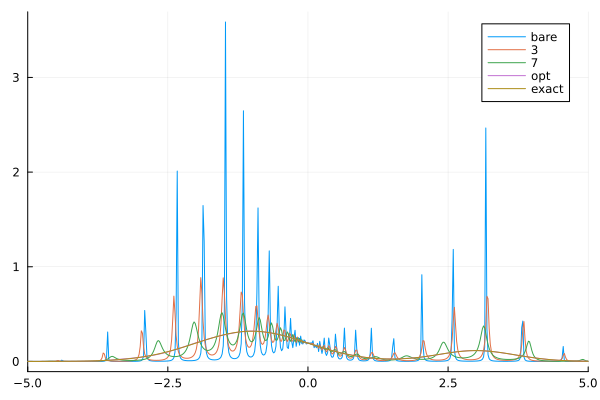

In [19]:
plot(xlim=[-5,5])
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi,label="bare")
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol1.val))/pi,label="1")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol3.val))/pi,label="3")
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol5.val))/pi,label="5")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol7.val))/pi,label="7")
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol9.val))/pi,label="9")
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol11.val))/pi,label="11")
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol13.val))/pi,label="13")
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi,label="opt")
plot!(omegas, rho.(omegas),label="exact")

In [31]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [3.0,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi,label="0 moment",lw=3)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol3.val))/pi,label="3 moments",lw=3)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol7.val))/pi,label="7 moments",lw=3)
#plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak_moment.svg")

"/home/kosuke/work/Nevanlinna.jl/notebooks/two_peak_moment.svg"

In [34]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol7.val))/pi,label="7 moments",lw=3)
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi,label="opt")
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak_moment_opt.svg")

"/home/kosuke/work/Nevanlinna.jl/notebooks/two_peak_moment_opt.svg"